In [1]:

import seaborn as sns
%matplotlib inline
sns.set_context('notebook')
sns.set_style('white')
import scipy
import numpy as np
from pandas import Series
import matplotlib.pyplot as plt
from scipy.stats import norm,gamma, lognorm, rayleigh,reciprocal,wald,gilbrat
import matplotlib.pyplot as plt
from pandas import DataFrame
from scipy import stats
import sklearn
from sklearn.preprocessing import StandardScaler
import pandas as pd
#import keras as ks

   ADCF  Current(A)
0  1011   49.770992
1   996   47.660819
2   953   45.658263
3   904   41.902314
4   870   41.687980


Slope: 0.04771566045086681 intercept: 0.11765298739218188 r: 0.9997911033106576


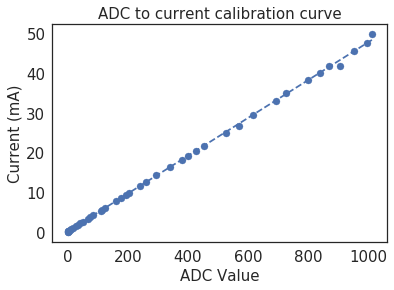

In [20]:
caldf = pd.read_csv("currentcal.csv")
# Calibration curve for the current sense circuit to get the relationship between output of the 
# shunt resistor -> non inverting op amp -> butterworth filter circuit and actual current across the shunt
print(caldf.head()) 
slope, intercept, r_value, p_value, std_err = stats.linregress(caldf['ADCF'],caldf["Current(A)"])
line = slope*caldf['ADCF']+intercept
plt.scatter(caldf["ADCF"],caldf["Current(A)"])
plt.plot(caldf["ADCF"],line,'--')
plt.xlabel("ADC Value",size=15)
plt.ylabel("Current (mA)",size=15)
plt.title("ADC to current calibration curve",size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
print("Slope: {} intercept: {} r: {}".format(slope,intercept,r_value))

In [28]:
mydf = pd.read_csv("newdata1.csv")
#Note: I made the headings incorrectly. power should be total energy
# It was a PITA to go through and change them all so I left it as power
mydf['datetime'] = pd.to_datetime(mydf['datetime'],format='%m/%d/%Y %H:%M')
mydf.index = pd.to_datetime(mydf['datetime'])
print("Unique days of data: {}".format(len(pd.to_datetime(mydf['datetime']).dt.date.unique().tolist())))

Unique days of data: 21


In [38]:
# How many datapoints do I have
np.shape(mydf)

(8641, 14)

In [34]:
%matplotlib inline
sns.set_context('notebook')
sns.set_style('white')

In [42]:
plt.close()
def axformat(axlist):
    for axis in axlist:
        axis.xaxis.set_minor_locator(mdates.HourLocator())
        axis.get_xaxis().set_tick_params(which='minor', size=5)
        axis.get_xaxis().set_tick_params(which='major', size=10)

import matplotlib.dates as mdates
#max_sec = mydf['datetime'].dt.total_seconds()

f, (ax1,ax2,ax3,ax4,ax5 ) = plt.subplots(5,figsize=(30,20))
f.subplots_adjust(hspace=.7)
mydf.plot(x='datetime',y='power',style=".",ax=ax1)
mydf.plot(x='datetime',y='ownhumidity',style=".",ax=ax2)
mydf.plot(x='datetime',y='cloud',style=".",ax=ax3)
mydf.plot(x='datetime',y='owntemp',style=".",ax=ax4)
mydf.plot(x='datetime',y='rainfall',style=".",ax=ax5)
ax4.set_ylim([0,50])

axf = [ax1,ax2,ax3,ax4,ax5]
axformat(axf)
ax1.set_title("Energy")
ax1.set_ylabel("j")
ax2.set_title("Humidity")
ax2.set_ylabel("%")
ax3.set_title("Cloud Cover")
ax3.set_ylabel("%?")
ax4.set_title("Temperature")
ax4.set_ylabel("°C")
ax5.set_title("Rainfall")
ax5.set_ylabel("mm")

f.savefig("dataRainOnly.png")

In [40]:
# power in this case == energy due to my terrible labeling when creating this data
mydf['power'].describe()

count    8641.000000
mean       12.408308
std        18.816741
min         0.842794
25%         4.283634
50%         6.196918
75%        11.079825
max       248.408400
Name: power, dtype: float64

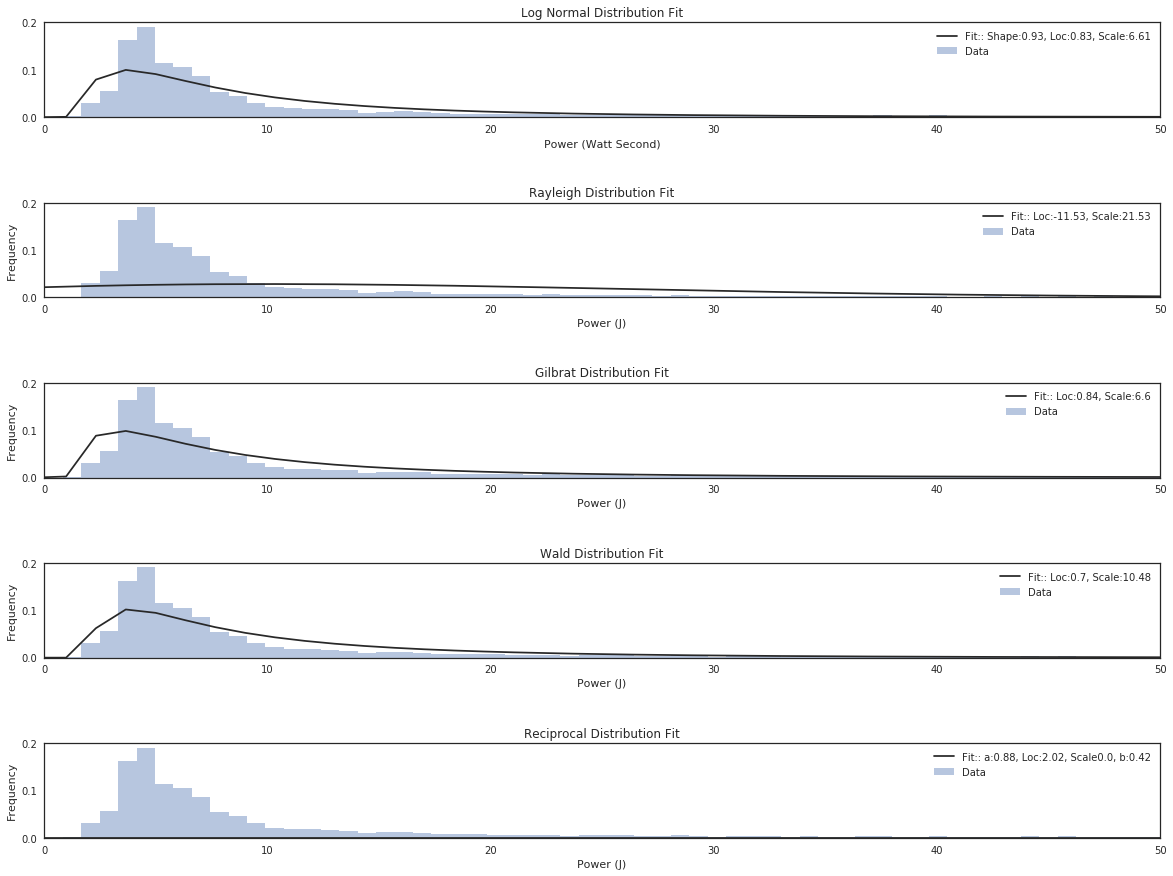

In [46]:
rayleigh.fit(mydf['power'])
fig, (ax1,ax2,ax3,ax4,ax5 )=plt.subplots(5,figsize=(20,15))
fig.subplots_adjust(hspace=0.9)
##
sns.distplot(mydf['power'], bins=300, fit=lognorm, kde=False, ax=ax1,)
(shape,loc,scale) = lognorm.fit(mydf['power'])
ax1.set_xlabel("Power (Watt Second)")
plt.ylabel("Frequency")
ax1.set_title("Log Normal Distribution Fit")
ax1.legend(["Fit:: Shape:{}, Loc:{}, Scale:{}".format(round(shape,2),round(loc,2),round(scale,2)),"Data"])
ax1.set_xlim([0,50])
##
# I would have actaully expected this to be best because of Rayleigh degredation
sns.distplot(mydf['power'], bins=300, fit=rayleigh, kde=False, ax=ax2)
loc,scale = rayleigh.fit(mydf['power'])
ax2.legend(["Fit:: Loc:{}, Scale:{}".format(round(loc,2),round(scale,2)),"Data"])
ax2.set_title("Rayleigh Distribution Fit")
ax2.set_xlabel("Power (J)")
ax2.set_ylabel("Frequency")
ax2.set_xlim([0,50])
##
sns.distplot(mydf['power'], bins=300, fit=gilbrat, kde=False, ax=ax3)
loc,scale = gilbrat.fit(mydf['power'])
ax3.legend(["Fit:: Loc:{}, Scale:{}".format(round(loc,2),round(scale,2)),"Data"])
ax3.set_title("Gilbrat Distribution Fit")
ax3.set_xlabel("Power (J)")
ax3.set_ylabel("Frequency")
ax3.set_xlim([0,50])
##
sns.distplot(mydf['power'], bins=300, fit=wald, kde=False, ax=ax4)
loc,scale = wald.fit(mydf['power'])
ax4.legend(["Fit:: Loc:{}, Scale:{}".format(round(loc,2),round(scale,2)),"Data"])
ax4.set_title("Wald Distribution Fit")
ax4.set_xlabel("Power (J)")
ax4.set_ylabel("Frequency")
ax4.set_xlim([0,50])
##
sns.distplot(mydf['power'], bins=300, fit=reciprocal, kde=False, ax=ax5)
a,loc,scale,b = reciprocal.fit(mydf['power'])
ax5.legend(["Fit:: a:{}, Loc:{}, Scale{}, b:{}".format(round(a,2),round(loc,2),round(scale,2),round(b,2)), "Data"])
ax5.set_title("Reciprocal Distribution Fit")
ax5.set_xlabel("Power (J)")
ax5.set_ylabel("Frequency")
ax5.set_xlim([0,50])
##


##
plt.show()
fig.savefig("FitsTestalldata.png")


Fit:: Shape:0.93, Loc:0.83, Scale:6.61


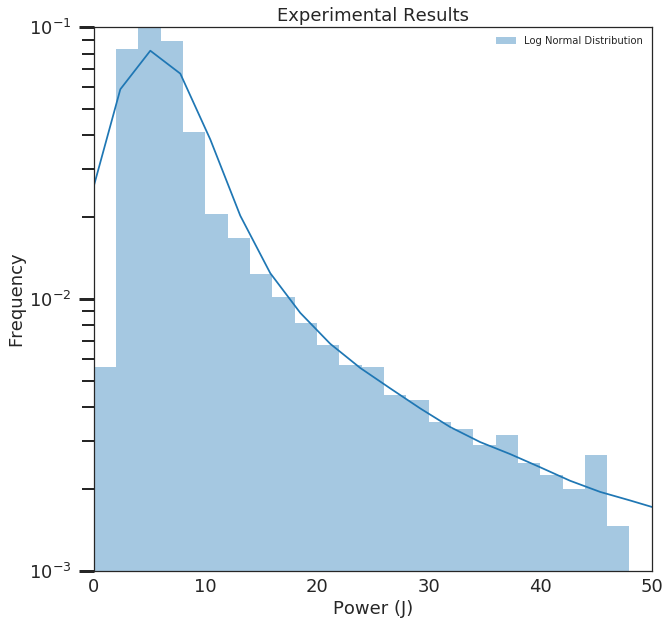

In [10]:
fig2, axis1 = plt.subplots(1,figsize=(10,10))
sns.distplot(mydf['power'], bins=range(0,50,2), kde=True,ax = axis1,norm_hist=False)
(shape,loc,scale) = lognorm.fit(mydf['power'])
axis1.set_yscale('log')
axis1.set_ylim([0.001,0.1])
axis1.set_xlabel("Power (J)",size=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel("Frequency",size=18)
axis1.set_title("Experimental Results",fontsize=18)
# axis1.set_yscale('log')
#axis1.legend(["Log Normal Distribution","Experimental Data"],fontsize=18)
axis1.get_yaxis().set_tick_params(which='minor', size=12,width=2)
axis1.get_yaxis().set_tick_params(which='major', size=15,width=3)
print("Fit:: Shape:{}, Loc:{}, Scale:{}".format(round(shape,2),round(loc,2),round(scale,2)))
axis1.set_xlim([0,50])
axis1.legend(["Log Normal Distribution","Exoerimental Data"])
plt.savefig("countloglogdist.png")

In [11]:
sns.set()
sns.set_style("white")
cols=['power','Glonass','Beidu','GPS','auxdata','almdata','ephdata','owntemp','ownhumidity','cloud','rainfall']    
#Hidden because it takes up WAYYY too much space
#snsplot = sns.pairplot(mydf[cols],size=20)
# plt.show()
# snsplot.savefig('pairwiseplot.png')

In [ ]:
data = pd.concat([mydf['owntemp'],mydf['ownhumidity']],axis=1)
data.plot.scatter(x='owntemp',y='ownhumidity')
plt.title("Correlation between Temperature and Humidity",size=14)
plt.ylabel("Humidity (%)",size=14)
plt.xlabel("Temperature (°C)",size=14)
plt.xticks(size=14)
plt.yticks(size=14)
slope1, intercept1, r_value1, p_value, std_err = stats.linregress(mydf['owntemp'],mydf["ownhumidity"])
line1 = slope1*mydf["owntemp"]+intercept1

plt.plot(mydf["owntemp"],line1,'--',c='r')

print("Slope {} intercept{} r {}".format(slope1,intercept1,r_value1))

Text(0.5,0,'Cloud Cover (%)')

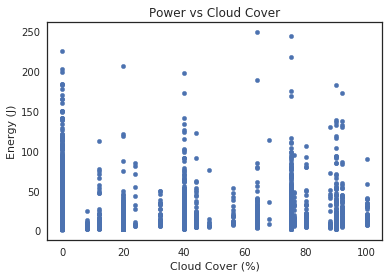

In [14]:
data = pd.concat([mydf['power'],mydf['cloud']],axis=1)
data.plot.scatter(x='cloud',y='power')
plt.title("Power vs Cloud Cover")
plt.ylabel("Energy (J)")
plt.xlabel("Cloud Cover (%)")

In [43]:
import probscale
from matplotlib import pyplot
from matplotlib import ticker

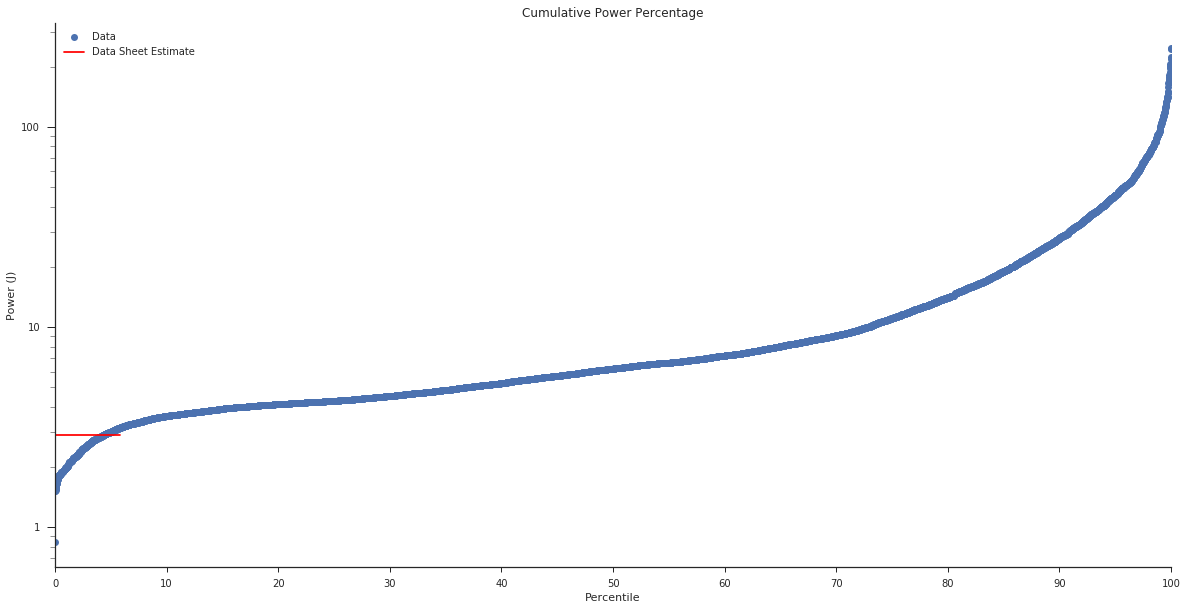

In [47]:
fig, ax = pyplot.subplots(figsize=(20, 10))
fig = probscale.probplot(mydf['power'], ax=ax, plottype='pp', bestfit=False,
                         problabel='Percentile', datalabel='Power (J)',
                         scatter_kws=dict(label='Data'),
                         line_kws=dict(label='Best-fit line'),datascale='log')
ax.get_yaxis().set_major_formatter(ticker.LogFormatter())
ax.get_yaxis().set_tick_params(which='minor', size=5)
ax.get_yaxis().set_tick_params(which='major', size=8)
ax.get_xaxis().set_tick_params(which='major', size=5)
ax.legend(loc='upper left')
ax.plot([0, 5.8 ],[2.9,2.9],color = 'r')
# ax.plot([5.8,5.8],[0,100],color = 'r')
sns.despine()
ax.set_title("Cumulative Power Percentage")
ax.legend(["Data","Data Sheet Estimate"],loc='upper left')
plt.xticks([0,10,20,30,40,50,60,70,80,90,100])
plt.savefig("LogFitTestVals.png")

Text(0.5,1,'Cumulative Power Percentage')

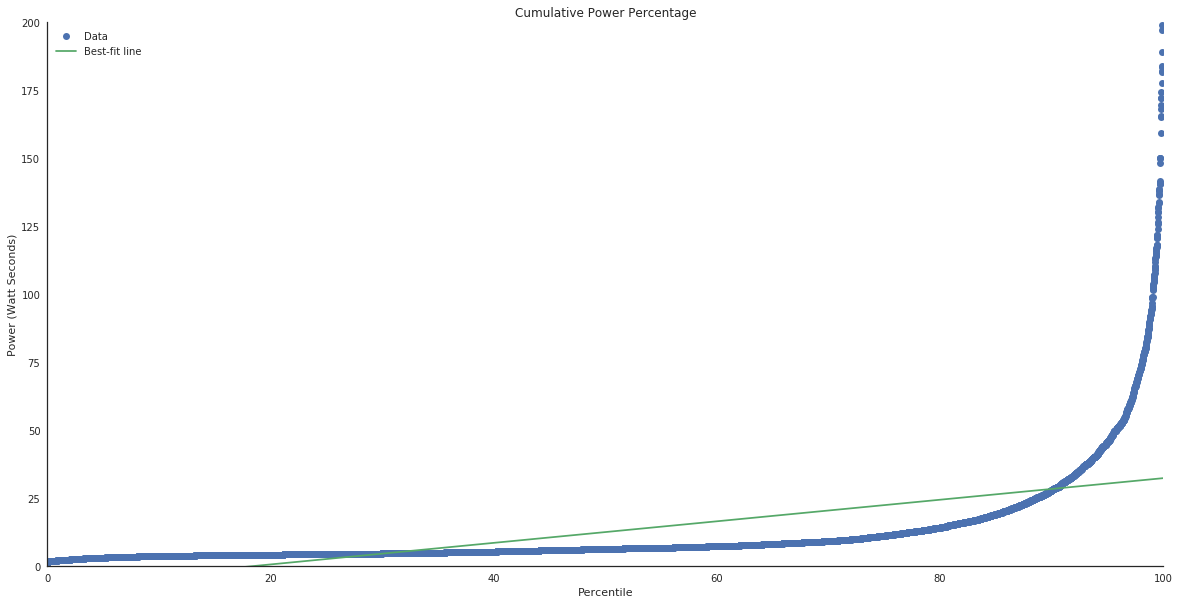

In [49]:
# I fully expected to need a log plot. Yep.

fig, ax = pyplot.subplots(figsize=(20, 10))
fig = probscale.probplot(mydf['power'], ax=ax, plottype='pp', bestfit=True,
                         problabel='Percentile', datalabel='Power (Watt Seconds)',
                         scatter_kws=dict(label='Data'),
                         line_kws=dict(label='Best-fit line'))
ax.legend(loc='upper left')
sns.despine()
ax.set_xlim([0,100])
ax.set_ylim([0,200])
ax.set_title("Cumulative Power Percentage")



In [50]:
import warnings
warnings.filterwarnings('ignore')
cols = ['Glonass','Beidu','GPS',"auxdata","almdata","ephdata","owntemp","ownhumidity","cloud","rainfall"]
result = ['power']
newcols = ["auxdata","almdata","ephdata","owntemp","ownhumidity","cloud","rainfall","actualpower"]
combvals = mydf[newcols]
combvals["actualpower"] = np.multiply(combvals["actualpower"],1000)
# combvals['avpower'] = mydf[""]
# print(np.shape(combvals))
# print(np.shape(mydf))
combvals["GPS"] = np.where((mydf["GPS"] == 1) & (mydf["Beidu"] == 0) & (mydf["Glonass"] == 0), 1, 0)
combvals["Beidu"] = np.where((mydf["GPS"] == 0) & (mydf["Beidu"] == 1) & (mydf["Glonass"] == 0), 1, 0)
combvals["Glonass"] = np.where((mydf["GPS"] == 0) & (mydf["Beidu"] == 0) & (mydf["Glonass"] == 1), 1, 0)
combvals["GPS,Beidu"] = np.where((mydf["GPS"] == 1) & (mydf["Beidu"] == 1) & (mydf["Glonass"] == 0), 1, 0)
combvals["GPS,Glonass"] = np.where((mydf["GPS"] == 1) & (mydf["Beidu"] == 0) & (mydf["Glonass"] == 1), 1, 0)
combvals["Glonass,Beidu"] = np.where((mydf["GPS"] == 0) & (mydf["Beidu"] == 1) & (mydf["Glonass"] == 1), 1, 0)
combvals["FullEphemeris"] = np.where((mydf["auxdata"] == 1) & (mydf["almdata"] == 1) & (mydf["ephdata"] == 1), 1, 0)
combvals["NoEphemeris"] = np.where((mydf["auxdata"] == 0) & (mydf["almdata"] == 0) & (mydf["ephdata"] == 0), 1, 0)
combvals["Constallations"] = combvals["GPS"] + combvals["Beidu"] + combvals["Glonass"]
combvals["Energy"] = mydf["power"]

Index(['auxdata', 'almdata', 'owntemp', 'ownhumidity', 'cloud', 'rainfall',
       'GPS', 'Beidu', 'Glonass', 'GPS,Beidu', 'GPS,Glonass', 'Glonass,Beidu',
       'FullEphemeris', 'Constallations', 'Energy'],
      dtype='object')


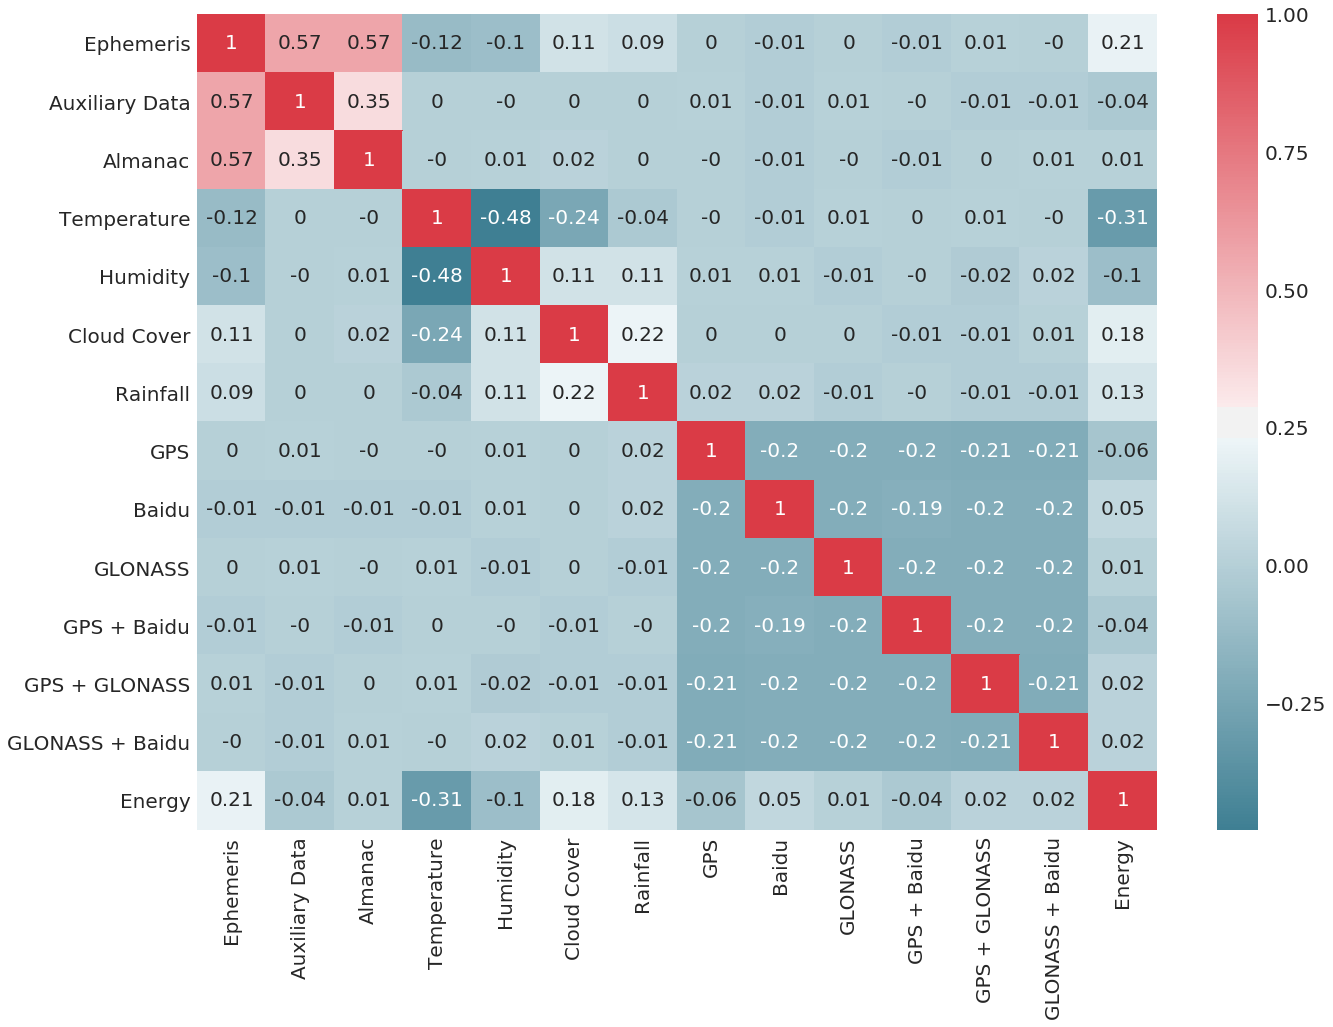

In [52]:

combvals2 = combvals
combvals2 = combvals2.drop(columns="actualpower",axis=1)
combvals2 = combvals2.drop(columns=["ephdata"],axis=1)
combvals2 = combvals2.drop(columns="NoEphemeris",axis=1)
print(combvals2.columns)
combvals2.columns = ["Auxiliary Data","Almanac","Temperature","Humidity","Cloud Cover", "Rainfall","GPS","Baidu",
                     "GLONASS","GPS + Baidu","GPS + GLONASS","GLONASS + Baidu","Ephemeris","Constellations","Energy"]
combvals2 = combvals2.drop(columns="Constellations",axis=1)
# reorder
combvals2 = combvals2[["Ephemeris","Auxiliary Data","Almanac","Temperature","Humidity","Cloud Cover", "Rainfall","GPS","Baidu",
                     "GLONASS","GPS + Baidu","GPS + GLONASS","GLONASS + Baidu","Energy"]]
corr = combvals2.corr('spearman')    
cmap = sns.diverging_palette(220, 10, as_cmap=True)
fig, ax = plt.subplots(figsize=(21.5,15))
sns.set(font_scale=2)
sns.set_style("white")
fig = sns.heatmap(np.round(corr,2),annot=True,cmap=cmap,annot_kws={"size": 20})
plt.yticks(size=20)
plt.savefig("NewHeatMap.png")

Text(0.5,1,'Invividual Components')

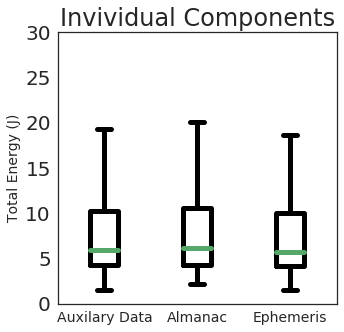

In [53]:
def returnarray(datakey):
    return np.array(combvals["Energy"])[combvals[datakey] ==1].tolist()
combdatalables = ["auxdata","almdata","ephdata"]
combdata = [returnarray("auxdata"),returnarray("almdata"),returnarray("ephdata")]
fig, ax = plt.subplots(1,figsize=(5,5))
bp=plt.boxplot(combdata)
plt.ylim((0, 30))
plt.setp(bp['boxes'], linewidth=5)
plt.setp(bp['medians'], linewidth=5)
plt.setp(bp['caps'], linewidth=5)
plt.setp(bp['fliers'], linewidth=5)
plt.setp(bp['whiskers'], linewidth=5)
plt.xticks(range(1,4),["Auxilary Data","Almanac","Ephemeris"],size=14)
# plt.title("Satelite Data Effect")
plt.ylabel("Total Energy (J)",size=14)
ax.set_title("Invividual Components")

Text(0,0.5,'Total Energy (J)')

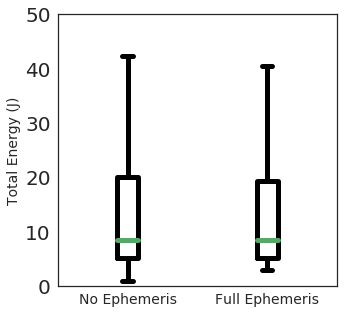

In [37]:
def returnephtype(truefalse):
    if truefalse == 1:
        return np.array(combvals["Energy"])[combvals["FullEphemeris"] ==1].tolist()
    else:
        return np.array(combvals["Energy"])[combvals["NoEphemeris"] ==1].tolist()
fig, ax = plt.subplots(1,figsize=(5,5))
bp=plt.boxplot([returnephtype(0), returnephtype(1)])
plt.ylim((0, 50))
plt.setp(bp['boxes'], linewidth=5)
plt.setp(bp['medians'], linewidth=5)
plt.setp(bp['caps'], linewidth=5)
plt.setp(bp['fliers'], linewidth=5)
plt.setp(bp['whiskers'], linewidth=5)
plt.xticks(range(1,3),["No Ephemeris","Full Ephemeris"],size=14)
plt.ylabel("Total Energy (J)",size=14)

Text(0,0.5,'Total Energy')

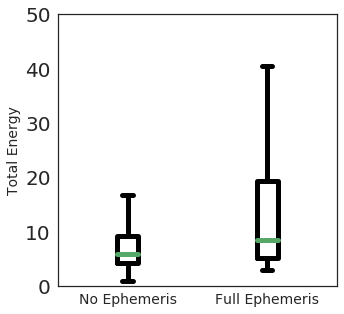

In [54]:
def returnephtype(truefalse):
    return np.array(combvals["Energy"])[combvals["FullEphemeris"] ==truefalse].tolist()
fig, ax = plt.subplots(1,figsize=(5,5))
bp=plt.boxplot([returnephtype(0),returnephtype(1)])
plt.ylim((0, 50))
plt.setp(bp['boxes'], linewidth=5)
plt.setp(bp['medians'], linewidth=5)
plt.setp(bp['caps'], linewidth=5)
plt.setp(bp['fliers'], linewidth=5)
plt.setp(bp['whiskers'], linewidth=5)
plt.xticks(range(1,3),["No Ephemeris","Full Ephemeris"],size=14)
plt.ylabel("Total Energy",size=14)

Text(0,0.5,'Energy (J)')

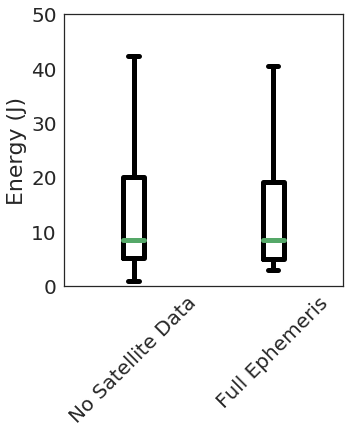

In [55]:
def returnarray(datakey):
    return np.array(combvals["Energy"])[combvals[datakey] ==1].tolist()
combdatalables = ["GPS","Beidu","GLONASS","GPS + Beidu","GPS + GLONASS","GLONASS + Beidu"]
fig, ax = plt.subplots(1,figsize=(5,5))
bp=plt.boxplot([returnarray("NoEphemeris"),returnarray("FullEphemeris")])
plt.ylim((0, 50))
plt.setp(bp['boxes'], linewidth=5)
plt.setp(bp['medians'], linewidth=5)
plt.setp(bp['caps'], linewidth=5)
plt.setp(bp['fliers'], linewidth=5)
plt.setp(bp['whiskers'], linewidth=5)
plt.xticks(range(1,3),["No Satellite Data","Full Ephemeris"], rotation=45)
plt.ylabel("Energy (J)")

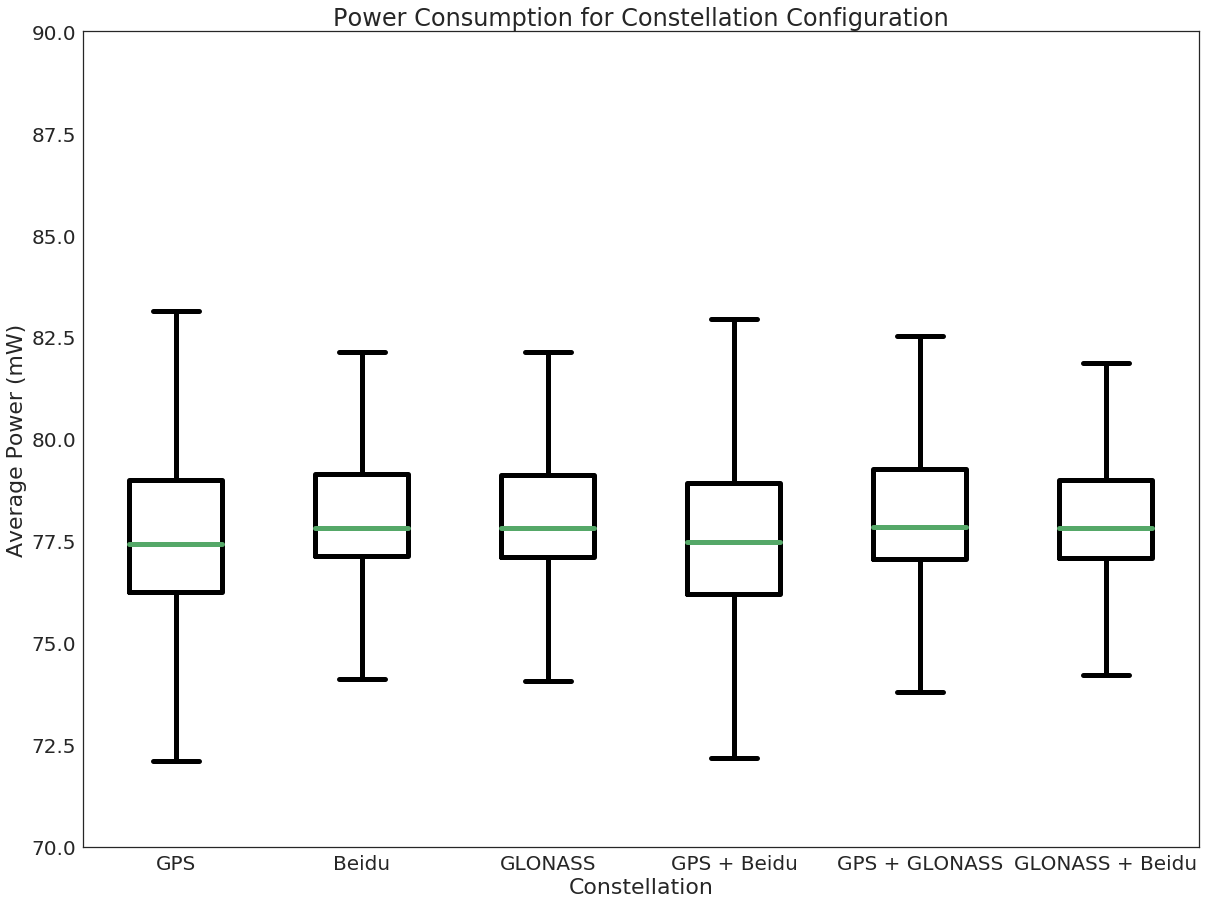

In [25]:
def returnpow(datakey):
    return np.array(combvals["actualpower"])[combvals[datakey] ==1].tolist()
plt.cla()
plt.close()
combdatalables = ["GPS","Beidu","GLONASS","GPS + Beidu","GPS + GLONASS","GLONASS + Beidu"]
combdata = [returnpow("GPS"),returnpow("Beidu"),returnpow("Glonass"),returnpow("GPS,Beidu"),returnpow("GPS,Glonass"),returnpow("Glonass,Beidu")]
fig, ax = plt.subplots(1,figsize=(20,15))
bp=plt.boxplot(combdata)
plt.setp(bp['boxes'], linewidth=5)
plt.setp(bp['medians'], linewidth=5)
plt.setp(bp['caps'], linewidth=5)
plt.setp(bp['fliers'], linewidth=5)
plt.setp(bp['whiskers'], linewidth=5)
plt.ylim((70, 90))
plt.xticks(range(1,7),combdatalables)
plt.ylabel("Average Power (mW)")
plt.xlabel("Constellation")
plt.title("Power Consumption for Constellation Configuration")
plt.savefig("Constellations.png")

In [ ]:
plt.cla()
plt.close()
combdatalables = ["GPS","Baidu","GLONASS","GPS + Baidu","GPS + GLONASS","GLONASS + Baidu"]
combdata = [returnarray("GPS"),returnarray("Beidu"),returnarray("Glonass"),returnarray("GPS,Beidu"),returnarray("GPS,Glonass"),returnarray("Glonass,Beidu")]
fig, ax = plt.subplots(1,figsize=(20,15))
bp=plt.boxplot(combdata)
plt.setp(bp['boxes'], linewidth=5)
plt.setp(bp['medians'], linewidth=5)
plt.setp(bp['caps'], linewidth=5)
plt.setp(bp['fliers'], linewidth=5)
plt.setp(bp['whiskers'], linewidth=5)
plt.ylim((0, 30))
plt.xticks(range(1,7),combdatalables)
plt.ylabel("Energy (J)")
plt.xlabel("Constellation")
plt.title("Energy Consumption for Constellation Configuration")
plt.savefig("constellationsenergy.png")


In [58]:
x = mydf[cols]
y = (mydf[result])
y = y.as_matrix().ravel()
scaler = StandardScaler()
x_scale = StandardScaler().fit_transform(x.values)

In [ ]:
from sklearn.model_selection import train_test_split
from tpot import TPOTRegressor
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=32)
# Note: I ran this with 60 generations and population size of 100, then went to sleep
# WHen I reran this before uploading, I only did 30.
tpot = TPOTRegressor(generations=5,population_size=5,verbosity=2,n_jobs=5,cv=3)
tpot.fit(X_train,y_train)
tpot.export('Bestpipeline1.py')
yhatbest = tpot.predict(X_test)


2852
1415
Empty DataFrame
Columns: []
Index: []


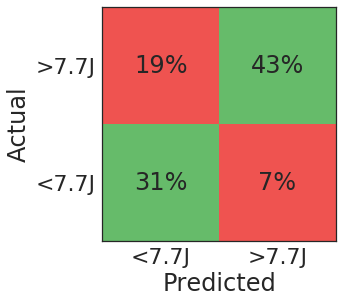

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
yhat = tpot.predict(X_test)
LIMITVAL = np.round(np.median(yhatbest),1)
print(len(y_test))
a = np.array(yhat)
b = np.array(y_test)[a < LIMITVAL].tolist()
print(len(b))
b = np.array(y_test)[a < LIMITVAL].tolist()
confusedf = pd.DataFrame()
print(confusedf)
confusedf['prediction'] = pd.Series(yhat)
confusedf['actual'] = pd.Series(y_test)
confusedf['actualover'] = confusedf['actual'] < LIMITVAL
confusedf['predictionover'] = confusedf['prediction'] < LIMITVAL
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(confusedf['actualover'],confusedf['predictionover'])
#print(cfm)
cfm=np.round(cfm/len(confusedf['actualover'])*100,0)
#print(cfm)
plt.cla()
plt.close()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
conf_arr = cfm
TEXTSIZE = 24
norm_conf = []
for i in conf_arr:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure(figsize=(4.3,4.3))
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
cmap = mpl.colors.ListedColormap(['#66bb6a','#ff867c','#66bb6a','#ef5350'])
#print(cmap)
#cmap.set_over('0.25')
#cmap.set_under('0.75')

#bounds = [1, 2, 4, 7, 8]
#norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
res = ax.imshow(np.array(norm_conf), cmap=cmap, interpolation='nearest')


width, height = conf_arr.shape

#This looks dumb but cmap was acting weird when I tried to do this normally.

ax.annotate(str(int(conf_arr[1][0]))+"%", xy=(0, 0), 
                    horizontalalignment='center',
                    verticalalignment='center',size=TEXTSIZE)
ax.annotate(str(int(conf_arr[1][1]))+"%", xy=(1, 0), 
                    horizontalalignment='center',
                    verticalalignment='center',size=TEXTSIZE)
ax.annotate(str(int(conf_arr[0][0]))+"%", xy=(0, 1), 
                    horizontalalignment='center',
                    verticalalignment='center',size=TEXTSIZE)
ax.annotate(str(int(conf_arr[0][1]))+"%", xy=(1, 1), 
                    horizontalalignment='center',
                    verticalalignment='center',size=TEXTSIZE)

alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
plt.xticks(range(width), ["<{}J".format(LIMITVAL),">{}J".format(LIMITVAL)],size=TEXTSIZE-2)
plt.yticks(range(height), [">{}J".format(LIMITVAL),"<{}J".format(LIMITVAL)],size=TEXTSIZE-2)


plt.ylabel("Actual",size=24)
ax.set_xlabel("Predicted",size=24)
plt.savefig('confusion_matrix.png', format='png')

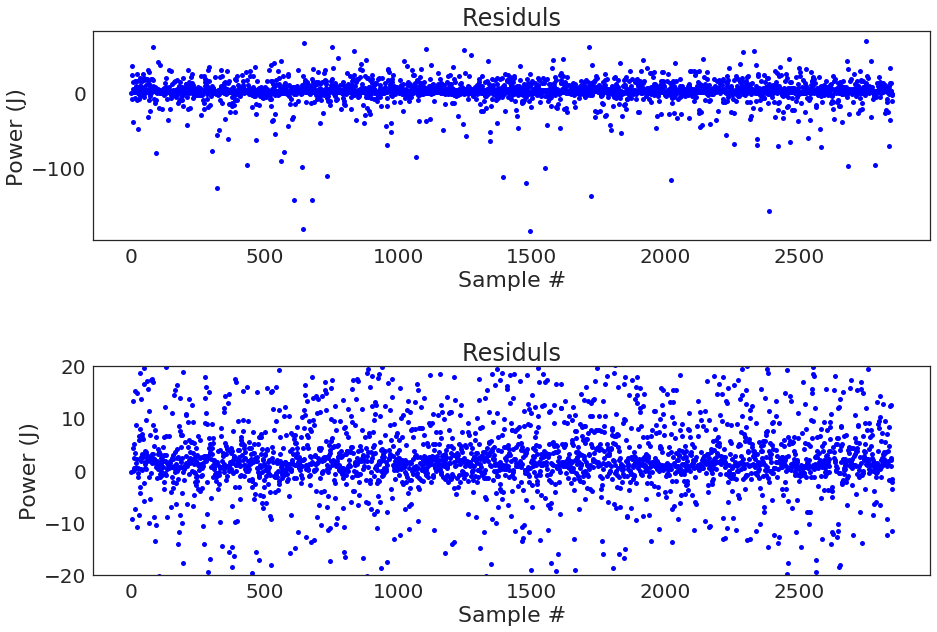

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=32)
rfor = RandomForestRegressor(n_estimators=500, min_samples_split=6)
rfor.fit(X_train, y_train)
yhat = rfor.predict(X_test)
plt.cla
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15,10))
fig.subplots_adjust(hspace=0.6)
ax1.plot(yhat-y_test,'bo',markersize=5)
ax1.set_title("Residuls")
ax1.set_xlabel("Sample #")
ax1.set_ylabel("Power (J)")
plt.savefig("PredictionAndError.png")

ax2.plot(yhat-y_test,'bo',markersize=5)
ax2.set_title("Residuls")
ax2.set_ylim([-20,20])
ax2.set_xlabel("Sample #")
ax2.set_ylabel("Power (J)")
plt.savefig("PredictionAndError.png")

[0.02185709 0.02110952 0.02815958 0.01185615 0.01224033 0.01341888
 0.35138725 0.39982415 0.10518427 0.03496278]
['Glonass', 'Beidu', 'GPS', 'auxdata', 'almdata', 'ephdata', 'owntemp', 'ownhumidity', 'cloud', 'rainfall']


(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
 <a list of 10 Text yticklabel objects>)

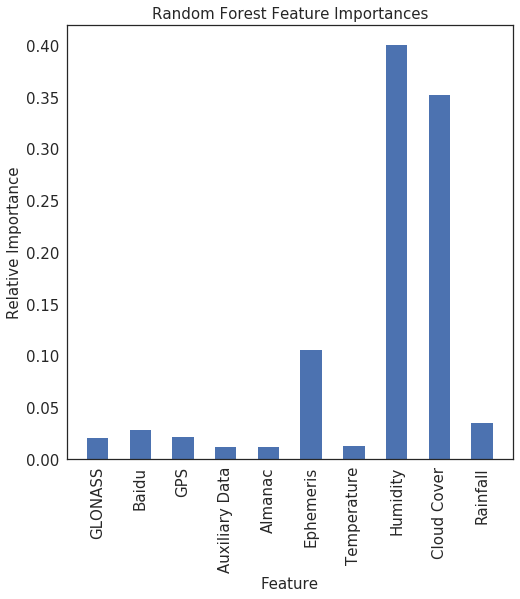

In [83]:
fimp = rfor.feature_importances_
fig, ax = plt.subplots(1,figsize=(8,8))
bplot = plt.bar(cols,fimp,width=0.5)
print(fimp)
print(cols)
plt.xticks(range(0,10),["GLONASS","Baidu","GPS","Auxiliary Data","Almanac","Ephemeris","Temperature","Humidity","Cloud Cover","Rainfall"],rotation=90,size=15)
plt.title("Random Forest Feature Importances",size=15)
ax.set_xlabel("Feature",size=15)
ax.set_ylabel("Relative Importance",size=15)
plt.yticks(size=15)

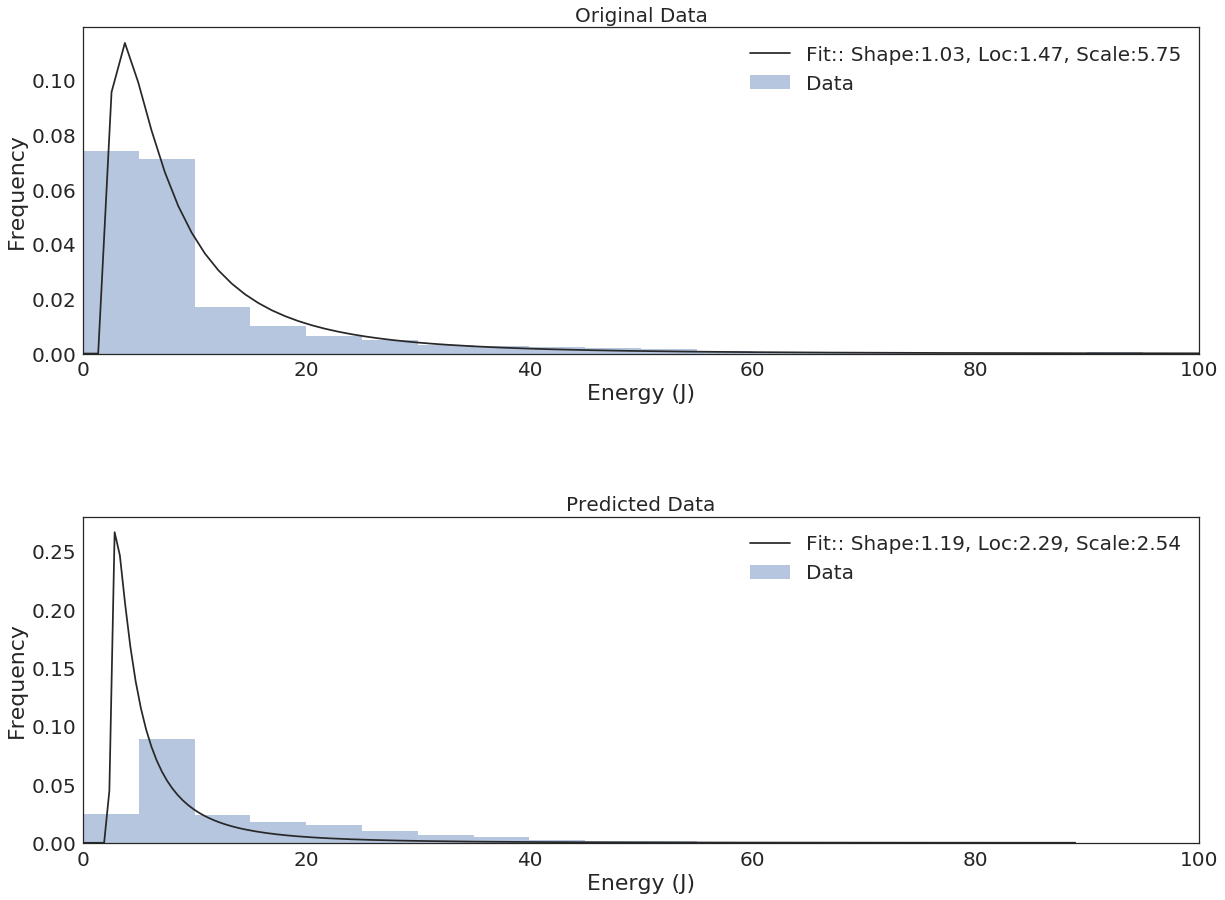

In [86]:
def greaterthan(array, value=10):
    return [i for i in array if i >= value]
TEXTSIZE=20
fig, (ax1,ax2) = plt.subplots(2,figsize=(20,15))
fig.subplots_adjust(hspace=0.5)
##w
sns.distplot(y_test, bins=range(0,100,5), fit=lognorm, kde=False, ax=ax1,)
plt.legend=(["test"])
(shape,loc,scale) = lognorm.fit(y_test)
ax1.set_xlabel("Energy (J)")
ax1.set_ylabel("Frequency")
ax1.set_title("Original Data",fontsize=TEXTSIZE)
ax1.legend(["Fit:: Shape:{}, Loc:{}, Scale:{}".format(round(shape,2),round(loc,2),round(scale,2)),"Data"],fontsize=TEXTSIZE)
ax1.set_xlim([0,100])

sns.distplot(yhat, bins=range(0,100,5), fit=lognorm, kde=False, ax=ax2,)
plt.legend=(["test"])
(shape,loc,scale) = lognorm.fit(yhat)
ax2.set_xlabel("Energy (J)")
ax2.set_ylabel("Frequency")
ax2.set_title("Predicted Data",fontsize=TEXTSIZE)
ax2.legend(["Fit:: Shape:{}, Loc:{}, Scale:{}".format(round(shape,2),round(loc,2),round(scale,2)),"Data"],fontsize=TEXTSIZE)
ax2.set_xlim([0,100])
plt.savefig("FixedDistFig.png")

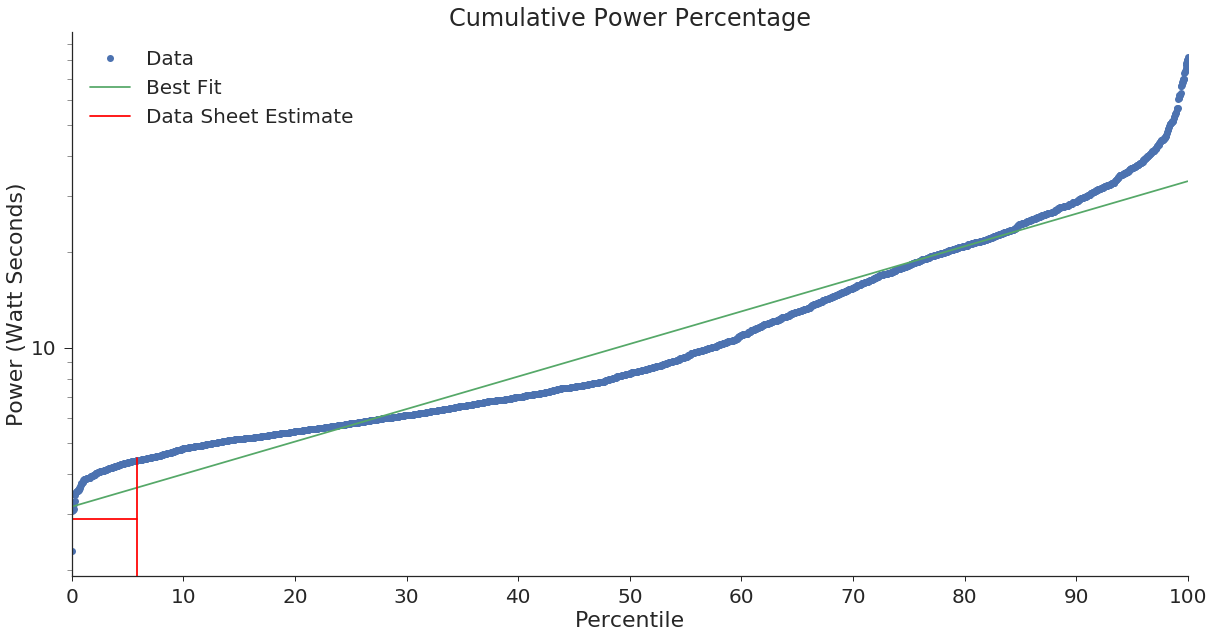

In [93]:
fig, ax = pyplot.subplots(figsize=(20, 10))
fig = probscale.probplot(yhat, ax=ax, plottype='pp', bestfit=True,
                         problabel='Percentile', datalabel='Power (Watt Seconds)',
                         scatter_kws=dict(label='Data'),
                         line_kws=dict(label='Best-fit line'),datascale='log')
ax.get_yaxis().set_major_formatter(ticker.LogFormatter())
ax.get_yaxis().set_tick_params(which='minor', size=5)
ax.get_yaxis().set_tick_params(which='major', size=8)
ax.get_xaxis().set_tick_params(which='major', size=5)
ax.legend(loc='upper left')
ax.plot([0, 5.8 ],[2.9,2.9],color = 'r')
ax.plot([5.8,5.8],[0,4.5],color = 'r')
sns.despine()
ax.set_title("Cumulative Power Percentage")
ax.legend(["Data","Best Fit","Data Sheet Estimate"],loc='upper left')
plt.xticks([0,10,20,30,40,50,60,70,80,90,100])
plt.savefig("LogFit.png")

In [94]:
import numpy as np
confusedf = pd.DataFrame()
confusedf['prediction'] = pd.Series(yhat)
confusedf['actual'] = pd.Series(y_test)
LIMITVAL = np.round(np.median(confusedf['actual']),1)
print(len(y_test))
a = np.array(yhat)
b = np.array(y_test)[a < LIMITVAL].tolist()
print(len(b))
b = np.array(y_test)[a < LIMITVAL].tolist()


confusedf['actualover'] = confusedf['actual'] < LIMITVAL
confusedf['predictionover'] = confusedf['prediction'] < LIMITVAL
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(confusedf['actualover'],confusedf['predictionover'])
print(cfm)
cfm=np.round(cfm/len(confusedf['actualover'])*100,0)
print(cfm)

2852
915
[[1243  181]
 [ 694  734]]
[[44.  6.]
 [24. 26.]]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.cla()
plt.close()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
conf_arr = cfm
TEXTSIZE = 24
norm_conf = []
for i in conf_arr:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)

fig = plt.figure(figsize=(4.3,4.3))
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
cmap = mpl.colors.ListedColormap(['#66bb6a','#ff867c','#66bb6a','#ef5350'])
print(cmap)
#cmap.set_over('0.25')
#cmap.set_under('0.75')

#bounds = [1, 2, 4, 7, 8]
#norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
res = ax.imshow(np.array(norm_conf), cmap=cmap, interpolation='nearest')


width, height = conf_arr.shape



ax.annotate(str(int(conf_arr[1][0]))+"%", xy=(0, 0), 
                    horizontalalignment='center',
                    verticalalignment='center',size=TEXTSIZE)
ax.annotate(str(int(conf_arr[1][1]))+"%", xy=(1, 0), 
                    horizontalalignment='center',
                    verticalalignment='center',size=TEXTSIZE)
ax.annotate(str(int(conf_arr[0][0]))+"%", xy=(0, 1), 
                    horizontalalignment='center',
                    verticalalignment='center',size=TEXTSIZE)
ax.annotate(str(int(conf_arr[0][1]))+"%", xy=(1, 1), 
                    horizontalalignment='center',
                    verticalalignment='center',size=TEXTSIZE)

alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
plt.xticks(range(width), ["<{}J".format(LIMITVAL),">{}J".format(LIMITVAL)],size=TEXTSIZE-2)
plt.yticks(range(height), [">{}J".format(LIMITVAL),"<{}J".format(LIMITVAL)],size=TEXTSIZE-2)
plt.title("Model Accuracy",size=TEXTSIZE)

plt.ylabel("Actual",size=24)
ax.set_xlabel("Predicted",size=24)
plt.savefig('confusion_matrix.png', format='png')



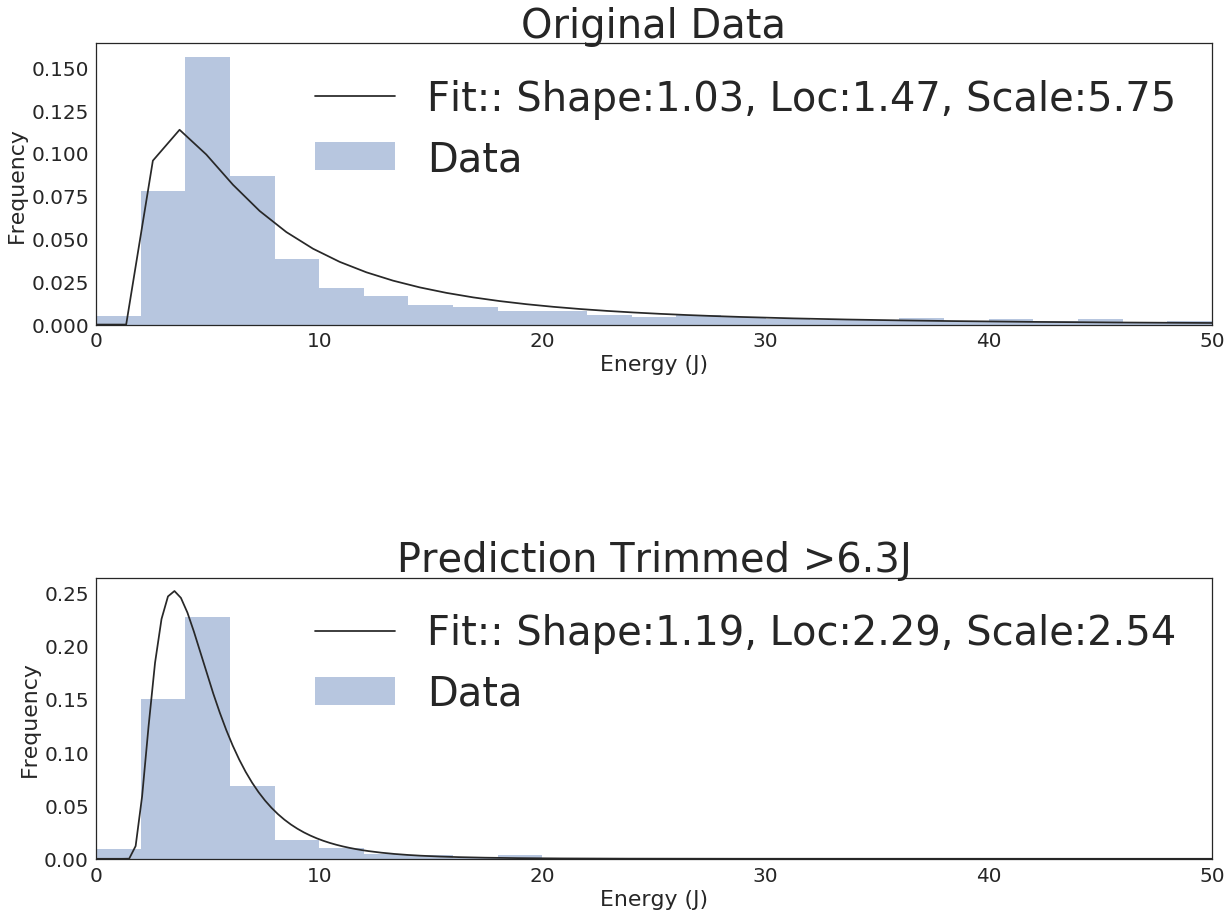

In [101]:
def greaterthan(array, value=10):
    return [i for i in array if i >= value]

fig, (ax1,ax2) = plt.subplots(2,figsize=(20,15))
fig.subplots_adjust(hspace=0.9)
##w
sns.distplot(y_test, bins=range(0,100,2), fit=lognorm, kde=False, ax=ax1,)
plt.legend=(["test"])
(shape,loc,scale) = lognorm.fit(y_test)
ax1.set_xlabel("Energy (J)")
ax1.set_ylabel("Frequency")
ax1.set_title("Original Data",fontsize=TEXTSIZE)
ax1.legend(["Fit:: Shape:{}, Loc:{}, Scale:{}".format(round(shape,2),round(loc,2),round(scale,2)),"Data"],fontsize=TEXTSIZE)
ax1.set_xlim([0,50])

sns.distplot(b, bins=range(0,100,2), fit=lognorm, kde=False, ax=ax2,)
plt.legend=(["test"])
(shape,loc,scale) = lognorm.fit(yhat)
ax2.set_xlabel("Energy (J)")
plt.ylabel("Frequency")
ax2.set_title("Prediction Trimmed >{}J".format(LIMITVAL),fontsize=TEXTSIZE)
ax2.legend(["Fit:: Shape:{}, Loc:{}, Scale:{}".format(round(shape,2),round(loc,2),round(scale,2)),"Data"],fontsize=TEXTSIZE)
ax2.set_xlim([0,50])
plt.savefig("ajustedVals.png")

80.15734265734265


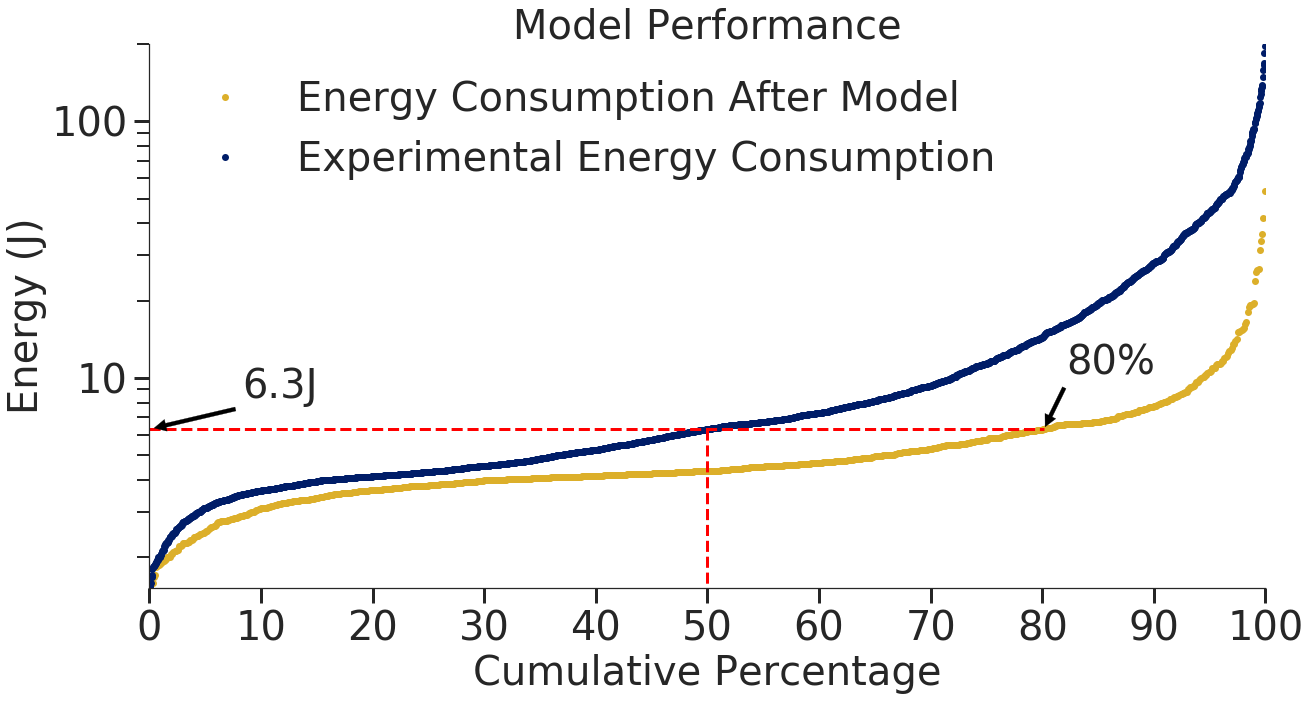

In [102]:
import matplotlib.pyplot as plt
import probscale
from matplotlib import ticker
TEXTSIZE=40

#Blue = #001d68
#Yellow = #dcaf2a
fig, ax = plt.subplots(figsize=(20, 10))
fig = probscale.probplot(b, ax=ax, plottype='pp', bestfit=False,
                         problabel='Percentile', datalabel='Energy (J)',
                         scatter_kws=dict(label='Data'),
                         line_kws=dict(label='Best-fit line'),datascale='log',size=TEXTSIZE,color='#dcaf2a')
ax.get_yaxis().set_major_formatter(ticker.LogFormatter())
ax.get_yaxis().set_tick_params(which='minor', size=12,width=2)
ax.get_yaxis().set_tick_params(which='major', size=15,width=3)
ax.get_xaxis().set_tick_params(which='major', size=15,width=3)
ax.legend(loc='upper left')
ax.plot()
sns.despine()
ax.legend(["Data","{}J".format(LIMITVAL)],loc='upper left',fontsize=TEXTSIZE)
ax.set_ylim([0,200])
plt.xticks([0,10,20,30,40,50,60,70,80,90,100],size=TEXTSIZE)
plt.yticks(size=TEXTSIZE)
ax.set_xlabel("Cumulative Percentage",size=TEXTSIZE)
ax.set_ylabel("Energy (J)",size=TEXTSIZE)
probscale.probplot(y_test, ax=ax, plottype='pp', bestfit=False,
                         problabel='Percentile', datalabel='Energy (J)',
                         scatter_kws=dict(label='Data'),
                         line_kws=dict(label='Best-fit line'),datascale='log',size=TEXTSIZE,color = '#001d68')
ax.get_yaxis().set_major_formatter(ticker.LogFormatter())
ax.get_yaxis().set_tick_params(which='minor', size=12,width=2)
ax.get_yaxis().set_tick_params(which='major', size=15,width=3)
ax.get_xaxis().set_tick_params(which='major', size=15,width=3)
ax.legend(loc='upper left')
plt.xticks([0,10,20,30,40,50,60,70,80,90,100],size=TEXTSIZE)

def find_nearest(array, value):
    ''' Find nearest value is an array '''
    idx = np.abs(array-value).argmin()
    return idx

x0data = ax.lines[0].get_xdata()
x1data = ax.lines[1].get_xdata()
y0data = ax.lines[0].get_ydata()
y1data = ax.lines[1].get_ydata()

intersect = x0data[find_nearest(y0data,LIMITVAL)]
ax.plot([0, intersect],[LIMITVAL,LIMITVAL],color = 'r',ls='--',linewidth=3)
ax.plot([50,50 ],
        [np.median(y1data),0],color = 'r',ls='--',linewidth=3)
ax.plot()
sns.despine()
# ax.set_title("Cumulative Power Percentage",fontsize=TEXTSIZE)
ax.legend(["Energy Consumption After Model","Experimental Energy Consumption"],loc='upper left',fontsize=TEXTSIZE)
ax.set_ylim([0,200])
ax.annotate("{}J".format(LIMITVAL),arrowprops=dict(facecolor='black', shrink=0.05), xy=(0,LIMITVAL),xytext=(LIMITVAL+2,LIMITVAL+2),size=TEXTSIZE)
ax.annotate("{}%".format(int(intersect)),arrowprops=dict(facecolor='black', shrink=0.05),
            xy=(intersect,LIMITVAL), xytext=(intersect+2,LIMITVAL+4),size=TEXTSIZE)

plt.yticks(size=TEXTSIZE)
ax.set_xlabel("Cumulative Percentage",size=TEXTSIZE)
ax.set_ylabel("Energy (J)",size=TEXTSIZE)
sns.set_style("white")
plt.title("Model Performance",size=TEXTSIZE)
plt.savefig("LogFitadjust.png")
print(intersect)

In [108]:
from scipy.integrate import simps
#Whats the energy density change (area under curve)
int1 = simps(y0data,x0data)
int2 = simps(y1data,x1data)
print("Energy density change {}%".format(round(((int2-int1)/int2)*100,0)))


Energy density change 57.0%


In [109]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print(sqrt(mean_squared_error(y_test,y_pred=yhat)))

16.44483100303948


1.6102161950519367  2.930367976721254


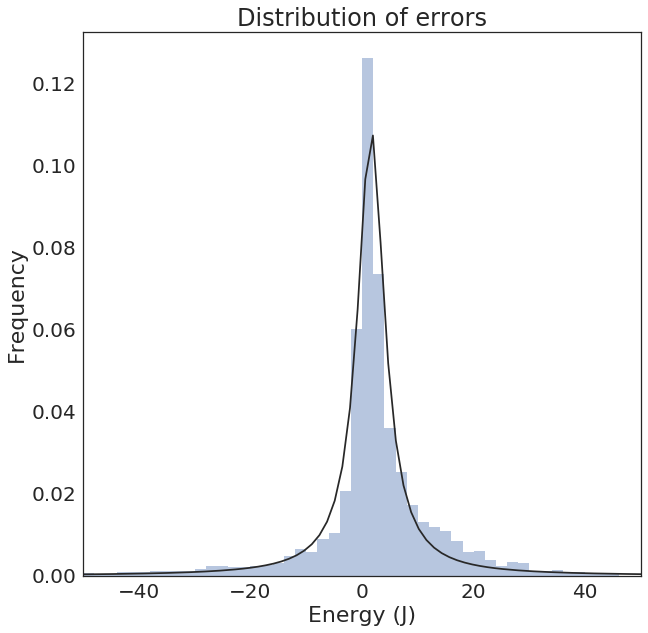

In [110]:
from scipy.stats import *
plt.cla()
plt.close()
fig, (ax1)=plt.subplots(1,figsize=(10,10))
fig.subplots_adjust(hspace=0.9)
##
sns.distplot(yhat-y_test, bins=range(-50,50,2), kde=False, ax=ax1,fit=cauchy)
plt.legend=(["test"])
(loc,scale) = cauchy.fit(yhat-y_test)
print("{}  {}".format(loc,scale))
ax1.set_xlabel("Energy (J)")
plt.ylabel("Frequency")
ax1.set_title("Distribution of errors")
ax1.set_xlim([-50,50])
fig.savefig("errordist.png")

1.6102161950519367  2.930367976721254


(2.439861235855006e-05, 1)

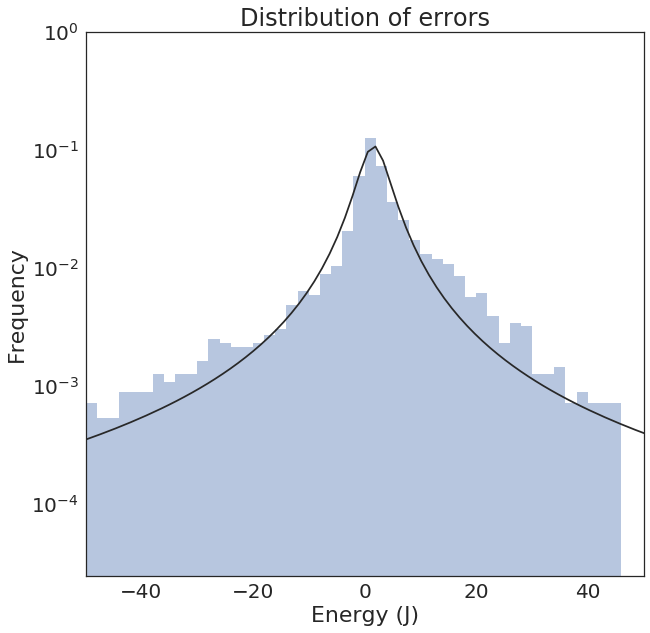

In [111]:
from scipy.stats import *
plt.cla()
plt.close()
fig, (ax1)=plt.subplots(1,figsize=(10,10))
fig.subplots_adjust(hspace=0.9)

sns.distplot(yhat-y_test, bins=range(-50,50,2), kde=False, ax=ax1,fit=cauchy)
ax1.set_yscale('log')
plt.legend=(["test"])
(loc,scale) = cauchy.fit(yhat-y_test)
print("{}  {}".format(loc,scale))
ax1.set_xlabel("Energy (J)")
plt.ylabel("Frequency")
ax1.set_title("Distribution of errors")
ax1.set_xlim([-50,50])
ax1.set_ylim([0,1])

[-50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


Text(0.5,0,'Energy (J)')

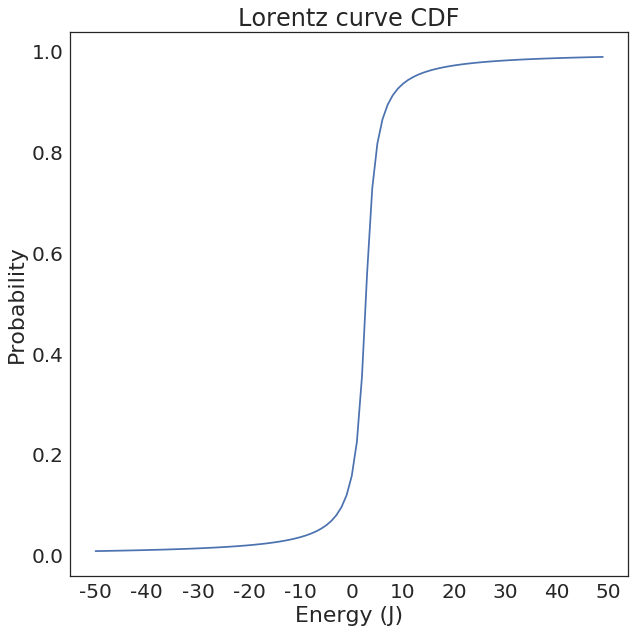

In [112]:
plt.cla()
plt.close()
fig, (ax1)=plt.subplots(1,figsize=(10,10))
fig.subplots_adjust(hspace=0.9)
xrng = list(range(-50,50,1))
print(xrng)
plt.plot(cauchy.cdf(xrng,scale=1.47,loc=2.713))
plt.xticks(list(range(0,110,10)),list(range(-50,60,10)))
plt.title("Lorentz curve CDF")
plt.ylabel("Probability")
plt.xlabel("Energy (J)")

In [ ]:
plt.cla()
plt.close()
fig, (ax1)= plt.subplots(1,2,figsize=(20,5))
fig.subplots_adjust(hspace=0.9)
fig.subplots_adjust(hspace=3.5)
##
sns.distplot(yhat-y_test, bins=range(-50,50,2), kde=False, ax=ax1[0],fit=cauchy)
plt.legend=(["test"])
(loc,scale) = cauchy.fit(yhat-y_test)
print("{}  {}".format(loc,scale))
ax1[0].set_xlabel("Energy (J)")
ax1[0].set_ylabel("Frequency")
ax1[0].set_title("Distribution of errors")
ax1[0].set_xlim([-50,50])
xrng = list(range(-50,50,1))
plt.plot(cauchy.cdf(xrng,scale=1.47,loc=2.713))
plt.xticks(list(range(0,110,20)),list(range(-50,60,20)))
plt.title("Lorentz cumulative distribution function")
plt.ylabel("Cumulative Distribution")
plt.xlabel("Energy (J)")
fig.savefig("Distributions.png")


In [ ]:
print("Mean {}".format(np.mean(yhat)))
print("Median {}".format(np.median(yhat)))

In [130]:
import lime
import lime.lime_tabular

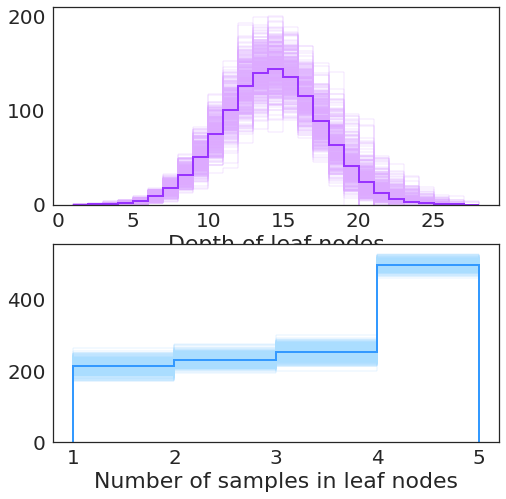

In [133]:
from sklearn.model_selection import GridSearchCV

In [134]:
# Gridsearch test to check that i've got best params of random forest
paramgrid = { 'n_estimators': range(2,40),
              'max_depth': range(2,20),
              'min_samples_split': range(10,20,102)}
                    
a = GridSearchCV(RandomForestRegressor(),paramgrid,scoring='neg_mean_squared_error',cv=5,verbose=0)

In [136]:
a.fit(X_Train,y_train)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# PCA: How many components contribute a signficant amount of variance

#y = (y_test)
#y = y.as_matrix().ravel()

pca= PCA().fit(X_train,y_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title("Principle Component Analysis")



In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import plot_model
model = Sequential([
    Dense(12, input_shape=(9,)),
    Activation('relu'),
    Dense(9),
    Activation('relu'),
    Dense(9),
    Activation('relu'),
    Dense(9),
    Activation('relu'),
    Dense(9),
    Activation('relu'),
    Dense(1),
    Activation('linear')
])

In [30]:
scaler = StandardScaler()
x_scale = StandardScaler().fit_transform(X_train)
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_scale, y_train, epochs=3000, verbose=1, validation_split=20, batch_size=2000)



Epoch 1/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 101.7391

5345/5345 [==============================] - 1s 94us/step - loss: 141.1192


Epoch 2/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 146.1925

5345/5345 [==============================] - 0s 4us/step - loss: 141.0492


Epoch 3/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 120.6841

5345/5345 [==============================] - 0s 5us/step - loss: 141.0012


Epoch 4/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 154.2398

5345/5345 [==============================] - 0s 4us/step - loss: 140.9672


Epoch 5/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 165.8208

5345/5345 [==============================] - 0s 4us/step - loss: 140.9500


Epoch 6/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 141.0634

5345/5345 [==============================] - 0s 6us/step - loss: 140.9087


Epoch 7/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 112.8315

5345/5345 [==============================] - 0s 6us/step - loss: 140.8827


Epoch 8/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 115.1604

5345/5345 [==============================] - 0s 5us/step - loss: 140.8568


Epoch 9/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 159.8199

5345/5345 [==============================] - 0s 5us/step - loss: 140.8325


Epoch 10/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 134.0495

5345/5345 [==============================] - 0s 5us/step - loss: 140.7967


Epoch 11/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 134.4150

5345/5345 [==============================] - 0s 5us/step - loss: 140.7690


Epoch 12/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 159.5720

5345/5345 [==============================] - 0s 3us/step - loss: 140.7400


Epoch 13/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 149.3223

5345/5345 [==============================] - 0s 7us/step - loss: 140.7193


Epoch 14/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 173.7916

5345/5345 [==============================] - 0s 6us/step - loss: 140.6843


Epoch 15/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 127.7370

5345/5345 [==============================] - 0s 5us/step - loss: 140.6570


Epoch 16/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 166.9077

5345/5345 [==============================] - 0s 6us/step - loss: 140.6291


Epoch 17/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 145.5369

5345/5345 [==============================] - 0s 5us/step - loss: 140.6049


Epoch 18/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 154.1188

5345/5345 [==============================] - 0s 6us/step - loss: 140.5832


Epoch 19/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 195.5442

5345/5345 [==============================] - 0s 3us/step - loss: 140.5683


Epoch 20/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 164.1519

5345/5345 [==============================] - 0s 4us/step - loss: 140.5262


Epoch 21/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 147.6783

5345/5345 [==============================] - 0s 4us/step - loss: 140.4991


Epoch 22/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 192.1729

5345/5345 [==============================] - 0s 5us/step - loss: 140.4746


Epoch 23/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 156.2277

5345/5345 [==============================] - 0s 8us/step - loss: 140.4534


Epoch 24/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 156.7361

5345/5345 [==============================] - 0s 6us/step - loss: 140.4317


Epoch 25/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 123.8935

5345/5345 [==============================] - 0s 5us/step - loss: 140.3972


Epoch 26/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 133.3845

5345/5345 [==============================] - 0s 5us/step - loss: 140.3947


Epoch 27/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 120.3024

5345/5345 [==============================] - 0s 4us/step - loss: 140.3608


Epoch 28/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 124.4898

5345/5345 [==============================] - 0s 3us/step - loss: 140.3382


Epoch 29/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 104.9982

5345/5345 [==============================] - 0s 6us/step - loss: 140.3131


Epoch 30/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 145.1523

5345/5345 [==============================] - 0s 4us/step - loss: 140.2994


Epoch 31/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 143.2952

5345/5345 [==============================] - 0s 5us/step - loss: 140.2750


Epoch 32/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 107.4040

5345/5345 [==============================] - 0s 6us/step - loss: 140.2517


Epoch 33/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 112.1832

5345/5345 [==============================] - 0s 4us/step - loss: 140.2294


Epoch 34/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 132.5909

5345/5345 [==============================] - 0s 5us/step - loss: 140.2129


Epoch 35/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 162.6536

5345/5345 [==============================] - 0s 4us/step - loss: 140.2024


Epoch 36/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 182.0416

5345/5345 [==============================] - 0s 5us/step - loss: 140.1650


Epoch 37/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 118.6774

5345/5345 [==============================] - 0s 6us/step - loss: 140.1418


Epoch 38/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 180.7902

5345/5345 [==============================] - 0s 3us/step - loss: 140.1265


Epoch 39/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 115.5287

5345/5345 [==============================] - 0s 4us/step - loss: 140.1050


Epoch 40/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 172.2358

5345/5345 [==============================] - 0s 4us/step - loss: 140.0917


Epoch 41/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 106.0005

5345/5345 [==============================] - 0s 4us/step - loss: 140.0655


Epoch 42/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 142.2182

5345/5345 [==============================] - 0s 5us/step - loss: 140.0550


Epoch 43/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 182.9547

5345/5345 [==============================] - 0s 4us/step - loss: 140.0313


Epoch 44/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 107.1595

5345/5345 [==============================] - 0s 4us/step - loss: 140.0060


Epoch 45/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 119.7572

5345/5345 [==============================] - 0s 4us/step - loss: 139.9824


Epoch 46/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 119.7722

5345/5345 [==============================] - 0s 4us/step - loss: 139.9600


Epoch 47/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 160.6086

5345/5345 [==============================] - 0s 3us/step - loss: 139.9416


Epoch 48/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 134.6924

5345/5345 [==============================] - 0s 4us/step - loss: 139.9205


Epoch 49/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 146.2245

5345/5345 [==============================] - 0s 5us/step - loss: 139.8949


Epoch 50/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 148.1000



5345/5345 [==============================] - 0s 5us/step - loss: 139.8754


Epoch 51/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 119.4297

5345/5345 [==============================] - 0s 5us/step - loss: 139.8696


Epoch 52/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 147.4516

5345/5345 [==============================] - 0s 5us/step - loss: 139.8420


Epoch 53/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 140.4647

5345/5345 [==============================] - 0s 4us/step - loss: 139.8403


Epoch 54/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 194.1135

5345/5345 [==============================] - 0s 4us/step - loss: 139.8078


Epoch 55/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 121.6979

5345/5345 [==============================] - 0s 3us/step - loss: 139.7792


Epoch 56/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 106.1444

5345/5345 [==============================] - 0s 4us/step - loss: 139.7753


Epoch 57/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 126.1080

5345/5345 [==============================] - 0s 4us/step - loss: 139.7438


Epoch 58/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 109.3242

5345/5345 [==============================] - 0s 4us/step - loss: 139.7254


Epoch 59/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 161.5043

5345/5345 [==============================] - 0s 3us/step - loss: 139.7241


Epoch 60/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 128.3901

5345/5345 [==============================] - 0s 3us/step - loss: 139.6980


Epoch 61/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 162.3426

5345/5345 [==============================] - 0s 3us/step - loss: 139.6804


Epoch 62/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 115.6040

5345/5345 [==============================] - 0s 4us/step - loss: 139.6719


Epoch 63/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 101.8417

5345/5345 [==============================] - 0s 3us/step - loss: 139.6399


Epoch 64/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 138.0308

5345/5345 [==============================] - 0s 4us/step - loss: 139.6157


Epoch 65/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 108.5453

5345/5345 [==============================] - 0s 3us/step - loss: 139.5851


Epoch 66/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 165.1894

5345/5345 [==============================] - 0s 4us/step - loss: 139.5751


Epoch 67/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 136.7517

5345/5345 [==============================] - 0s 3us/step - loss: 139.5598


Epoch 68/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 156.0039

5345/5345 [==============================] - 0s 4us/step - loss: 139.5380


Epoch 69/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 134.2431

5345/5345 [==============================] - 0s 4us/step - loss: 139.5203


Epoch 70/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 147.9615

5345/5345 [==============================] - 0s 4us/step - loss: 139.4853


Epoch 71/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 149.7663

5345/5345 [==============================] - 0s 4us/step - loss: 139.4697


Epoch 72/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 166.9408

5345/5345 [==============================] - 0s 3us/step - loss: 139.4502


Epoch 73/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 164.7973

5345/5345 [==============================] - 0s 4us/step - loss: 139.4199


Epoch 74/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 121.3109

5345/5345 [==============================] - 0s 3us/step - loss: 139.4006


Epoch 75/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 148.3216

5345/5345 [==============================] - 0s 3us/step - loss: 139.3722


Epoch 76/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 120.2266

5345/5345 [==============================] - 0s 4us/step - loss: 139.3563


Epoch 77/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 154.0258

5345/5345 [==============================] - 0s 3us/step - loss: 139.3478


Epoch 78/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 133.0960

5345/5345 [==============================] - 0s 4us/step - loss: 139.3127


Epoch 79/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 133.5633

5345/5345 [==============================] - 0s 4us/step - loss: 139.2862


Epoch 80/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 154.0182

5345/5345 [==============================] - 0s 4us/step - loss: 139.2636


Epoch 81/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 126.5800

5345/5345 [==============================] - 0s 3us/step - loss: 139.2446


Epoch 82/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 122.7778

5345/5345 [==============================] - 0s 4us/step - loss: 139.2324


Epoch 83/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 99.0618

5345/5345 [==============================] - 0s 3us/step - loss: 139.2065


Epoch 84/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 140.4735

5345/5345 [==============================] - 0s 4us/step - loss: 139.1914


Epoch 85/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 185.5910

5345/5345 [==============================] - 0s 4us/step - loss: 139.1725


Epoch 86/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 107.0637

5345/5345 [==============================] - 0s 4us/step - loss: 139.1521


Epoch 87/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 138.1581

5345/5345 [==============================] - 0s 3us/step - loss: 139.1245


Epoch 88/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 138.2736

5345/5345 [==============================] - 0s 3us/step - loss: 139.1086


Epoch 89/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 130.3478

5345/5345 [==============================] - 0s 4us/step - loss: 139.0853


Epoch 90/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 127.3612

5345/5345 [==============================] - 0s 4us/step - loss: 139.0641


Epoch 91/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 128.0059

5345/5345 [==============================] - 0s 4us/step - loss: 139.0510


Epoch 92/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 134.3102

5345/5345 [==============================] - 0s 3us/step - loss: 139.0365


Epoch 93/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 162.0866

5345/5345 [==============================] - 0s 3us/step - loss: 139.0164


Epoch 94/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 128.3516

5345/5345 [==============================] - 0s 3us/step - loss: 139.0112


Epoch 95/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 117.9394

5345/5345 [==============================] - 0s 3us/step - loss: 138.9696


Epoch 96/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 139.3974

5345/5345 [==============================] - 0s 4us/step - loss: 138.9698


Epoch 97/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 147.8607

5345/5345 [==============================] - 0s 3us/step - loss: 138.9525


Epoch 98/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 146.9433

5345/5345 [==============================] - 0s 4us/step - loss: 138.9195


Epoch 99/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 122.0335

5345/5345 [==============================] - 0s 3us/step - loss: 138.9234


Epoch 100/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 137.6393

5345/5345 [==============================] - 0s 3us/step - loss: 138.9061


Epoch 101/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 170.9565

5345/5345 [==============================] - 0s 4us/step - loss: 138.8781


Epoch 102/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 182.0986

5345/5345 [==============================] - 0s 4us/step - loss: 138.8552


Epoch 103/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 193.5406

5345/5345 [==============================] - 0s 4us/step - loss: 138.8434


Epoch 104/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 171.5438

5345/5345 [==============================] - 0s 3us/step - loss: 138.8224


Epoch 105/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 120.7820

5345/5345 [==============================] - 0s 4us/step - loss: 138.8162


Epoch 106/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 109.4157

5345/5345 [==============================] - 0s 4us/step - loss: 138.8034


Epoch 107/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 102.8282

5345/5345 [==============================] - 0s 3us/step - loss: 138.7885


Epoch 108/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 157.4349

5345/5345 [==============================] - 0s 3us/step - loss: 138.7792


Epoch 109/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 97.1224

5345/5345 [==============================] - 0s 4us/step - loss: 138.7514


Epoch 110/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 121.3684

5345/5345 [==============================] - 0s 4us/step - loss: 138.7286


Epoch 111/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 164.0945

5345/5345 [==============================] - 0s 4us/step - loss: 138.7134


Epoch 112/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 146.9771

5345/5345 [==============================] - 0s 4us/step - loss: 138.7122


Epoch 113/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 145.7162

5345/5345 [==============================] - 0s 5us/step - loss: 138.6894


Epoch 114/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 133.1345

5345/5345 [==============================] - 0s 4us/step - loss: 138.6657


Epoch 115/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 94.6964

5345/5345 [==============================] - 0s 5us/step - loss: 138.6540


Epoch 116/3000

2000/5345 [==========>...................] - ETA: 0s - loss: 138.2157

5345/5345 [==============================] - 0s 5us/step - loss: 138.6493


Epoch 117/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 80.2042

5345/5345 [==============================] - 0s 7us/step - loss: 138.6281


Epoch 118/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 128.4078

5345/5345 [==============================] - 0s 5us/step - loss: 138.6034


Epoch 119/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 90.9050

5345/5345 [==============================] - 0s 4us/step - loss: 138.5871


Epoch 120/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 159.4461

5345/5345 [==============================] - 0s 3us/step - loss: 138.5649


Epoch 121/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 168.2245

5345/5345 [==============================] - 0s 3us/step - loss: 138.5482


Epoch 122/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 128.9189

5345/5345 [==============================] - 0s 4us/step - loss: 138.5371


Epoch 123/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 110.3842

5345/5345 [==============================] - 0s 3us/step - loss: 138.5165


Epoch 124/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 119.6660

5345/5345 [==============================] - 0s 3us/step - loss: 138.5054


Epoch 125/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 152.4957

5345/5345 [==============================] - 0s 4us/step - loss: 138.4977


Epoch 126/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 166.7762

5345/5345 [==============================] - 0s 3us/step - loss: 138.4839


Epoch 127/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 142.9195

5345/5345 [==============================] - 0s 3us/step - loss: 138.4527


Epoch 128/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 117.7371

5345/5345 [==============================] - 0s 3us/step - loss: 138.4466


Epoch 129/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 185.7008

5345/5345 [==============================] - 0s 3us/step - loss: 138.4298


Epoch 130/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 141.2907

5345/5345 [==============================] - 0s 3us/step - loss: 138.4104


Epoch 131/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 122.3446

5345/5345 [==============================] - 0s 3us/step - loss: 138.3963


Epoch 132/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 177.9645

5345/5345 [==============================] - 0s 3us/step - loss: 138.3948


Epoch 133/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 143.3435

5345/5345 [==============================] - 0s 3us/step - loss: 138.3729


Epoch 134/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 141.7065

5345/5345 [==============================] - 0s 4us/step - loss: 138.3498


Epoch 135/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 141.2782

5345/5345 [==============================] - 0s 3us/step - loss: 138.3476


Epoch 136/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 117.8585

5345/5345 [==============================] - 0s 3us/step - loss: 138.3200


Epoch 137/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 158.6947

5345/5345 [==============================] - 0s 4us/step - loss: 138.3281


Epoch 138/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 115.7329

5345/5345 [==============================] - 0s 3us/step - loss: 138.2882


Epoch 139/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 142.5097

5345/5345 [==============================] - 0s 3us/step - loss: 138.2739


Epoch 140/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 131.1532

5345/5345 [==============================] - 0s 3us/step - loss: 138.2516


Epoch 141/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 156.3143

5345/5345 [==============================] - 0s 3us/step - loss: 138.2372


Epoch 142/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 136.0764

5345/5345 [==============================] - 0s 3us/step - loss: 138.2199


Epoch 143/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 100.7134

5345/5345 [==============================] - 0s 3us/step - loss: 138.2077


Epoch 144/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 129.0956

5345/5345 [==============================] - 0s 3us/step - loss: 138.2076


Epoch 145/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 97.5652

5345/5345 [==============================] - 0s 3us/step - loss: 138.1915


Epoch 146/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 129.1919

5345/5345 [==============================] - 0s 4us/step - loss: 138.1660


Epoch 147/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 170.4957

5345/5345 [==============================] - 0s 3us/step - loss: 138.1830


Epoch 148/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 143.6540

5345/5345 [==============================] - 0s 3us/step - loss: 138.1525


Epoch 149/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 105.3223

5345/5345 [==============================] - 0s 4us/step - loss: 138.1289


Epoch 150/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 115.9659

5345/5345 [==============================] - 0s 3us/step - loss: 138.1218


Epoch 151/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 128.1955

5345/5345 [==============================] - 0s 3us/step - loss: 138.0939


Epoch 152/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 172.4483

5345/5345 [==============================] - 0s 4us/step - loss: 138.0919


Epoch 153/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 157.1348

5345/5345 [==============================] - 0s 3us/step - loss: 138.0743


Epoch 154/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 120.4802

5345/5345 [==============================] - 0s 3us/step - loss: 138.0648


Epoch 155/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 109.5407

5345/5345 [==============================] - 0s 3us/step - loss: 138.0663


Epoch 156/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 148.6229

5345/5345 [==============================] - 0s 4us/step - loss: 138.0537


Epoch 157/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 148.8356

5345/5345 [==============================] - 0s 3us/step - loss: 138.0365


Epoch 158/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 117.9141

5345/5345 [==============================] - 0s 3us/step - loss: 138.0239


Epoch 159/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 172.9736

5345/5345 [==============================] - 0s 3us/step - loss: 138.0066


Epoch 160/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 120.0032

5345/5345 [==============================] - 0s 3us/step - loss: 137.9942


Epoch 161/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 131.4233

5345/5345 [==============================] - 0s 4us/step - loss: 137.9766


Epoch 162/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 110.7357

5345/5345 [==============================] - 0s 3us/step - loss: 137.9691


Epoch 163/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 134.6192

5345/5345 [==============================] - 0s 3us/step - loss: 137.9651


Epoch 164/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 141.6153

5345/5345 [==============================] - 0s 4us/step - loss: 137.9398


Epoch 165/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 119.2276

5345/5345 [==============================] - 0s 3us/step - loss: 137.9293


Epoch 166/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 137.1124

5345/5345 [==============================] - 0s 3us/step - loss: 137.9180


Epoch 167/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 127.9523

5345/5345 [==============================] - 0s 3us/step - loss: 137.9081


Epoch 168/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 114.7293

5345/5345 [==============================] - 0s 3us/step - loss: 137.8970


Epoch 169/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 156.1377

5345/5345 [==============================] - 0s 3us/step - loss: 137.8842


Epoch 170/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 149.7298

5345/5345 [==============================] - 0s 4us/step - loss: 137.8786


Epoch 171/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 111.4089

5345/5345 [==============================] - 0s 3us/step - loss: 137.8705


Epoch 172/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 154.3146

5345/5345 [==============================] - 0s 3us/step - loss: 137.8552


Epoch 173/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 153.0871

5345/5345 [==============================] - 0s 3us/step - loss: 137.8522


Epoch 174/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 153.1686

5345/5345 [==============================] - 0s 3us/step - loss: 137.8359


Epoch 175/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 115.0852

5345/5345 [==============================] - 0s 3us/step - loss: 137.8226


Epoch 176/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 149.1880

5345/5345 [==============================] - 0s 3us/step - loss: 137.8068


Epoch 177/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 94.0149

5345/5345 [==============================] - 0s 3us/step - loss: 137.8020


Epoch 178/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 99.9348

5345/5345 [==============================] - 0s 3us/step - loss: 137.7977


Epoch 179/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 138.8843

5345/5345 [==============================] - 0s 3us/step - loss: 137.7823


Epoch 180/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 145.6542

5345/5345 [==============================] - 0s 3us/step - loss: 137.7687


Epoch 181/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 161.9089

5345/5345 [==============================] - 0s 3us/step - loss: 137.7540


Epoch 182/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 132.7247

5345/5345 [==============================] - 0s 3us/step - loss: 137.7356


Epoch 183/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 135.7249

5345/5345 [==============================] - 0s 3us/step - loss: 137.7281


Epoch 184/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 132.5944

5345/5345 [==============================] - 0s 2us/step - loss: 137.7130


Epoch 185/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 176.9248

5345/5345 [==============================] - 0s 3us/step - loss: 137.7043


Epoch 186/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 113.0429

5345/5345 [==============================] - 0s 3us/step - loss: 137.6906


Epoch 187/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 165.7734

5345/5345 [==============================] - 0s 3us/step - loss: 137.6947


Epoch 188/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 109.2004

5345/5345 [==============================] - 0s 3us/step - loss: 137.6673


Epoch 189/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 153.0599

5345/5345 [==============================] - 0s 4us/step - loss: 137.6628


Epoch 190/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 158.7885

5345/5345 [==============================] - 0s 3us/step - loss: 137.6426


Epoch 191/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 100.2037

5345/5345 [==============================] - 0s 3us/step - loss: 137.6397


Epoch 192/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 123.6500

5345/5345 [==============================] - 0s 3us/step - loss: 137.6233


Epoch 193/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 111.9598

5345/5345 [==============================] - 0s 3us/step - loss: 137.6128


Epoch 194/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 123.3122

5345/5345 [==============================] - 0s 3us/step - loss: 137.6054


Epoch 195/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 157.3275

5345/5345 [==============================] - 0s 3us/step - loss: 137.6014


Epoch 196/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 145.4854

5345/5345 [==============================] - 0s 3us/step - loss: 137.5852


Epoch 197/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 116.6836

5345/5345 [==============================] - 0s 3us/step - loss: 137.5706


Epoch 198/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 186.0991

5345/5345 [==============================] - 0s 3us/step - loss: 137.5693


Epoch 199/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 152.6306

5345/5345 [==============================] - 0s 3us/step - loss: 137.5498


Epoch 200/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 147.8637

5345/5345 [==============================] - 0s 3us/step - loss: 137.5405


Epoch 201/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 109.4885

5345/5345 [==============================] - 0s 3us/step - loss: 137.5343


Epoch 202/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 118.0054

5345/5345 [==============================] - 0s 3us/step - loss: 137.5259


Epoch 203/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 129.6938

5345/5345 [==============================] - 0s 3us/step - loss: 137.5339


Epoch 204/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 116.9502

5345/5345 [==============================] - 0s 3us/step - loss: 137.4925


Epoch 205/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 156.2270

5345/5345 [==============================] - 0s 3us/step - loss: 137.5022


Epoch 206/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 142.1241

5345/5345 [==============================] - 0s 3us/step - loss: 137.4902


Epoch 207/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 159.4762

5345/5345 [==============================] - 0s 3us/step - loss: 137.4824


Epoch 208/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 139.4926

5345/5345 [==============================] - 0s 3us/step - loss: 137.4648


Epoch 209/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 102.0244

5345/5345 [==============================] - 0s 3us/step - loss: 137.4551


Epoch 210/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 118.3715

5345/5345 [==============================] - 0s 3us/step - loss: 137.4356


Epoch 211/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 144.1099

5345/5345 [==============================] - 0s 3us/step - loss: 137.4315


Epoch 212/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 88.5200

5345/5345 [==============================] - 0s 3us/step - loss: 137.4346


Epoch 213/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 162.4534

5345/5345 [==============================] - 0s 3us/step - loss: 137.4090


Epoch 214/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 119.3295



5345/5345 [==============================] - 0s 3us/step - loss: 137.4003


Epoch 215/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 117.7540

5345/5345 [==============================] - 0s 3us/step - loss: 137.3797


Epoch 216/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 89.9351

5345/5345 [==============================] - 0s 3us/step - loss: 137.3835


Epoch 217/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 125.0116

5345/5345 [==============================] - 0s 3us/step - loss: 137.3636


Epoch 218/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 114.1421

5345/5345 [==============================] - 0s 3us/step - loss: 137.3499


Epoch 219/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 154.8112

5345/5345 [==============================] - 0s 3us/step - loss: 137.3374


Epoch 220/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 139.9240

5345/5345 [==============================] - 0s 3us/step - loss: 137.3366


Epoch 221/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 150.0347

5345/5345 [==============================] - 0s 3us/step - loss: 137.3162


Epoch 222/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 141.4564

5345/5345 [==============================] - 0s 3us/step - loss: 137.3253


Epoch 223/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 140.8125

5345/5345 [==============================] - 0s 2us/step - loss: 137.3111


Epoch 224/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 136.7263

5345/5345 [==============================] - 0s 3us/step - loss: 137.2936


Epoch 225/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 124.2526

5345/5345 [==============================] - 0s 3us/step - loss: 137.2791


Epoch 226/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 110.2024

5345/5345 [==============================] - 0s 2us/step - loss: 137.2917


Epoch 227/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 145.8076

5345/5345 [==============================] - 0s 3us/step - loss: 137.2654


Epoch 228/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 110.1904

5345/5345 [==============================] - 0s 4us/step - loss: 137.2677


Epoch 229/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 145.6574

5345/5345 [==============================] - 0s 3us/step - loss: 137.2453


Epoch 230/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 113.6926

5345/5345 [==============================] - 0s 3us/step - loss: 137.2338


Epoch 231/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 150.5800

5345/5345 [==============================] - 0s 3us/step - loss: 137.2385


Epoch 232/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 160.6374

5345/5345 [==============================] - 0s 3us/step - loss: 137.2220


Epoch 233/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 177.9335

5345/5345 [==============================] - 0s 3us/step - loss: 137.1993


Epoch 234/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 119.7394

5345/5345 [==============================] - 0s 3us/step - loss: 137.1945


Epoch 235/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 121.8209

5345/5345 [==============================] - 0s 3us/step - loss: 137.2116


Epoch 236/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 119.2410

5345/5345 [==============================] - 0s 4us/step - loss: 137.1707


Epoch 237/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 129.3412

5345/5345 [==============================] - 0s 3us/step - loss: 137.1613


Epoch 238/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 153.4771

5345/5345 [==============================] - 0s 3us/step - loss: 137.1478


Epoch 239/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 118.3698

5345/5345 [==============================] - 0s 4us/step - loss: 137.1400


Epoch 240/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 115.9621

5345/5345 [==============================] - 0s 3us/step - loss: 137.1289


Epoch 241/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 133.4259

5345/5345 [==============================] - 0s 3us/step - loss: 137.1146


Epoch 242/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 110.0604

5345/5345 [==============================] - 0s 4us/step - loss: 137.1226


Epoch 243/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 138.4756

5345/5345 [==============================] - 0s 3us/step - loss: 137.1060


Epoch 244/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 146.7343

5345/5345 [==============================] - 0s 3us/step - loss: 137.0856


Epoch 245/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 148.8294

5345/5345 [==============================] - 0s 3us/step - loss: 137.0927


Epoch 246/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 166.0780

5345/5345 [==============================] - 0s 3us/step - loss: 137.0764


Epoch 247/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 154.4235

5345/5345 [==============================] - 0s 3us/step - loss: 137.0557


Epoch 248/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 103.9524

5345/5345 [==============================] - 0s 4us/step - loss: 137.0586


Epoch 249/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 142.0715

5345/5345 [==============================] - 0s 3us/step - loss: 137.0441


Epoch 250/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 113.1715

5345/5345 [==============================] - 0s 3us/step - loss: 137.0305


Epoch 251/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 111.1687

5345/5345 [==============================] - 0s 3us/step - loss: 137.0414


Epoch 252/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 138.6857

5345/5345 [==============================] - 0s 3us/step - loss: 137.0091


Epoch 253/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 144.4229

5345/5345 [==============================] - 0s 3us/step - loss: 136.9982


Epoch 254/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 164.6822

5345/5345 [==============================] - 0s 2us/step - loss: 137.0072


Epoch 255/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 152.3989

5345/5345 [==============================] - 0s 3us/step - loss: 136.9962


Epoch 256/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 121.4567

5345/5345 [==============================] - 0s 4us/step - loss: 136.9689


Epoch 257/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 149.9264

5345/5345 [==============================] - 0s 3us/step - loss: 136.9584


Epoch 258/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 111.9883

5345/5345 [==============================] - 0s 3us/step - loss: 136.9632


Epoch 259/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 149.7792

5345/5345 [==============================] - 0s 3us/step - loss: 136.9398


Epoch 260/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 153.3300

5345/5345 [==============================] - 0s 3us/step - loss: 136.9311


Epoch 261/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 124.0378

5345/5345 [==============================] - 0s 3us/step - loss: 136.9116


Epoch 262/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 150.1323

5345/5345 [==============================] - 0s 3us/step - loss: 136.9062


Epoch 263/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 180.2053

5345/5345 [==============================] - 0s 3us/step - loss: 136.8951


Epoch 264/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 159.2424

5345/5345 [==============================] - 0s 3us/step - loss: 136.8882


Epoch 265/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 154.6204

5345/5345 [==============================] - 0s 3us/step - loss: 136.8930


Epoch 266/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 128.3223

5345/5345 [==============================] - 0s 3us/step - loss: 136.8580


Epoch 267/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 105.4806

5345/5345 [==============================] - 0s 3us/step - loss: 136.8495


Epoch 268/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 111.2127

5345/5345 [==============================] - 0s 3us/step - loss: 136.8488


Epoch 269/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 142.5048

5345/5345 [==============================] - 0s 3us/step - loss: 136.8278


Epoch 270/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 134.9755

5345/5345 [==============================] - 0s 4us/step - loss: 136.8171


Epoch 271/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 130.4354

5345/5345 [==============================] - 0s 3us/step - loss: 136.8108


Epoch 272/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 126.1334

5345/5345 [==============================] - 0s 4us/step - loss: 136.8046


Epoch 273/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 110.6799

5345/5345 [==============================] - 0s 3us/step - loss: 136.7941


Epoch 274/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 118.7219

5345/5345 [==============================] - 0s 3us/step - loss: 136.7902


Epoch 275/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 133.1123

5345/5345 [==============================] - 0s 3us/step - loss: 136.7793


Epoch 276/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 123.6674

5345/5345 [==============================] - 0s 3us/step - loss: 136.7668


Epoch 277/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 177.3008

5345/5345 [==============================] - 0s 4us/step - loss: 136.7836


Epoch 278/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 102.8451

5345/5345 [==============================] - 0s 3us/step - loss: 136.7735


Epoch 279/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 125.7815

5345/5345 [==============================] - 0s 3us/step - loss: 136.7570


Epoch 280/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 100.3269

5345/5345 [==============================] - 0s 3us/step - loss: 136.7380


Epoch 281/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 158.4209

5345/5345 [==============================] - 0s 3us/step - loss: 136.7331


Epoch 282/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 190.1392

5345/5345 [==============================] - 0s 3us/step - loss: 136.7196


Epoch 283/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 115.7231

5345/5345 [==============================] - 0s 3us/step - loss: 136.7101


Epoch 284/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 143.5853

5345/5345 [==============================] - 0s 3us/step - loss: 136.7243


Epoch 285/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 110.4277

5345/5345 [==============================] - 0s 3us/step - loss: 136.6897


Epoch 286/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 104.2884

5345/5345 [==============================] - 0s 3us/step - loss: 136.6820


Epoch 287/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 162.9512

5345/5345 [==============================] - 0s 3us/step - loss: 136.6734


Epoch 288/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 123.3493

5345/5345 [==============================] - 0s 2us/step - loss: 136.6626


Epoch 289/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 100.4079

5345/5345 [==============================] - 0s 5us/step - loss: 136.6614


Epoch 290/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 166.7677

5345/5345 [==============================] - 0s 3us/step - loss: 136.6536


Epoch 291/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 152.6601

5345/5345 [==============================] - 0s 4us/step - loss: 136.6513


Epoch 292/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 138.3830

5345/5345 [==============================] - 0s 3us/step - loss: 136.6600


Epoch 293/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 154.5950

5345/5345 [==============================] - 0s 3us/step - loss: 136.6222


Epoch 294/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 152.8684

5345/5345 [==============================] - 0s 3us/step - loss: 136.6363


Epoch 295/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 166.6292

5345/5345 [==============================] - 0s 3us/step - loss: 136.6219


Epoch 296/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 171.0388

5345/5345 [==============================] - 0s 3us/step - loss: 136.5923


Epoch 297/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 105.5146

5345/5345 [==============================] - 0s 3us/step - loss: 136.6022


Epoch 298/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 133.1059

5345/5345 [==============================] - 0s 3us/step - loss: 136.6090


Epoch 299/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 119.6783

5345/5345 [==============================] - 0s 4us/step - loss: 136.5708


Epoch 300/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 137.5076

5345/5345 [==============================] - 0s 3us/step - loss: 136.5815


Epoch 301/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 125.6874

5345/5345 [==============================] - 0s 3us/step - loss: 136.5495


Epoch 302/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 161.1529

5345/5345 [==============================] - 0s 2us/step - loss: 136.5681


Epoch 303/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 128.5214

5345/5345 [==============================] - 0s 3us/step - loss: 136.5356


Epoch 304/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 145.4230

5345/5345 [==============================] - 0s 3us/step - loss: 136.5373


Epoch 305/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 115.7240

5345/5345 [==============================] - 0s 4us/step - loss: 136.5414


Epoch 306/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 142.0709

5345/5345 [==============================] - 0s 2us/step - loss: 136.5259


Epoch 307/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 103.9287

5345/5345 [==============================] - 0s 2us/step - loss: 136.5139


Epoch 308/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 134.9457

5345/5345 [==============================] - 0s 3us/step - loss: 136.5004


Epoch 309/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 148.0482

5345/5345 [==============================] - 0s 3us/step - loss: 136.4936


Epoch 310/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 113.9302

5345/5345 [==============================] - 0s 3us/step - loss: 136.4966


Epoch 311/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 190.8617

5345/5345 [==============================] - 0s 3us/step - loss: 136.5030


Epoch 312/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 140.5643

5345/5345 [==============================] - 0s 2us/step - loss: 136.4732


Epoch 313/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 115.6268

5345/5345 [==============================] - 0s 3us/step - loss: 136.4606


Epoch 314/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 109.8748

5345/5345 [==============================] - 0s 3us/step - loss: 136.4543


Epoch 315/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 176.2949

5345/5345 [==============================] - 0s 3us/step - loss: 136.4583


Epoch 316/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 121.6047

5345/5345 [==============================] - 0s 3us/step - loss: 136.4469


Epoch 317/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 126.5371

5345/5345 [==============================] - 0s 3us/step - loss: 136.4558


Epoch 318/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 118.5543

5345/5345 [==============================] - 0s 2us/step - loss: 136.4275


Epoch 319/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 130.1935

5345/5345 [==============================] - 0s 3us/step - loss: 136.4281


Epoch 320/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 138.5910

5345/5345 [==============================] - 0s 3us/step - loss: 136.4159


Epoch 321/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 96.5567

5345/5345 [==============================] - 0s 4us/step - loss: 136.4078


Epoch 322/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 136.1123

5345/5345 [==============================] - 0s 3us/step - loss: 136.4147


Epoch 323/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 136.2654

5345/5345 [==============================] - 0s 3us/step - loss: 136.3965


Epoch 324/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 107.9997

5345/5345 [==============================] - 0s 3us/step - loss: 136.3939


Epoch 325/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 132.3556

5345/5345 [==============================] - 0s 3us/step - loss: 136.3863


Epoch 326/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 149.6382

5345/5345 [==============================] - 0s 2us/step - loss: 136.3902


Epoch 327/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 118.6637

5345/5345 [==============================] - 0s 3us/step - loss: 136.3706


Epoch 328/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 164.7359

5345/5345 [==============================] - 0s 3us/step - loss: 136.3810


Epoch 329/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 178.1188

5345/5345 [==============================] - 0s 3us/step - loss: 136.3622


Epoch 330/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 160.8864

5345/5345 [==============================] - 0s 3us/step - loss: 136.3629


Epoch 331/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 114.0384

5345/5345 [==============================] - 0s 3us/step - loss: 136.3491


Epoch 332/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 145.7827

5345/5345 [==============================] - 0s 2us/step - loss: 136.3458


Epoch 333/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 137.8202

5345/5345 [==============================] - 0s 3us/step - loss: 136.3449


Epoch 334/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 153.8811

5345/5345 [==============================] - 0s 3us/step - loss: 136.3282


Epoch 335/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 109.8789

5345/5345 [==============================] - 0s 3us/step - loss: 136.3255


Epoch 336/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 120.7033

5345/5345 [==============================] - 0s 2us/step - loss: 136.3202


Epoch 337/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 118.2550

5345/5345 [==============================] - 0s 3us/step - loss: 136.3090


Epoch 338/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 157.0830

5345/5345 [==============================] - 0s 2us/step - loss: 136.3248


Epoch 339/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 166.5315

5345/5345 [==============================] - 0s 3us/step - loss: 136.3122


Epoch 340/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 150.9039

5345/5345 [==============================] - 0s 3us/step - loss: 136.2924


Epoch 341/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 132.2975

5345/5345 [==============================] - 0s 3us/step - loss: 136.2921


Epoch 342/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 141.2521

5345/5345 [==============================] - 0s 2us/step - loss: 136.2751


Epoch 343/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 150.1241

5345/5345 [==============================] - 0s 3us/step - loss: 136.2792


Epoch 344/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 161.9043

5345/5345 [==============================] - 0s 3us/step - loss: 136.2677


Epoch 345/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 162.0508

5345/5345 [==============================] - 0s 2us/step - loss: 136.2539


Epoch 346/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 127.9229

5345/5345 [==============================] - 0s 3us/step - loss: 136.2394


Epoch 347/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 148.0926

5345/5345 [==============================] - 0s 3us/step - loss: 136.2357


Epoch 348/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 128.7589

5345/5345 [==============================] - 0s 3us/step - loss: 136.2319


Epoch 349/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 139.9632

5345/5345 [==============================] - 0s 2us/step - loss: 136.2254


Epoch 350/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 157.9483

5345/5345 [==============================] - 0s 4us/step - loss: 136.2286


Epoch 351/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 124.8511

5345/5345 [==============================] - 0s 2us/step - loss: 136.2150


Epoch 352/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 138.6215

5345/5345 [==============================] - 0s 2us/step - loss: 136.2045


Epoch 353/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 92.8512

5345/5345 [==============================] - 0s 3us/step - loss: 136.2039


Epoch 354/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 149.9478

5345/5345 [==============================] - 0s 3us/step - loss: 136.1895


Epoch 355/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 130.1177

5345/5345 [==============================] - 0s 2us/step - loss: 136.1867


Epoch 356/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 122.4187

5345/5345 [==============================] - 0s 3us/step - loss: 136.1758


Epoch 357/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 139.1462

5345/5345 [==============================] - 0s 3us/step - loss: 136.1785


Epoch 358/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 158.7676

5345/5345 [==============================] - 0s 2us/step - loss: 136.1725


Epoch 359/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 156.9037

5345/5345 [==============================] - 0s 3us/step - loss: 136.1503


Epoch 360/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 118.5783

5345/5345 [==============================] - 0s 2us/step - loss: 136.1529


Epoch 361/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 107.0553

5345/5345 [==============================] - 0s 3us/step - loss: 136.1460


Epoch 362/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 141.4772

5345/5345 [==============================] - 0s 3us/step - loss: 136.1299


Epoch 363/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 148.9633

5345/5345 [==============================] - 0s 3us/step - loss: 136.1316


Epoch 364/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 99.4387

5345/5345 [==============================] - 0s 3us/step - loss: 136.1168


Epoch 365/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 129.3851

5345/5345 [==============================] - 0s 3us/step - loss: 136.1138


Epoch 366/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 126.4992

5345/5345 [==============================] - 0s 3us/step - loss: 136.1250


Epoch 367/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 130.1728

5345/5345 [==============================] - 0s 2us/step - loss: 136.1011


Epoch 368/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 137.0071

5345/5345 [==============================] - 0s 3us/step - loss: 136.0920


Epoch 369/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 131.0428

5345/5345 [==============================] - 0s 3us/step - loss: 136.0943


Epoch 370/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 120.5941

5345/5345 [==============================] - 0s 3us/step - loss: 136.0826


Epoch 371/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 111.4807

5345/5345 [==============================] - 0s 3us/step - loss: 136.0776


Epoch 372/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 124.0877

5345/5345 [==============================] - 0s 3us/step - loss: 136.0623


Epoch 373/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 165.5983

5345/5345 [==============================] - 0s 2us/step - loss: 136.0739


Epoch 374/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 118.3735

5345/5345 [==============================] - 0s 3us/step - loss: 136.0539


Epoch 375/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 200.2655

5345/5345 [==============================] - 0s 3us/step - loss: 136.0494


Epoch 376/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 140.5456

5345/5345 [==============================] - 0s 2us/step - loss: 136.0432


Epoch 377/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 149.5789

5345/5345 [==============================] - 0s 3us/step - loss: 136.0413


Epoch 378/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 132.3235

5345/5345 [==============================] - 0s 3us/step - loss: 136.0224


Epoch 379/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 106.9852

5345/5345 [==============================] - 0s 2us/step - loss: 136.0190


Epoch 380/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 103.4003

5345/5345 [==============================] - 0s 3us/step - loss: 136.0161


Epoch 381/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 136.8114

5345/5345 [==============================] - 0s 2us/step - loss: 136.0064


Epoch 382/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 162.1875

5345/5345 [==============================] - 0s 3us/step - loss: 135.9977


Epoch 383/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 118.4595

5345/5345 [==============================] - 0s 3us/step - loss: 135.9980


Epoch 384/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 144.6951

5345/5345 [==============================] - 0s 2us/step - loss: 135.9914


Epoch 385/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 142.8382

5345/5345 [==============================] - 0s 3us/step - loss: 135.9859


Epoch 386/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 185.1410

5345/5345 [==============================] - 0s 2us/step - loss: 135.9947


Epoch 387/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 126.4434

5345/5345 [==============================] - 0s 3us/step - loss: 135.9597


Epoch 388/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 122.3663

5345/5345 [==============================] - 0s 3us/step - loss: 135.9640


Epoch 389/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 142.1115

5345/5345 [==============================] - 0s 2us/step - loss: 135.9762


Epoch 390/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 118.8235

5345/5345 [==============================] - 0s 3us/step - loss: 135.9466


Epoch 391/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 183.3488

5345/5345 [==============================] - 0s 3us/step - loss: 135.9489


Epoch 392/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 144.6628

5345/5345 [==============================] - 0s 3us/step - loss: 135.9478


Epoch 393/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 103.0189

5345/5345 [==============================] - 0s 3us/step - loss: 135.9274


Epoch 394/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 129.0201

5345/5345 [==============================] - 0s 3us/step - loss: 135.9346


Epoch 395/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 117.3853

5345/5345 [==============================] - 0s 3us/step - loss: 135.9260


Epoch 396/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 166.6618

5345/5345 [==============================] - 0s 3us/step - loss: 135.9098


Epoch 397/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 148.1757

5345/5345 [==============================] - 0s 2us/step - loss: 135.9254


Epoch 398/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 137.2956

5345/5345 [==============================] - 0s 3us/step - loss: 135.9086


Epoch 399/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 154.0748

5345/5345 [==============================] - 0s 3us/step - loss: 135.8943


Epoch 400/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 154.0845

5345/5345 [==============================] - 0s 2us/step - loss: 135.8747


Epoch 401/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 127.0530

5345/5345 [==============================] - 0s 3us/step - loss: 135.8860


Epoch 402/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 130.9166

5345/5345 [==============================] - 0s 3us/step - loss: 135.8727


Epoch 403/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 116.4723

5345/5345 [==============================] - 0s 4us/step - loss: 135.8723


Epoch 404/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 168.3976

5345/5345 [==============================] - 0s 3us/step - loss: 135.8611


Epoch 405/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 155.0870

5345/5345 [==============================] - 0s 2us/step - loss: 135.8618


Epoch 406/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 116.5611

5345/5345 [==============================] - 0s 3us/step - loss: 135.8651


Epoch 407/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 120.9578

5345/5345 [==============================] - 0s 3us/step - loss: 135.8608


Epoch 408/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 151.8749

5345/5345 [==============================] - 0s 3us/step - loss: 135.8427


Epoch 409/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 133.2024

5345/5345 [==============================] - 0s 3us/step - loss: 135.8572


Epoch 410/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 101.1286

5345/5345 [==============================] - 0s 2us/step - loss: 135.8360


Epoch 411/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 133.1405

5345/5345 [==============================] - 0s 3us/step - loss: 135.8362


Epoch 412/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 132.8507

5345/5345 [==============================] - 0s 2us/step - loss: 135.8119


Epoch 413/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 154.1623

5345/5345 [==============================] - 0s 3us/step - loss: 135.8139


Epoch 414/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 114.0433

5345/5345 [==============================] - 0s 3us/step - loss: 135.8293


Epoch 415/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 167.8237

5345/5345 [==============================] - 0s 3us/step - loss: 135.7975


Epoch 416/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 162.3692

5345/5345 [==============================] - 0s 3us/step - loss: 135.8057


Epoch 417/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 141.8657

5345/5345 [==============================] - 0s 4us/step - loss: 135.7874


Epoch 418/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 126.0834

5345/5345 [==============================] - 0s 2us/step - loss: 135.7858


Epoch 419/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 137.8033

5345/5345 [==============================] - 0s 3us/step - loss: 135.7655


Epoch 420/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 117.6199

5345/5345 [==============================] - 0s 3us/step - loss: 135.7812


Epoch 421/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 153.8048

5345/5345 [==============================] - 0s 3us/step - loss: 135.7745


Epoch 422/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 154.5912

5345/5345 [==============================] - 0s 2us/step - loss: 135.7478


Epoch 423/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 127.5332

5345/5345 [==============================] - 0s 3us/step - loss: 135.7551


Epoch 424/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 174.4471

5345/5345 [==============================] - 0s 2us/step - loss: 135.7343


Epoch 425/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 169.9867

5345/5345 [==============================] - 0s 3us/step - loss: 135.7483


Epoch 426/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 146.7770

5345/5345 [==============================] - 0s 4us/step - loss: 135.7310


Epoch 427/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 114.7555

5345/5345 [==============================] - 0s 3us/step - loss: 135.7305


Epoch 428/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 146.1866

5345/5345 [==============================] - 0s 3us/step - loss: 135.7205


Epoch 429/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 165.5253

5345/5345 [==============================] - 0s 2us/step - loss: 135.7288


Epoch 430/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 114.2462

5345/5345 [==============================] - 0s 3us/step - loss: 135.7202


Epoch 431/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 146.3029

5345/5345 [==============================] - 0s 4us/step - loss: 135.7025


Epoch 432/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 145.2893

5345/5345 [==============================] - 0s 2us/step - loss: 135.6917


Epoch 433/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 119.0761

5345/5345 [==============================] - 0s 3us/step - loss: 135.7001


Epoch 434/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 184.6825

5345/5345 [==============================] - 0s 3us/step - loss: 135.7192


Epoch 435/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 196.3187

5345/5345 [==============================] - 0s 3us/step - loss: 135.6972


Epoch 436/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 117.6455

5345/5345 [==============================] - 0s 3us/step - loss: 135.6885


Epoch 437/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 181.5737

5345/5345 [==============================] - 0s 2us/step - loss: 135.6804


Epoch 438/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 136.4080

5345/5345 [==============================] - 0s 4us/step - loss: 135.6801


Epoch 439/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 135.3004

5345/5345 [==============================] - 0s 3us/step - loss: 135.6555


Epoch 440/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 153.0557

5345/5345 [==============================] - 0s 2us/step - loss: 135.6538


Epoch 441/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 168.6296

5345/5345 [==============================] - 0s 3us/step - loss: 135.6619


Epoch 442/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 101.0116

5345/5345 [==============================] - 0s 2us/step - loss: 135.6566


Epoch 443/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 163.7573

5345/5345 [==============================] - 0s 3us/step - loss: 135.6486


Epoch 444/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 113.9905

5345/5345 [==============================] - 0s 3us/step - loss: 135.6473


Epoch 445/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 130.0188

5345/5345 [==============================] - 0s 3us/step - loss: 135.6328


Epoch 446/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 98.0373

5345/5345 [==============================] - 0s 3us/step - loss: 135.6230


Epoch 447/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 154.7216

5345/5345 [==============================] - 0s 3us/step - loss: 135.6244


Epoch 448/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 74.5855

5345/5345 [==============================] - 0s 3us/step - loss: 135.6357


Epoch 449/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 141.3790

5345/5345 [==============================] - 0s 3us/step - loss: 135.6091


Epoch 450/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 135.0600

5345/5345 [==============================] - 0s 2us/step - loss: 135.6154


Epoch 451/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 87.4369

5345/5345 [==============================] - 0s 3us/step - loss: 135.6048


Epoch 452/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 117.6589

5345/5345 [==============================] - 0s 2us/step - loss: 135.5964


Epoch 453/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 158.1814

5345/5345 [==============================] - 0s 3us/step - loss: 135.6034


Epoch 454/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 176.0715

5345/5345 [==============================] - 0s 3us/step - loss: 135.5857


Epoch 455/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 163.8043

5345/5345 [==============================] - 0s 2us/step - loss: 135.5881


Epoch 456/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 108.6902

5345/5345 [==============================] - 0s 3us/step - loss: 135.5795


Epoch 457/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 112.3088

5345/5345 [==============================] - 0s 3us/step - loss: 135.5760


Epoch 458/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 134.8742

5345/5345 [==============================] - 0s 2us/step - loss: 135.5535


Epoch 459/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 171.6128

5345/5345 [==============================] - 0s 5us/step - loss: 135.5713


Epoch 460/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 124.4822

5345/5345 [==============================] - 0s 3us/step - loss: 135.5556


Epoch 461/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 144.5106

5345/5345 [==============================] - 0s 2us/step - loss: 135.5417


Epoch 462/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 118.6015

5345/5345 [==============================] - 0s 3us/step - loss: 135.5519


Epoch 463/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 147.0861

5345/5345 [==============================] - 0s 3us/step - loss: 135.5478


Epoch 464/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 129.5012

5345/5345 [==============================] - 0s 2us/step - loss: 135.5175


Epoch 465/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 129.4470

5345/5345 [==============================] - 0s 4us/step - loss: 135.5248


Epoch 466/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 131.4425

5345/5345 [==============================] - 0s 4us/step - loss: 135.5236


Epoch 467/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 148.0704

5345/5345 [==============================] - 0s 3us/step - loss: 135.5182


Epoch 468/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 141.6195

5345/5345 [==============================] - 0s 3us/step - loss: 135.5227


Epoch 469/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 126.2291

5345/5345 [==============================] - 0s 3us/step - loss: 135.5302


Epoch 470/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 101.1488

5345/5345 [==============================] - 0s 3us/step - loss: 135.5009


Epoch 471/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 122.5180

5345/5345 [==============================] - 0s 3us/step - loss: 135.5057


Epoch 472/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 87.8724

5345/5345 [==============================] - 0s 3us/step - loss: 135.5156


Epoch 473/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 139.1712

5345/5345 [==============================] - 0s 3us/step - loss: 135.4833


Epoch 474/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 138.3474

5345/5345 [==============================] - 0s 3us/step - loss: 135.4818


Epoch 475/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 99.6900

5345/5345 [==============================] - 0s 3us/step - loss: 135.4690


Epoch 476/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 151.9987

5345/5345 [==============================] - 0s 3us/step - loss: 135.4715


Epoch 477/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 162.5525

5345/5345 [==============================] - 0s 3us/step - loss: 135.4634


Epoch 478/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 130.2736

5345/5345 [==============================] - 0s 3us/step - loss: 135.4638


Epoch 479/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 131.0503

5345/5345 [==============================] - 0s 3us/step - loss: 135.4482


Epoch 480/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 160.3661

5345/5345 [==============================] - 0s 2us/step - loss: 135.4439


Epoch 481/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 162.7968

5345/5345 [==============================] - 0s 3us/step - loss: 135.4456


Epoch 482/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 155.5961

5345/5345 [==============================] - 0s 2us/step - loss: 135.4393


Epoch 483/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 136.2750

5345/5345 [==============================] - 0s 2us/step - loss: 135.4257


Epoch 484/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 139.6109

5345/5345 [==============================] - 0s 3us/step - loss: 135.4299


Epoch 485/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 161.5558

5345/5345 [==============================] - 0s 2us/step - loss: 135.4301


Epoch 486/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 115.0057

5345/5345 [==============================] - 0s 3us/step - loss: 135.4137


Epoch 487/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 129.8889

5345/5345 [==============================] - 0s 2us/step - loss: 135.4073


Epoch 488/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 125.5557

5345/5345 [==============================] - 0s 3us/step - loss: 135.4026


Epoch 489/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 114.1674

5345/5345 [==============================] - 0s 2us/step - loss: 135.4001


Epoch 490/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 127.9874

5345/5345 [==============================] - 0s 3us/step - loss: 135.3980


Epoch 491/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 138.4046

5345/5345 [==============================] - 0s 3us/step - loss: 135.3874


Epoch 492/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 157.1884

5345/5345 [==============================] - 0s 2us/step - loss: 135.3854


Epoch 493/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 178.0818

5345/5345 [==============================] - 0s 4us/step - loss: 135.3828


Epoch 494/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 143.6957

5345/5345 [==============================] - 0s 2us/step - loss: 135.3823


Epoch 495/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 162.5022

5345/5345 [==============================] - 0s 3us/step - loss: 135.3637


Epoch 496/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 135.8246

5345/5345 [==============================] - 0s 3us/step - loss: 135.3747


Epoch 497/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 169.5012

5345/5345 [==============================] - 0s 3us/step - loss: 135.3661


Epoch 498/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 113.3669

5345/5345 [==============================] - 0s 3us/step - loss: 135.3653


Epoch 499/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 135.8582

5345/5345 [==============================] - 0s 3us/step - loss: 135.3602


Epoch 500/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 144.2158

5345/5345 [==============================] - 0s 4us/step - loss: 135.3558


Epoch 501/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 124.9564

5345/5345 [==============================] - 0s 3us/step - loss: 135.3455


Epoch 502/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 150.5022

5345/5345 [==============================] - 0s 3us/step - loss: 135.3408


Epoch 503/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 107.4605

5345/5345 [==============================] - 0s 4us/step - loss: 135.3382


Epoch 504/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 154.4137

5345/5345 [==============================] - 0s 3us/step - loss: 135.3340


Epoch 505/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 89.5015

5345/5345 [==============================] - 0s 3us/step - loss: 135.3208


Epoch 506/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 115.8084

5345/5345 [==============================] - 0s 3us/step - loss: 135.3206


Epoch 507/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 130.8929

5345/5345 [==============================] - 0s 3us/step - loss: 135.3083


Epoch 508/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 173.8089

5345/5345 [==============================] - 0s 3us/step - loss: 135.3259


Epoch 509/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 104.9480

5345/5345 [==============================] - 0s 3us/step - loss: 135.3112


Epoch 510/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 135.0891

5345/5345 [==============================] - 0s 3us/step - loss: 135.3024


Epoch 511/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 122.0822

5345/5345 [==============================] - 0s 3us/step - loss: 135.2974


Epoch 512/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 100.9118

5345/5345 [==============================] - 0s 3us/step - loss: 135.2982


Epoch 513/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 140.9522

5345/5345 [==============================] - 0s 2us/step - loss: 135.3148


Epoch 514/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 138.8969

5345/5345 [==============================] - 0s 3us/step - loss: 135.2992


Epoch 515/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 126.3849

5345/5345 [==============================] - 0s 2us/step - loss: 135.2909


Epoch 516/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 152.0101

5345/5345 [==============================] - 0s 3us/step - loss: 135.2836


Epoch 517/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 167.7582

5345/5345 [==============================] - 0s 3us/step - loss: 135.2611


Epoch 518/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 96.3787

5345/5345 [==============================] - 0s 3us/step - loss: 135.2607


Epoch 519/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 137.5160

5345/5345 [==============================] - 0s 3us/step - loss: 135.2511


Epoch 520/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 185.7140

5345/5345 [==============================] - 0s 2us/step - loss: 135.2728


Epoch 521/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 129.2914

5345/5345 [==============================] - 0s 3us/step - loss: 135.2423


Epoch 522/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 151.0868

5345/5345 [==============================] - 0s 2us/step - loss: 135.2497


Epoch 523/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 122.9083

5345/5345 [==============================] - 0s 3us/step - loss: 135.2429


Epoch 524/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 158.0917

5345/5345 [==============================] - 0s 4us/step - loss: 135.2469


Epoch 525/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 102.4006

5345/5345 [==============================] - 0s 2us/step - loss: 135.2380


Epoch 526/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 122.9968

5345/5345 [==============================] - 0s 3us/step - loss: 135.2203


Epoch 527/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 101.4356

5345/5345 [==============================] - 0s 3us/step - loss: 135.2173


Epoch 528/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 111.0194

5345/5345 [==============================] - 0s 3us/step - loss: 135.2378


Epoch 529/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 125.0227

5345/5345 [==============================] - 0s 2us/step - loss: 135.2265


Epoch 530/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 133.0111

5345/5345 [==============================] - 0s 3us/step - loss: 135.2040


Epoch 531/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 166.8982

5345/5345 [==============================] - 0s 3us/step - loss: 135.2182


Epoch 532/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 143.2599

5345/5345 [==============================] - 0s 3us/step - loss: 135.1921


Epoch 533/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 126.6277

5345/5345 [==============================] - 0s 3us/step - loss: 135.1941


Epoch 534/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 134.4409

5345/5345 [==============================] - 0s 4us/step - loss: 135.1976


Epoch 535/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 120.7624

5345/5345 [==============================] - 0s 3us/step - loss: 135.2076


Epoch 536/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 124.0371

5345/5345 [==============================] - 0s 3us/step - loss: 135.1806


Epoch 537/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 140.9700

5345/5345 [==============================] - 0s 2us/step - loss: 135.1720


Epoch 538/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 156.9181

5345/5345 [==============================] - 0s 4us/step - loss: 135.1656


Epoch 539/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 120.5613

5345/5345 [==============================] - 0s 3us/step - loss: 135.1605


Epoch 540/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 111.5116

5345/5345 [==============================] - 0s 3us/step - loss: 135.1708


Epoch 541/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 126.5805

5345/5345 [==============================] - 0s 3us/step - loss: 135.1490


Epoch 542/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 125.7058

5345/5345 [==============================] - 0s 3us/step - loss: 135.1410


Epoch 543/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 143.4541

5345/5345 [==============================] - 0s 2us/step - loss: 135.1574


Epoch 544/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 117.6977

5345/5345 [==============================] - 0s 4us/step - loss: 135.1411


Epoch 545/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 127.3968

5345/5345 [==============================] - 0s 3us/step - loss: 135.1394


Epoch 546/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 117.0262

5345/5345 [==============================] - 0s 4us/step - loss: 135.1368


Epoch 547/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 113.2535

5345/5345 [==============================] - 0s 4us/step - loss: 135.1412


Epoch 548/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 143.8172

5345/5345 [==============================] - 0s 3us/step - loss: 135.1298


Epoch 549/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 191.3492

5345/5345 [==============================] - 0s 3us/step - loss: 135.1608


Epoch 550/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 103.2936

5345/5345 [==============================] - 0s 3us/step - loss: 135.1365


Epoch 551/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 140.0390

5345/5345 [==============================] - 0s 2us/step - loss: 135.1102


Epoch 552/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 138.8525

5345/5345 [==============================] - 0s 3us/step - loss: 135.1042


Epoch 553/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 99.1994

5345/5345 [==============================] - 0s 3us/step - loss: 135.1005


Epoch 554/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 129.2450

5345/5345 [==============================] - 0s 4us/step - loss: 135.1029


Epoch 555/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 143.9795

5345/5345 [==============================] - 0s 3us/step - loss: 135.0917


Epoch 556/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 130.6652

5345/5345 [==============================] - 0s 3us/step - loss: 135.0860


Epoch 557/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 120.3641

5345/5345 [==============================] - 0s 3us/step - loss: 135.0841


Epoch 558/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 144.4242

5345/5345 [==============================] - 0s 3us/step - loss: 135.0809


Epoch 559/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 164.5359

5345/5345 [==============================] - 0s 3us/step - loss: 135.0858


Epoch 560/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 126.8211

5345/5345 [==============================] - 0s 3us/step - loss: 135.0760


Epoch 561/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 133.9253

5345/5345 [==============================] - 0s 3us/step - loss: 135.0708


Epoch 562/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 119.6388

5345/5345 [==============================] - 0s 2us/step - loss: 135.0549


Epoch 563/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 165.1214

5345/5345 [==============================] - 0s 3us/step - loss: 135.0720


Epoch 564/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 90.0406

5345/5345 [==============================] - 0s 2us/step - loss: 135.0638


Epoch 565/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 127.8162

5345/5345 [==============================] - 0s 3us/step - loss: 135.0582


Epoch 566/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 126.6469

5345/5345 [==============================] - 0s 3us/step - loss: 135.0567


Epoch 567/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 140.9310

5345/5345 [==============================] - 0s 2us/step - loss: 135.0510


Epoch 568/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 132.2013

5345/5345 [==============================] - 0s 3us/step - loss: 135.0488


Epoch 569/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 109.7147

5345/5345 [==============================] - 0s 3us/step - loss: 135.0351


Epoch 570/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 159.7459

5345/5345 [==============================] - 0s 3us/step - loss: 135.0491


Epoch 571/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 106.9842

5345/5345 [==============================] - 0s 3us/step - loss: 135.0273


Epoch 572/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 141.0582

5345/5345 [==============================] - 0s 3us/step - loss: 135.0165


Epoch 573/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 123.2076

5345/5345 [==============================] - 0s 3us/step - loss: 135.0117


Epoch 574/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 126.4652

5345/5345 [==============================] - 0s 3us/step - loss: 135.0154


Epoch 575/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 136.5431

5345/5345 [==============================] - 0s 2us/step - loss: 135.0251


Epoch 576/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 153.0714

5345/5345 [==============================] - 0s 3us/step - loss: 135.0009


Epoch 577/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 169.4414

5345/5345 [==============================] - 0s 2us/step - loss: 134.9847


Epoch 578/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 161.2064

5345/5345 [==============================] - 0s 4us/step - loss: 134.9901


Epoch 579/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 144.5273

5345/5345 [==============================] - 0s 3us/step - loss: 134.9887


Epoch 580/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 126.0652

5345/5345 [==============================] - 0s 3us/step - loss: 134.9942


Epoch 581/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 106.1059

5345/5345 [==============================] - 0s 4us/step - loss: 134.9984


Epoch 582/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 146.7546

5345/5345 [==============================] - 0s 3us/step - loss: 134.9779


Epoch 583/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 195.0636

5345/5345 [==============================] - 0s 4us/step - loss: 134.9864


Epoch 584/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 119.5532

5345/5345 [==============================] - 0s 2us/step - loss: 134.9610


Epoch 585/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 127.0747

5345/5345 [==============================] - 0s 3us/step - loss: 134.9611


Epoch 586/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 126.2115

5345/5345 [==============================] - 0s 3us/step - loss: 134.9603


Epoch 587/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 145.8051

5345/5345 [==============================] - 0s 3us/step - loss: 134.9430


Epoch 588/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 133.5571

5345/5345 [==============================] - 0s 3us/step - loss: 134.9430


Epoch 589/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 123.3880

5345/5345 [==============================] - 0s 3us/step - loss: 134.9493


Epoch 590/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 134.4892

5345/5345 [==============================] - 0s 2us/step - loss: 134.9351


Epoch 591/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 142.4509

5345/5345 [==============================] - 0s 3us/step - loss: 134.9237


Epoch 592/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 141.2015

5345/5345 [==============================] - 0s 3us/step - loss: 134.9080


Epoch 593/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 90.7230

5345/5345 [==============================] - 0s 3us/step - loss: 134.9131


Epoch 594/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 107.8854

5345/5345 [==============================] - 0s 2us/step - loss: 134.9163


Epoch 595/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 113.3278

5345/5345 [==============================] - 0s 4us/step - loss: 134.9024


Epoch 596/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 122.0611

5345/5345 [==============================] - 0s 2us/step - loss: 134.8945


Epoch 597/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 157.5586

5345/5345 [==============================] - 0s 3us/step - loss: 134.9108


Epoch 598/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 131.1565

5345/5345 [==============================] - 0s 2us/step - loss: 134.9004


Epoch 599/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 148.3150

5345/5345 [==============================] - 0s 5us/step - loss: 134.9231


Epoch 600/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 150.3745

5345/5345 [==============================] - 0s 4us/step - loss: 134.8786


Epoch 601/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 112.5073

5345/5345 [==============================] - 0s 3us/step - loss: 134.8891


Epoch 602/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 141.6221

5345/5345 [==============================] - 0s 4us/step - loss: 134.8735


Epoch 603/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 195.3531

5345/5345 [==============================] - 0s 3us/step - loss: 134.8814


Epoch 604/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 129.9206

5345/5345 [==============================] - 0s 3us/step - loss: 134.8600


Epoch 605/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 120.6816

5345/5345 [==============================] - 0s 3us/step - loss: 134.8669


Epoch 606/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 98.7535

5345/5345 [==============================] - 0s 5us/step - loss: 134.8536


Epoch 607/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 131.5196

5345/5345 [==============================] - 0s 3us/step - loss: 134.8577


Epoch 608/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 112.9582

5345/5345 [==============================] - 0s 5us/step - loss: 134.8434


Epoch 609/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 130.8583

5345/5345 [==============================] - 0s 4us/step - loss: 134.8374


Epoch 610/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 164.2404

5345/5345 [==============================] - 0s 3us/step - loss: 134.8671


Epoch 611/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 112.8785

5345/5345 [==============================] - 0s 4us/step - loss: 134.8348


Epoch 612/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 157.2184

5345/5345 [==============================] - 0s 2us/step - loss: 134.8324


Epoch 613/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 155.5745

5345/5345 [==============================] - 0s 3us/step - loss: 134.8192


Epoch 614/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 191.4219

5345/5345 [==============================] - 0s 3us/step - loss: 134.8322


Epoch 615/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 168.4985

5345/5345 [==============================] - 0s 3us/step - loss: 134.8165


Epoch 616/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 119.2788

5345/5345 [==============================] - 0s 3us/step - loss: 134.8317


Epoch 617/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 186.8128

5345/5345 [==============================] - 0s 3us/step - loss: 134.8292


Epoch 618/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 140.3991

5345/5345 [==============================] - 0s 2us/step - loss: 134.7959


Epoch 619/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 119.7260

5345/5345 [==============================] - 0s 3us/step - loss: 134.7985


Epoch 620/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 158.9129

5345/5345 [==============================] - 0s 3us/step - loss: 134.8003


Epoch 621/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 113.7556

5345/5345 [==============================] - 0s 3us/step - loss: 134.8038


Epoch 622/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 108.6111

5345/5345 [==============================] - 0s 2us/step - loss: 134.7931


Epoch 623/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 146.4729

5345/5345 [==============================] - 0s 3us/step - loss: 134.7848


Epoch 624/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 186.0381

5345/5345 [==============================] - 0s 2us/step - loss: 134.7823


Epoch 625/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 130.2200

5345/5345 [==============================] - 0s 3us/step - loss: 134.7655


Epoch 626/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 140.6132

5345/5345 [==============================] - 0s 2us/step - loss: 134.7592


Epoch 627/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 88.3307

5345/5345 [==============================] - 0s 3us/step - loss: 134.7913


Epoch 628/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 150.3005

5345/5345 [==============================] - 0s 3us/step - loss: 134.7873


Epoch 629/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 151.1708

5345/5345 [==============================] - 0s 3us/step - loss: 134.7503


Epoch 630/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 95.5637

5345/5345 [==============================] - 0s 3us/step - loss: 134.7500


Epoch 631/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 144.2943

5345/5345 [==============================] - 0s 2us/step - loss: 134.7504


Epoch 632/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 125.5088

5345/5345 [==============================] - 0s 3us/step - loss: 134.7318


Epoch 633/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 142.6966

5345/5345 [==============================] - 0s 3us/step - loss: 134.7342


Epoch 634/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 137.1777

5345/5345 [==============================] - 0s 3us/step - loss: 134.7297


Epoch 635/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 134.8612

5345/5345 [==============================] - 0s 2us/step - loss: 134.7311


Epoch 636/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 142.9483

5345/5345 [==============================] - 0s 3us/step - loss: 134.7260


Epoch 637/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 174.6146

5345/5345 [==============================] - 0s 2us/step - loss: 134.7310


Epoch 638/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 121.9020

5345/5345 [==============================] - 0s 3us/step - loss: 134.7253


Epoch 639/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 106.2788

5345/5345 [==============================] - 0s 2us/step - loss: 134.7149


Epoch 640/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 136.6426

5345/5345 [==============================] - 0s 4us/step - loss: 134.7155


Epoch 641/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 171.4355

5345/5345 [==============================] - 0s 3us/step - loss: 134.7146


Epoch 642/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 170.8694

5345/5345 [==============================] - 0s 3us/step - loss: 134.7091


Epoch 643/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 128.7569

5345/5345 [==============================] - 0s 3us/step - loss: 134.7006


Epoch 644/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 141.3801

5345/5345 [==============================] - 0s 3us/step - loss: 134.6898


Epoch 645/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 114.2031

5345/5345 [==============================] - 0s 3us/step - loss: 134.6847


Epoch 646/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 147.1634

5345/5345 [==============================] - 0s 2us/step - loss: 134.6790


Epoch 647/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 131.0437

5345/5345 [==============================] - 0s 3us/step - loss: 134.6705


Epoch 648/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 130.4790

5345/5345 [==============================] - 0s 3us/step - loss: 134.6671


Epoch 649/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 149.5239

5345/5345 [==============================] - 0s 4us/step - loss: 134.6726


Epoch 650/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 146.2412

5345/5345 [==============================] - 0s 3us/step - loss: 134.6716


Epoch 651/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 137.9225

5345/5345 [==============================] - 0s 3us/step - loss: 134.6570


Epoch 652/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 183.4645

5345/5345 [==============================] - 0s 4us/step - loss: 134.6557


Epoch 653/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 148.9133

5345/5345 [==============================] - 0s 4us/step - loss: 134.6651


Epoch 654/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 157.3186

5345/5345 [==============================] - 0s 3us/step - loss: 134.6474


Epoch 655/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 131.2877

5345/5345 [==============================] - 0s 3us/step - loss: 134.6418


Epoch 656/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 147.7003

5345/5345 [==============================] - 0s 3us/step - loss: 134.6336


Epoch 657/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 119.0335

5345/5345 [==============================] - 0s 3us/step - loss: 134.6409


Epoch 658/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 113.6307

5345/5345 [==============================] - 0s 2us/step - loss: 134.6217


Epoch 659/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 151.1267

5345/5345 [==============================] - 0s 4us/step - loss: 134.6529


Epoch 660/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 122.5146

5345/5345 [==============================] - 0s 3us/step - loss: 134.6265


Epoch 661/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 121.8789

5345/5345 [==============================] - 0s 3us/step - loss: 134.6104


Epoch 662/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 163.8182

5345/5345 [==============================] - 0s 2us/step - loss: 134.6090


Epoch 663/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 152.6702

5345/5345 [==============================] - 0s 3us/step - loss: 134.6049


Epoch 664/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 151.7972

5345/5345 [==============================] - 0s 3us/step - loss: 134.6112


Epoch 665/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 141.4995

5345/5345 [==============================] - 0s 3us/step - loss: 134.5942


Epoch 666/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 143.3995

5345/5345 [==============================] - 0s 2us/step - loss: 134.5897


Epoch 667/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 149.8380

5345/5345 [==============================] - 0s 3us/step - loss: 134.6017


Epoch 668/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 186.0242

5345/5345 [==============================] - 0s 3us/step - loss: 134.5882


Epoch 669/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 132.7574

5345/5345 [==============================] - 0s 3us/step - loss: 134.5782


Epoch 670/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 121.2039

5345/5345 [==============================] - 0s 3us/step - loss: 134.5803


Epoch 671/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 120.2911

5345/5345 [==============================] - 0s 3us/step - loss: 134.5779


Epoch 672/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 144.7278

5345/5345 [==============================] - 0s 3us/step - loss: 134.5682


Epoch 673/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 120.2291

5345/5345 [==============================] - 0s 2us/step - loss: 134.5916


Epoch 674/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 131.1386

5345/5345 [==============================] - 0s 3us/step - loss: 134.5700


Epoch 675/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 140.7442

5345/5345 [==============================] - 0s 2us/step - loss: 134.5648


Epoch 676/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 134.5694

5345/5345 [==============================] - 0s 2us/step - loss: 134.5546


Epoch 677/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 137.0831

5345/5345 [==============================] - 0s 2us/step - loss: 134.5542


Epoch 678/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 148.1983

5345/5345 [==============================] - 0s 3us/step - loss: 134.5424


Epoch 679/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 111.9206

5345/5345 [==============================] - 0s 2us/step - loss: 134.5451


Epoch 680/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 138.1317

5345/5345 [==============================] - 0s 3us/step - loss: 134.5403


Epoch 681/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 170.4539

5345/5345 [==============================] - 0s 3us/step - loss: 134.5412


Epoch 682/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 151.4208

5345/5345 [==============================] - 0s 2us/step - loss: 134.5226


Epoch 683/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 94.2725

5345/5345 [==============================] - 0s 2us/step - loss: 134.5166


Epoch 684/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 166.5252

5345/5345 [==============================] - 0s 2us/step - loss: 134.5208


Epoch 685/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 130.0672

5345/5345 [==============================] - 0s 3us/step - loss: 134.5101


Epoch 686/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 120.8231

5345/5345 [==============================] - 0s 2us/step - loss: 134.5478


Epoch 687/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 129.0242

5345/5345 [==============================] - 0s 3us/step - loss: 134.5233


Epoch 688/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 117.2235

5345/5345 [==============================] - 0s 2us/step - loss: 134.5098


Epoch 689/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 118.4871

5345/5345 [==============================] - 0s 3us/step - loss: 134.4898


Epoch 690/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 148.3308

5345/5345 [==============================] - 0s 2us/step - loss: 134.5039


Epoch 691/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 172.1551

5345/5345 [==============================] - 0s 3us/step - loss: 134.5049


Epoch 692/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 115.9107

5345/5345 [==============================] - 0s 2us/step - loss: 134.4778


Epoch 693/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 152.9918

5345/5345 [==============================] - 0s 2us/step - loss: 134.4727


Epoch 694/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 120.9782

5345/5345 [==============================] - 0s 3us/step - loss: 134.4678


Epoch 695/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 154.8982

5345/5345 [==============================] - 0s 2us/step - loss: 134.4644


Epoch 696/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 112.1393

5345/5345 [==============================] - 0s 4us/step - loss: 134.4598


Epoch 697/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 117.0393

5345/5345 [==============================] - 0s 4us/step - loss: 134.4481


Epoch 698/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 121.9178

5345/5345 [==============================] - 0s 4us/step - loss: 134.4470


Epoch 699/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 146.3830

5345/5345 [==============================] - 0s 3us/step - loss: 134.4425


Epoch 700/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 115.0797

5345/5345 [==============================] - 0s 4us/step - loss: 134.4599


Epoch 701/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 120.3844

5345/5345 [==============================] - 0s 3us/step - loss: 134.4591


Epoch 702/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 154.3549

5345/5345 [==============================] - 0s 4us/step - loss: 134.4269


Epoch 703/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 133.7378

5345/5345 [==============================] - 0s 3us/step - loss: 134.4413


Epoch 704/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 134.6376

5345/5345 [==============================] - 0s 4us/step - loss: 134.4212


Epoch 705/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 134.0571

5345/5345 [==============================] - 0s 3us/step - loss: 134.4242


Epoch 706/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 146.9472

5345/5345 [==============================] - 0s 3us/step - loss: 134.4122


Epoch 707/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 123.5275

5345/5345 [==============================] - 0s 4us/step - loss: 134.4124


Epoch 708/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 113.0967

5345/5345 [==============================] - 0s 4us/step - loss: 134.4164


Epoch 709/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 182.7494

5345/5345 [==============================] - 0s 3us/step - loss: 134.4226


Epoch 710/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 127.2989

5345/5345 [==============================] - 0s 3us/step - loss: 134.4055


Epoch 711/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 136.4286

5345/5345 [==============================] - 0s 3us/step - loss: 134.4158


Epoch 712/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 146.2574

5345/5345 [==============================] - 0s 3us/step - loss: 134.4042


Epoch 713/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 134.4854



5345/5345 [==============================] - 0s 4us/step - loss: 134.3991


Epoch 714/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 145.9270

5345/5345 [==============================] - 0s 3us/step - loss: 134.4056


Epoch 715/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 117.7479

5345/5345 [==============================] - 0s 3us/step - loss: 134.3934


Epoch 716/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 136.9396

5345/5345 [==============================] - 0s 2us/step - loss: 134.3852


Epoch 717/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 129.9970

5345/5345 [==============================] - 0s 3us/step - loss: 134.3896


Epoch 718/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 123.8064

5345/5345 [==============================] - 0s 3us/step - loss: 134.3823


Epoch 719/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 107.8510

5345/5345 [==============================] - 0s 3us/step - loss: 134.3689


Epoch 720/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 142.6817

5345/5345 [==============================] - 0s 3us/step - loss: 134.3588


Epoch 721/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 142.9618

5345/5345 [==============================] - 0s 3us/step - loss: 134.3547


Epoch 722/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 119.6421

5345/5345 [==============================] - 0s 4us/step - loss: 134.3658


Epoch 723/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 137.8458

5345/5345 [==============================] - 0s 3us/step - loss: 134.3583


Epoch 724/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 112.7705

5345/5345 [==============================] - 0s 3us/step - loss: 134.3596


Epoch 725/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 117.2608

5345/5345 [==============================] - 0s 3us/step - loss: 134.3530


Epoch 726/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 125.0038

5345/5345 [==============================] - 0s 3us/step - loss: 134.3464


Epoch 727/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 85.6816

5345/5345 [==============================] - 0s 4us/step - loss: 134.3544


Epoch 728/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 175.0530

5345/5345 [==============================] - 0s 4us/step - loss: 134.3341


Epoch 729/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 111.1597

5345/5345 [==============================] - 0s 3us/step - loss: 134.3355


Epoch 730/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 114.1874

5345/5345 [==============================] - 0s 4us/step - loss: 134.3416


Epoch 731/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 120.8318

5345/5345 [==============================] - 0s 3us/step - loss: 134.3341


Epoch 732/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 181.9065

5345/5345 [==============================] - 0s 4us/step - loss: 134.3966


Epoch 733/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 122.5698

5345/5345 [==============================] - 0s 3us/step - loss: 134.3368


Epoch 734/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 138.9604

5345/5345 [==============================] - 0s 3us/step - loss: 134.3060


Epoch 735/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 113.8161

5345/5345 [==============================] - 0s 4us/step - loss: 134.3285


Epoch 736/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 128.0106

5345/5345 [==============================] - 0s 4us/step - loss: 134.3283


Epoch 737/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 125.2302

5345/5345 [==============================] - 0s 3us/step - loss: 134.3236


Epoch 738/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 113.4815

5345/5345 [==============================] - 0s 3us/step - loss: 134.3059


Epoch 739/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 113.8288

5345/5345 [==============================] - 0s 4us/step - loss: 134.3024


Epoch 740/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 122.7467

5345/5345 [==============================] - 0s 3us/step - loss: 134.3027


Epoch 741/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 110.8328

5345/5345 [==============================] - 0s 4us/step - loss: 134.3013


Epoch 742/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 116.3787

5345/5345 [==============================] - 0s 3us/step - loss: 134.2956


Epoch 743/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 132.2788

5345/5345 [==============================] - 0s 3us/step - loss: 134.3037


Epoch 744/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 160.9907

5345/5345 [==============================] - 0s 4us/step - loss: 134.3094


Epoch 745/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 113.6340

5345/5345 [==============================] - 0s 4us/step - loss: 134.2974


Epoch 746/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 186.0901

5345/5345 [==============================] - 0s 5us/step - loss: 134.2715


Epoch 747/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 124.7323

5345/5345 [==============================] - 0s 3us/step - loss: 134.2741


Epoch 748/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 110.7197

5345/5345 [==============================] - 0s 3us/step - loss: 134.2774


Epoch 749/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 147.2811

5345/5345 [==============================] - 0s 4us/step - loss: 134.2572


Epoch 750/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 102.3431

5345/5345 [==============================] - 0s 3us/step - loss: 134.2671


Epoch 751/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 158.8282

5345/5345 [==============================] - 0s 3us/step - loss: 134.2803


Epoch 752/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 132.1376

5345/5345 [==============================] - 0s 3us/step - loss: 134.2894


Epoch 753/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 121.2608

5345/5345 [==============================] - 0s 4us/step - loss: 134.2547


Epoch 754/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 88.9485

5345/5345 [==============================] - 0s 5us/step - loss: 134.2623


Epoch 755/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 149.4746

5345/5345 [==============================] - 0s 4us/step - loss: 134.2560


Epoch 756/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 148.6276

5345/5345 [==============================] - 0s 3us/step - loss: 134.2508


Epoch 757/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 152.5710

5345/5345 [==============================] - 0s 3us/step - loss: 134.2306


Epoch 758/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 127.4703

5345/5345 [==============================] - 0s 2us/step - loss: 134.2492


Epoch 759/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 149.1714



5345/5345 [==============================] - 0s 3us/step - loss: 134.2457


Epoch 760/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 115.7103

5345/5345 [==============================] - 0s 4us/step - loss: 134.2540


Epoch 761/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 135.8858

5345/5345 [==============================] - 0s 3us/step - loss: 134.2430


Epoch 762/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 164.8154

5345/5345 [==============================] - 0s 4us/step - loss: 134.2265


Epoch 763/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 152.1606

5345/5345 [==============================] - 0s 2us/step - loss: 134.2332


Epoch 764/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 140.0106

5345/5345 [==============================] - 0s 3us/step - loss: 134.2164


Epoch 765/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 156.6725

5345/5345 [==============================] - 0s 2us/step - loss: 134.2194


Epoch 766/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 128.5993

5345/5345 [==============================] - 0s 3us/step - loss: 134.2299


Epoch 767/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 160.5372

5345/5345 [==============================] - 0s 2us/step - loss: 134.2093


Epoch 768/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 128.8155

5345/5345 [==============================] - 0s 3us/step - loss: 134.1969


Epoch 769/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 144.9125

5345/5345 [==============================] - 0s 2us/step - loss: 134.2062


Epoch 770/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 157.1904

5345/5345 [==============================] - 0s 2us/step - loss: 134.1922


Epoch 771/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 137.0027

5345/5345 [==============================] - 0s 2us/step - loss: 134.1875


Epoch 772/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 159.5694

5345/5345 [==============================] - 0s 3us/step - loss: 134.1921


Epoch 773/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 139.8829

5345/5345 [==============================] - 0s 3us/step - loss: 134.1918


Epoch 774/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 139.0775

5345/5345 [==============================] - 0s 5us/step - loss: 134.1904


Epoch 775/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 176.5022

5345/5345 [==============================] - 0s 2us/step - loss: 134.2040


Epoch 776/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 144.8695

5345/5345 [==============================] - 0s 2us/step - loss: 134.1768


Epoch 777/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 147.2110

5345/5345 [==============================] - 0s 2us/step - loss: 134.1683


Epoch 778/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 149.6471

5345/5345 [==============================] - 0s 3us/step - loss: 134.1808


Epoch 779/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 163.7626

5345/5345 [==============================] - 0s 3us/step - loss: 134.1603


Epoch 780/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 144.2078

5345/5345 [==============================] - 0s 3us/step - loss: 134.1604


Epoch 781/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 136.1837



5345/5345 [==============================] - 0s 3us/step - loss: 134.1622


Epoch 782/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 106.3935

5345/5345 [==============================] - 0s 3us/step - loss: 134.1536


Epoch 783/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 116.3937

5345/5345 [==============================] - 0s 3us/step - loss: 134.1556


Epoch 784/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 160.8931

5345/5345 [==============================] - 0s 3us/step - loss: 134.1638


Epoch 785/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 174.4821

5345/5345 [==============================] - 0s 3us/step - loss: 134.1543


Epoch 786/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 98.9950

5345/5345 [==============================] - 0s 3us/step - loss: 134.1534


Epoch 787/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 139.3158

5345/5345 [==============================] - 0s 2us/step - loss: 134.1360


Epoch 788/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 159.7769

5345/5345 [==============================] - 0s 2us/step - loss: 134.1302


Epoch 789/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 172.8586

5345/5345 [==============================] - 0s 3us/step - loss: 134.1282


Epoch 790/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 168.5368

5345/5345 [==============================] - 0s 4us/step - loss: 134.1499


Epoch 791/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 101.2010

5345/5345 [==============================] - 0s 3us/step - loss: 134.1530


Epoch 792/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 152.4489

5345/5345 [==============================] - 0s 4us/step - loss: 134.1364


Epoch 793/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 174.7961

5345/5345 [==============================] - 0s 3us/step - loss: 134.1239


Epoch 794/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 114.8352

5345/5345 [==============================] - 0s 2us/step - loss: 134.1038


Epoch 795/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 143.4727

5345/5345 [==============================] - 0s 3us/step - loss: 134.1090


Epoch 796/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 136.3414

5345/5345 [==============================] - 0s 3us/step - loss: 134.1108


Epoch 797/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 175.7359

5345/5345 [==============================] - 0s 3us/step - loss: 134.1144


Epoch 798/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 150.5229

5345/5345 [==============================] - 0s 4us/step - loss: 134.1021


Epoch 799/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 152.3607

5345/5345 [==============================] - 0s 2us/step - loss: 134.0970


Epoch 800/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 155.0809

5345/5345 [==============================] - 0s 3us/step - loss: 134.1004


Epoch 801/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 115.5905

5345/5345 [==============================] - 0s 2us/step - loss: 134.0907


Epoch 802/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 116.2365

5345/5345 [==============================] - 0s 3us/step - loss: 134.0972


Epoch 803/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 146.0648

5345/5345 [==============================] - 0s 3us/step - loss: 134.0719


Epoch 804/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 163.0936

5345/5345 [==============================] - 0s 3us/step - loss: 134.0855


Epoch 805/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 154.9175

5345/5345 [==============================] - 0s 3us/step - loss: 134.0695


Epoch 806/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 124.6317

5345/5345 [==============================] - 0s 3us/step - loss: 134.0634


Epoch 807/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 180.8142

5345/5345 [==============================] - 0s 3us/step - loss: 134.0815


Epoch 808/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 150.0639

5345/5345 [==============================] - 0s 3us/step - loss: 134.0614


Epoch 809/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 116.1415

5345/5345 [==============================] - 0s 3us/step - loss: 134.0722


Epoch 810/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 146.6765

5345/5345 [==============================] - 0s 4us/step - loss: 134.0706


Epoch 811/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 180.6890

5345/5345 [==============================] - 0s 3us/step - loss: 134.0548


Epoch 812/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 132.6854

5345/5345 [==============================] - 0s 3us/step - loss: 134.0555


Epoch 813/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 111.0248

5345/5345 [==============================] - 0s 3us/step - loss: 134.0514


Epoch 814/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 135.3976

5345/5345 [==============================] - 0s 3us/step - loss: 134.0603


Epoch 815/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 108.2433

5345/5345 [==============================] - 0s 3us/step - loss: 134.0433


Epoch 816/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 150.3279

5345/5345 [==============================] - 0s 3us/step - loss: 134.0408


Epoch 817/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 133.0097

5345/5345 [==============================] - 0s 4us/step - loss: 134.0344


Epoch 818/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 111.0498

5345/5345 [==============================] - 0s 3us/step - loss: 134.0245


Epoch 819/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 138.5705

5345/5345 [==============================] - 0s 3us/step - loss: 134.0112


Epoch 820/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 145.1711

5345/5345 [==============================] - 0s 3us/step - loss: 134.0232


Epoch 821/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 177.0497

5345/5345 [==============================] - 0s 3us/step - loss: 134.0483


Epoch 822/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 106.1700

5345/5345 [==============================] - 0s 3us/step - loss: 134.0254


Epoch 823/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 108.8601

5345/5345 [==============================] - 0s 3us/step - loss: 134.0336


Epoch 824/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 160.5536

5345/5345 [==============================] - 0s 4us/step - loss: 134.0151


Epoch 825/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 120.5569

5345/5345 [==============================] - 0s 4us/step - loss: 133.9997


Epoch 826/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 124.2136

5345/5345 [==============================] - 0s 5us/step - loss: 133.9826


Epoch 827/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 134.8444

5345/5345 [==============================] - 0s 3us/step - loss: 133.9873


Epoch 828/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 135.0718

5345/5345 [==============================] - 0s 3us/step - loss: 133.9990


Epoch 829/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 121.1634

5345/5345 [==============================] - 0s 4us/step - loss: 133.9856


Epoch 830/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 159.1957

5345/5345 [==============================] - 0s 4us/step - loss: 133.9725


Epoch 831/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 107.9322

5345/5345 [==============================] - 0s 4us/step - loss: 133.9706


Epoch 832/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 149.8273

5345/5345 [==============================] - 0s 3us/step - loss: 133.9639


Epoch 833/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 145.4556

5345/5345 [==============================] - 0s 3us/step - loss: 133.9898


Epoch 834/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 127.6936

5345/5345 [==============================] - 0s 4us/step - loss: 133.9629


Epoch 835/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 132.4571

5345/5345 [==============================] - 0s 4us/step - loss: 133.9534


Epoch 836/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 123.8448

5345/5345 [==============================] - 0s 3us/step - loss: 133.9539


Epoch 837/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 145.9970

5345/5345 [==============================] - 0s 3us/step - loss: 133.9412


Epoch 838/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 133.9100

5345/5345 [==============================] - 0s 4us/step - loss: 133.9370


Epoch 839/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 151.3650

5345/5345 [==============================] - 0s 3us/step - loss: 133.9339


Epoch 840/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 150.7782

5345/5345 [==============================] - 0s 5us/step - loss: 133.9323


Epoch 841/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 125.5501

5345/5345 [==============================] - 0s 4us/step - loss: 133.9321


Epoch 842/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 114.8524

5345/5345 [==============================] - 0s 5us/step - loss: 133.9207


Epoch 843/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 146.1958

5345/5345 [==============================] - 0s 5us/step - loss: 133.9415


Epoch 844/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 116.4567

5345/5345 [==============================] - 0s 5us/step - loss: 133.9292


Epoch 845/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 129.7063

5345/5345 [==============================] - 0s 5us/step - loss: 133.9213


Epoch 846/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 104.4437

5345/5345 [==============================] - 0s 4us/step - loss: 133.9157


Epoch 847/3000


2000/5345 [==========>...................]

 - ETA: 0s - loss: 162.0171

5345/5345 [==============================] - 0s 4us/step - loss: 133.9089


Epoch 848/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 109.3070

5345/5345 [==============================] - 0s 4us/step - loss: 133.9083


Epoch 849/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 136.0270

5345/5345 [==============================] - 0s 5us/step - loss: 133.9146


Epoch 850/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 137.0848

5345/5345 [==============================] - 0s 4us/step - loss: 133.9093


Epoch 851/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 165.4454

5345/5345 [==============================] - 0s 6us/step - loss: 133.8940


Epoch 852/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 141.4780

5345/5345 [==============================] - 0s 4us/step - loss: 133.8761


Epoch 853/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 140.9596

5345/5345 [==============================] - 0s 4us/step - loss: 133.8757


Epoch 854/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 108.4910

5345/5345 [==============================] - 0s 3us/step - loss: 133.8713


Epoch 855/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 120.2766

5345/5345 [==============================] - 0s 4us/step - loss: 133.8641


Epoch 856/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 143.9166

5345/5345 [==============================] - 0s 3us/step - loss: 133.8550


Epoch 857/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 113.7169

5345/5345 [==============================] - 0s 3us/step - loss: 133.8565


Epoch 858/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 138.7749

5345/5345 [==============================] - 0s 2us/step - loss: 133.8521


Epoch 859/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 94.6154

5345/5345 [==============================] - 0s 3us/step - loss: 133.8650


Epoch 860/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 113.5326

5345/5345 [==============================] - 0s 3us/step - loss: 133.8583


Epoch 861/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 162.8456

5345/5345 [==============================] - 0s 3us/step - loss: 133.8403


Epoch 862/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 136.9626

5345/5345 [==============================] - 0s 3us/step - loss: 133.8353


Epoch 863/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 149.0154

5345/5345 [==============================] - 0s 3us/step - loss: 133.8308


Epoch 864/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 135.6883

5345/5345 [==============================] - 0s 3us/step - loss: 133.8195


Epoch 865/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 135.5430

5345/5345 [==============================] - 0s 3us/step - loss: 133.8347


Epoch 866/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 111.5164

5345/5345 [==============================] - 0s 4us/step - loss: 133.8229


Epoch 867/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 135.2778

5345/5345 [==============================] - 0s 4us/step - loss: 133.8100


Epoch 868/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 156.8090

5345/5345 [==============================] - 0s 4us/step - loss: 133.8297


Epoch 869/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 128.7084

5345/5345 [==============================] - 0s 4us/step - loss: 133.8186


Epoch 870/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 141.5861

5345/5345 [==============================] - 0s 4us/step - loss: 133.8040


Epoch 871/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 138.7785

5345/5345 [==============================] - 0s 4us/step - loss: 133.7870


Epoch 872/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 90.4944

5345/5345 [==============================] - 0s 4us/step - loss: 133.8017


Epoch 873/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 126.0464

5345/5345 [==============================] - 0s 7us/step - loss: 133.7950


Epoch 874/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 139.0367

5345/5345 [==============================] - 0s 4us/step - loss: 133.7933


Epoch 875/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 153.0357

5345/5345 [==============================] - 0s 6us/step - loss: 133.8059


Epoch 876/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 134.2922

5345/5345 [==============================] - 0s 4us/step - loss: 133.7864


Epoch 877/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 159.8273

5345/5345 [==============================] - 0s 4us/step - loss: 133.7767


Epoch 878/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 127.8906

5345/5345 [==============================] - 0s 4us/step - loss: 133.7742


Epoch 879/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 114.7590

5345/5345 [==============================] - 0s 4us/step - loss: 133.7873


Epoch 880/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 106.6161

5345/5345 [==============================] - 0s 4us/step - loss: 133.7733


Epoch 881/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 177.3357

5345/5345 [==============================] - 0s 4us/step - loss: 133.7838


Epoch 882/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 131.2496

5345/5345 [==============================] - 0s 4us/step - loss: 133.7678


Epoch 883/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 127.4099

5345/5345 [==============================] - 0s 4us/step - loss: 133.7593


Epoch 884/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 95.0988

5345/5345 [==============================] - 0s 3us/step - loss: 133.8016


Epoch 885/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 109.1837

5345/5345 [==============================] - 0s 4us/step - loss: 133.7804


Epoch 886/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 147.6554

5345/5345 [==============================] - 0s 4us/step - loss: 133.7455


Epoch 887/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 164.4765

5345/5345 [==============================] - 0s 4us/step - loss: 133.7509


Epoch 888/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 146.3594

5345/5345 [==============================] - 0s 4us/step - loss: 133.7389


Epoch 889/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 122.6459

5345/5345 [==============================] - 0s 3us/step - loss: 133.7282


Epoch 890/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 125.0326

5345/5345 [==============================] - 0s 4us/step - loss: 133.7363


Epoch 891/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 193.0508

5345/5345 [==============================] - 0s 6us/step - loss: 133.7297


Epoch 892/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 99.5907

5345/5345 [==============================] - 0s 5us/step - loss: 133.7380


Epoch 893/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 112.8042



5345/5345 [==============================] - 0s 7us/step - loss: 133.7043


Epoch 894/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 145.4693

5345/5345 [==============================] - 0s 5us/step - loss: 133.7058


Epoch 895/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 133.3954

5345/5345 [==============================] - 0s 4us/step - loss: 133.7109


Epoch 896/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 107.3028

5345/5345 [==============================] - 0s 3us/step - loss: 133.7070


Epoch 897/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 111.5165

5345/5345 [==============================] - 0s 4us/step - loss: 133.6881


Epoch 898/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 137.9909

5345/5345 [==============================] - 0s 4us/step - loss: 133.7002


Epoch 899/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 182.8664

5345/5345 [==============================] - 0s 3us/step - loss: 133.6916


Epoch 900/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 131.2359

5345/5345 [==============================] - 0s 4us/step - loss: 133.6786


Epoch 901/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 151.1176

5345/5345 [==============================] - 0s 5us/step - loss: 133.6867


Epoch 902/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 124.7784

5345/5345 [==============================] - 0s 3us/step - loss: 133.6881


Epoch 903/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 148.1328

5345/5345 [==============================] - 0s 3us/step - loss: 133.6824


Epoch 904/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 149.5759

5345/5345 [==============================] - 0s 4us/step - loss: 133.6696


Epoch 905/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 149.8550

5345/5345 [==============================] - 0s 3us/step - loss: 133.6607


Epoch 906/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 159.0012

5345/5345 [==============================] - 0s 4us/step - loss: 133.6673


Epoch 907/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 133.8588

5345/5345 [==============================] - 0s 5us/step - loss: 133.6675


Epoch 908/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 128.9159

5345/5345 [==============================] - 0s 5us/step - loss: 133.6605


Epoch 909/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 134.4174

5345/5345 [==============================] - 0s 3us/step - loss: 133.6695


Epoch 910/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 124.5766

5345/5345 [==============================] - 0s 4us/step - loss: 133.6670


Epoch 911/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 150.9235

5345/5345 [==============================] - 0s 3us/step - loss: 133.6478


Epoch 912/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 156.2770

5345/5345 [==============================] - 0s 4us/step - loss: 133.6529


Epoch 913/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 173.6254

5345/5345 [==============================] - 0s 5us/step - loss: 133.6471


Epoch 914/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 173.4859

5345/5345 [==============================] - 0s 4us/step - loss: 133.6537


Epoch 915/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 115.9286

5345/5345 [==============================] - 0s 3us/step - loss: 133.6536


Epoch 916/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 100.7967



5345/5345 [==============================] - 0s 5us/step - loss: 133.6421


Epoch 917/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 110.9201

5345/5345 [==============================] - 0s 3us/step - loss: 133.6411


Epoch 918/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 138.0203

5345/5345 [==============================] - 0s 4us/step - loss: 133.6245


Epoch 919/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 121.1827

5345/5345 [==============================] - 0s 3us/step - loss: 133.6401


Epoch 920/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 153.3132

5345/5345 [==============================] - 0s 4us/step - loss: 133.6276


Epoch 921/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 144.8993

5345/5345 [==============================] - 0s 4us/step - loss: 133.5994


Epoch 922/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 128.9386

5345/5345 [==============================] - 0s 2us/step - loss: 133.5960


Epoch 923/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 102.5836

5345/5345 [==============================] - 0s 2us/step - loss: 133.5847


Epoch 924/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 166.4510

5345/5345 [==============================] - 0s 2us/step - loss: 133.5769


Epoch 925/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 127.7347

5345/5345 [==============================] - 0s 3us/step - loss: 133.5889


Epoch 926/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 146.1973

5345/5345 [==============================] - 0s 3us/step - loss: 133.5921


Epoch 927/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 145.4324

5345/5345 [==============================] - 0s 3us/step - loss: 133.5662


Epoch 928/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 127.8708

5345/5345 [==============================] - 0s 3us/step - loss: 133.5587


Epoch 929/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 137.5287

5345/5345 [==============================] - 0s 4us/step - loss: 133.5720


Epoch 930/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 109.3266

5345/5345 [==============================] - 0s 3us/step - loss: 133.5670


Epoch 931/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 147.2257

5345/5345 [==============================] - 0s 3us/step - loss: 133.5374


Epoch 932/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 121.0839

5345/5345 [==============================] - 0s 2us/step - loss: 133.5342


Epoch 933/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 121.5710

5345/5345 [==============================] - 0s 4us/step - loss: 133.5403


Epoch 934/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 135.5371

5345/5345 [==============================] - 0s 3us/step - loss: 133.5278


Epoch 935/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 132.5356

5345/5345 [==============================] - 0s 3us/step - loss: 133.5268


Epoch 936/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 118.2669

5345/5345 [==============================] - 0s 4us/step - loss: 133.5205


Epoch 937/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 134.4422

5345/5345 [==============================] - 0s 3us/step - loss: 133.5156


Epoch 938/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 113.3958

5345/5345 [==============================] - 0s 3us/step - loss: 133.5132


Epoch 939/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 191.7667

5345/5345 [==============================] - 0s 4us/step - loss: 133.5136


Epoch 940/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 80.7010

5345/5345 [==============================] - 0s 3us/step - loss: 133.5560


Epoch 941/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 105.0899

5345/5345 [==============================] - 0s 5us/step - loss: 133.5169


Epoch 942/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 132.3652

5345/5345 [==============================] - 0s 3us/step - loss: 133.5064


Epoch 943/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 107.3884

5345/5345 [==============================] - 0s 3us/step - loss: 133.4984


Epoch 944/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 117.5910

5345/5345 [==============================] - 0s 3us/step - loss: 133.4970


Epoch 945/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 99.7750

5345/5345 [==============================] - 0s 3us/step - loss: 133.4936


Epoch 946/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 146.4925

5345/5345 [==============================] - 0s 3us/step - loss: 133.4779


Epoch 947/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 104.7109

5345/5345 [==============================] - 0s 4us/step - loss: 133.4567


Epoch 948/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 140.2627

5345/5345 [==============================] - 0s 3us/step - loss: 133.4532


Epoch 949/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 144.0594

5345/5345 [==============================] - 0s 3us/step - loss: 133.4527


Epoch 950/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 178.7398

5345/5345 [==============================] - 0s 3us/step - loss: 133.4423


Epoch 951/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 102.4913

5345/5345 [==============================] - 0s 4us/step - loss: 133.4436


Epoch 952/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 128.0228

5345/5345 [==============================] - 0s 3us/step - loss: 133.4270


Epoch 953/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 134.3854

5345/5345 [==============================] - 0s 4us/step - loss: 133.4343


Epoch 954/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 117.6931

5345/5345 [==============================] - 0s 3us/step - loss: 133.4296


Epoch 955/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 152.1342

5345/5345 [==============================] - 0s 4us/step - loss: 133.4252


Epoch 956/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 121.5472

5345/5345 [==============================] - 0s 4us/step - loss: 133.4267


Epoch 957/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 117.1964

5345/5345 [==============================] - 0s 3us/step - loss: 133.3988


Epoch 958/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 128.7912

5345/5345 [==============================] - 0s 4us/step - loss: 133.3976


Epoch 959/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 134.2421

5345/5345 [==============================] - 0s 4us/step - loss: 133.4048


Epoch 960/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 117.3825

5345/5345 [==============================] - 0s 5us/step - loss: 133.3980


Epoch 961/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 135.6273

5345/5345 [==============================] - 0s 3us/step - loss: 133.3973


Epoch 962/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 102.7293

5345/5345 [==============================] - 0s 3us/step - loss: 133.3834


Epoch 963/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 112.6736

5345/5345 [==============================] - 0s 3us/step - loss: 133.3915


Epoch 964/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 127.5718

5345/5345 [==============================] - 0s 4us/step - loss: 133.3622


Epoch 965/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 153.2036

5345/5345 [==============================] - 0s 3us/step - loss: 133.3462


Epoch 966/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 157.8221

5345/5345 [==============================] - 0s 3us/step - loss: 133.3772


Epoch 967/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 140.7785

5345/5345 [==============================] - 0s 5us/step - loss: 133.3662


Epoch 968/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 94.6316

5345/5345 [==============================] - 0s 4us/step - loss: 133.3390


Epoch 969/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 129.4709

5345/5345 [==============================] - 0s 3us/step - loss: 133.3317


Epoch 970/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 108.6134

5345/5345 [==============================] - 0s 4us/step - loss: 133.3229


Epoch 971/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 140.5664

5345/5345 [==============================] - 0s 3us/step - loss: 133.3128


Epoch 972/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 105.4929

5345/5345 [==============================] - 0s 3us/step - loss: 133.3152


Epoch 973/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 98.4296

5345/5345 [==============================] - 0s 3us/step - loss: 133.2998


Epoch 974/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 131.6832

5345/5345 [==============================] - 0s 3us/step - loss: 133.2919


Epoch 975/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 151.0900

5345/5345 [==============================] - 0s 3us/step - loss: 133.3028


Epoch 976/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 137.8196

5345/5345 [==============================] - 0s 4us/step - loss: 133.3126


Epoch 977/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 118.5698

5345/5345 [==============================] - 0s 3us/step - loss: 133.2771


Epoch 978/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 147.2968

5345/5345 [==============================] - 0s 3us/step - loss: 133.2638


Epoch 979/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 143.5976

5345/5345 [==============================] - 0s 2us/step - loss: 133.2724


Epoch 980/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 134.0171

5345/5345 [==============================] - 0s 3us/step - loss: 133.2454


Epoch 981/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 107.1681

5345/5345 [==============================] - 0s 3us/step - loss: 133.2483


Epoch 982/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 125.7707

5345/5345 [==============================] - 0s 2us/step - loss: 133.2566


Epoch 983/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 88.1861

5345/5345 [==============================] - 0s 4us/step - loss: 133.2288


Epoch 984/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 150.9249

5345/5345 [==============================] - 0s 3us/step - loss: 133.2252


Epoch 985/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 149.1916

5345/5345 [==============================] - 0s 3us/step - loss: 133.2298


Epoch 986/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 120.0601

5345/5345 [==============================] - 0s 3us/step - loss: 133.2212


Epoch 987/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 111.5039

5345/5345 [==============================] - 0s 3us/step - loss: 133.2035


Epoch 988/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 163.1536

5345/5345 [==============================] - 0s 3us/step - loss: 133.2223


Epoch 989/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 141.7114

5345/5345 [==============================] - 0s 3us/step - loss: 133.1892


Epoch 990/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 122.5208

5345/5345 [==============================] - 0s 4us/step - loss: 133.1889


Epoch 991/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 161.0577

5345/5345 [==============================] - 0s 5us/step - loss: 133.1789


Epoch 992/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 99.7097

5345/5345 [==============================] - 0s 3us/step - loss: 133.1788


Epoch 993/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 108.2281

5345/5345 [==============================] - 0s 4us/step - loss: 133.1752


Epoch 994/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 160.2587

5345/5345 [==============================] - 0s 3us/step - loss: 133.2036


Epoch 995/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 135.8654

5345/5345 [==============================] - 0s 3us/step - loss: 133.1686


Epoch 996/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 103.9341

5345/5345 [==============================] - 0s 3us/step - loss: 133.1508


Epoch 997/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 158.9284

5345/5345 [==============================] - 0s 3us/step - loss: 133.1557


Epoch 998/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 139.1126

5345/5345 [==============================] - 0s 3us/step - loss: 133.1380


Epoch 999/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 124.9012

5345/5345 [==============================] - 0s 3us/step - loss: 133.1304


Epoch 1000/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 160.3071

5345/5345 [==============================] - 0s 3us/step - loss: 133.1365


Epoch 1001/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 152.3992

5345/5345 [==============================] - 0s 3us/step - loss: 133.1146


Epoch 1002/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 158.1040

5345/5345 [==============================] - 0s 3us/step - loss: 133.1143


Epoch 1003/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 144.3988

5345/5345 [==============================] - 0s 3us/step - loss: 133.1132


Epoch 1004/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 142.1938

5345/5345 [==============================] - 0s 3us/step - loss: 133.1080


Epoch 1005/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 147.3329

5345/5345 [==============================] - 0s 2us/step - loss: 133.1157


Epoch 1006/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 118.3582

5345/5345 [==============================] - 0s 3us/step - loss: 133.0976


Epoch 1007/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 122.2154

5345/5345 [==============================] - 0s 2us/step - loss: 133.0972


Epoch 1008/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 143.7373

5345/5345 [==============================] - 0s 3us/step - loss: 133.1066


Epoch 1009/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 84.9878

5345/5345 [==============================] - 0s 2us/step - loss: 133.1363


Epoch 1010/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 110.1832

5345/5345 [==============================] - 0s 3us/step - loss: 133.0906


Epoch 1011/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 117.0408

5345/5345 [==============================] - 0s 3us/step - loss: 133.0677


Epoch 1012/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 159.4222

5345/5345 [==============================] - 0s 3us/step - loss: 133.0735


Epoch 1013/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 149.1497

5345/5345 [==============================] - 0s 5us/step - loss: 133.0548


Epoch 1014/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 137.8920

5345/5345 [==============================] - 0s 6us/step - loss: 133.0706


Epoch 1015/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 136.6910

5345/5345 [==============================] - 0s 4us/step - loss: 133.0654


Epoch 1016/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 99.3199

5345/5345 [==============================] - 0s 8us/step - loss: 133.0379


Epoch 1017/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 157.9441

5345/5345 [==============================] - 0s 4us/step - loss: 133.0464


Epoch 1018/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 135.0326

5345/5345 [==============================] - 0s 8us/step - loss: 133.0596


Epoch 1019/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 90.4023

5345/5345 [==============================] - 0s 5us/step - loss: 133.0548


Epoch 1020/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 148.5392

5345/5345 [==============================] - 0s 4us/step - loss: 133.0400


Epoch 1021/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 112.0826

5345/5345 [==============================] - 0s 5us/step - loss: 133.0316


Epoch 1022/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 122.6325

5345/5345 [==============================] - 0s 4us/step - loss: 133.0227


Epoch 1023/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 160.6825

5345/5345 [==============================] - 0s 3us/step - loss: 133.0052


Epoch 1024/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 141.1668

5345/5345 [==============================] - 0s 4us/step - loss: 133.0248


Epoch 1025/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 150.2049

5345/5345 [==============================] - 0s 3us/step - loss: 132.9976


Epoch 1026/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 141.5716

5345/5345 [==============================] - 0s 3us/step - loss: 132.9815


Epoch 1027/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 121.9523

5345/5345 [==============================] - 0s 4us/step - loss: 132.9900


Epoch 1028/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 141.8050

5345/5345 [==============================] - 0s 3us/step - loss: 132.9674


Epoch 1029/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 126.1671

5345/5345 [==============================] - 0s 3us/step - loss: 132.9666


Epoch 1030/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 118.5579

5345/5345 [==============================] - 0s 3us/step - loss: 132.9553


Epoch 1031/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 129.6884

5345/5345 [==============================] - 0s 3us/step - loss: 132.9590


Epoch 1032/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 113.7857

5345/5345 [==============================] - 0s 4us/step - loss: 132.9575


Epoch 1033/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 149.8647

5345/5345 [==============================] - 0s 3us/step - loss: 132.9443


Epoch 1034/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 144.2925

5345/5345 [==============================] - 0s 3us/step - loss: 132.9402


Epoch 1035/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 120.6948

5345/5345 [==============================] - 0s 4us/step - loss: 132.9727


Epoch 1036/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 160.4686

5345/5345 [==============================] - 0s 3us/step - loss: 132.9440


Epoch 1037/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 108.6071

5345/5345 [==============================] - 0s 3us/step - loss: 132.9565


Epoch 1038/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 106.9273

5345/5345 [==============================] - 0s 2us/step - loss: 132.9526


Epoch 1039/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 124.7071

5345/5345 [==============================] - 0s 4us/step - loss: 132.9035


Epoch 1040/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 99.9995

5345/5345 [==============================] - 0s 3us/step - loss: 132.9159


Epoch 1041/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 142.1732

5345/5345 [==============================] - 0s 3us/step - loss: 132.8951


Epoch 1042/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 103.3332

5345/5345 [==============================] - 0s 3us/step - loss: 132.9083


Epoch 1043/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 99.5812

5345/5345 [==============================] - 0s 3us/step - loss: 132.9124


Epoch 1044/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 139.5332

5345/5345 [==============================] - 0s 3us/step - loss: 132.8982


Epoch 1045/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 140.6906

5345/5345 [==============================] - 0s 4us/step - loss: 132.8805


Epoch 1046/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 133.7824

5345/5345 [==============================] - 0s 3us/step - loss: 132.8690


Epoch 1047/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 135.0210

5345/5345 [==============================] - 0s 3us/step - loss: 132.8651


Epoch 1048/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 126.6137

5345/5345 [==============================] - 0s 3us/step - loss: 132.8554


Epoch 1049/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 120.2084

5345/5345 [==============================] - 0s 3us/step - loss: 132.8600


Epoch 1050/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 163.7605

5345/5345 [==============================] - 0s 3us/step - loss: 132.8512


Epoch 1051/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 126.4873

5345/5345 [==============================] - 0s 7us/step - loss: 132.8512


Epoch 1052/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 135.4821

5345/5345 [==============================] - 0s 4us/step - loss: 132.8488


Epoch 1053/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 118.8979

5345/5345 [==============================] - 0s 3us/step - loss: 132.8558


Epoch 1054/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 139.2993

5345/5345 [==============================] - 0s 4us/step - loss: 132.8192


Epoch 1055/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 115.3128

5345/5345 [==============================] - 0s 3us/step - loss: 132.8126


Epoch 1056/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 89.7758

5345/5345 [==============================] - 0s 3us/step - loss: 132.8040


Epoch 1057/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 139.6231

5345/5345 [==============================] - 0s 4us/step - loss: 132.8113


Epoch 1058/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 132.2187

5345/5345 [==============================] - 0s 4us/step - loss: 132.8080


Epoch 1059/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 158.9752

5345/5345 [==============================] - 0s 3us/step - loss: 132.7896


Epoch 1060/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 137.1820

5345/5345 [==============================] - 0s 3us/step - loss: 132.7991


Epoch 1061/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 113.2804

5345/5345 [==============================] - 0s 3us/step - loss: 132.7884


Epoch 1062/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 141.7914

5345/5345 [==============================] - 0s 3us/step - loss: 132.7775


Epoch 1063/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 172.6820

5345/5345 [==============================] - 0s 3us/step - loss: 132.7879


Epoch 1064/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 130.9608

5345/5345 [==============================] - 0s 3us/step - loss: 132.7617


Epoch 1065/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 132.4941

5345/5345 [==============================] - 0s 4us/step - loss: 132.7529


Epoch 1066/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 126.1796

5345/5345 [==============================] - 0s 3us/step - loss: 132.7557


Epoch 1067/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 118.7484

5345/5345 [==============================] - 0s 3us/step - loss: 132.7684


Epoch 1068/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 111.6451

5345/5345 [==============================] - 0s 4us/step - loss: 132.7599


Epoch 1069/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 132.6935

5345/5345 [==============================] - 0s 3us/step - loss: 132.7599


Epoch 1070/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 111.6370

5345/5345 [==============================] - 0s 3us/step - loss: 132.7548


Epoch 1071/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 142.8814

5345/5345 [==============================] - 0s 4us/step - loss: 132.7320


Epoch 1072/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 103.4286

5345/5345 [==============================] - 0s 5us/step - loss: 132.7417


Epoch 1073/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 122.6182

5345/5345 [==============================] - 0s 4us/step - loss: 132.7833


Epoch 1074/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 94.9479

5345/5345 [==============================] - 0s 5us/step - loss: 132.7127


Epoch 1075/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 138.1669

5345/5345 [==============================] - 0s 4us/step - loss: 132.7314


Epoch 1076/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 155.3754

5345/5345 [==============================] - 0s 4us/step - loss: 132.7059


Epoch 1077/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 144.4565

5345/5345 [==============================] - 0s 4us/step - loss: 132.7099


Epoch 1078/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 127.3093

5345/5345 [==============================] - 0s 3us/step - loss: 132.7246


Epoch 1079/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 122.1360

5345/5345 [==============================] - 0s 3us/step - loss: 132.7150


Epoch 1080/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 81.1660

5345/5345 [==============================] - 0s 3us/step - loss: 132.6941


Epoch 1081/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 175.1065

5345/5345 [==============================] - 0s 3us/step - loss: 132.6915


Epoch 1082/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 139.4091

5345/5345 [==============================] - 0s 3us/step - loss: 132.7122


Epoch 1083/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 112.4845

5345/5345 [==============================] - 0s 2us/step - loss: 132.6615


Epoch 1084/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 161.3265

5345/5345 [==============================] - 0s 3us/step - loss: 132.6703


Epoch 1085/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 122.0142

5345/5345 [==============================] - 0s 3us/step - loss: 132.6738


Epoch 1086/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 161.0887

5345/5345 [==============================] - 0s 2us/step - loss: 132.6625


Epoch 1087/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 169.4726

5345/5345 [==============================] - 0s 3us/step - loss: 132.6724


Epoch 1088/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 124.7982

5345/5345 [==============================] - 0s 3us/step - loss: 132.6626


Epoch 1089/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 122.7159

5345/5345 [==============================] - 0s 2us/step - loss: 132.6432


Epoch 1090/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 142.9304

5345/5345 [==============================] - 0s 3us/step - loss: 132.6403


Epoch 1091/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 98.1395

5345/5345 [==============================] - 0s 2us/step - loss: 132.6448


Epoch 1092/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 134.8682

5345/5345 [==============================] - 0s 2us/step - loss: 132.6155


Epoch 1093/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 108.0533

5345/5345 [==============================] - 0s 3us/step - loss: 132.6166


Epoch 1094/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 107.2253

5345/5345 [==============================] - 0s 2us/step - loss: 132.6168


Epoch 1095/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 187.8740

5345/5345 [==============================] - 0s 3us/step - loss: 132.6260


Epoch 1096/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 152.5663

5345/5345 [==============================] - 0s 4us/step - loss: 132.6088


Epoch 1097/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 100.8651

5345/5345 [==============================] - 0s 2us/step - loss: 132.6097


Epoch 1098/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 128.3802

5345/5345 [==============================] - 0s 4us/step - loss: 132.6189


Epoch 1099/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 122.5828

5345/5345 [==============================] - 0s 3us/step - loss: 132.6069


Epoch 1100/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 114.2115

5345/5345 [==============================] - 0s 3us/step - loss: 132.6108


Epoch 1101/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 166.5373

5345/5345 [==============================] - 0s 3us/step - loss: 132.6259


Epoch 1102/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 119.3606

5345/5345 [==============================] - 0s 3us/step - loss: 132.6262


Epoch 1103/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 124.5564

5345/5345 [==============================] - 0s 3us/step - loss: 132.6007


Epoch 1104/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 134.9410

5345/5345 [==============================] - 0s 3us/step - loss: 132.5871


Epoch 1105/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 121.8071

5345/5345 [==============================] - 0s 3us/step - loss: 132.5931


Epoch 1106/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 122.6048

5345/5345 [==============================] - 0s 2us/step - loss: 132.6049


Epoch 1107/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 123.4396

5345/5345 [==============================] - 0s 3us/step - loss: 132.5666


Epoch 1108/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 134.2716

5345/5345 [==============================] - 0s 3us/step - loss: 132.5563


Epoch 1109/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 105.3732

5345/5345 [==============================] - 0s 2us/step - loss: 132.5490


Epoch 1110/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 132.5403

5345/5345 [==============================] - 0s 4us/step - loss: 132.5587


Epoch 1111/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 140.1854

5345/5345 [==============================] - 0s 3us/step - loss: 132.5549


Epoch 1112/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 135.3437

5345/5345 [==============================] - 0s 3us/step - loss: 132.5391


Epoch 1113/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 121.1576

5345/5345 [==============================] - 0s 3us/step - loss: 132.5370


Epoch 1114/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 134.8683

5345/5345 [==============================] - 0s 3us/step - loss: 132.5465


Epoch 1115/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 172.0953

5345/5345 [==============================] - 0s 3us/step - loss: 132.5202


Epoch 1116/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 131.0495

5345/5345 [==============================] - 0s 3us/step - loss: 132.5155


Epoch 1117/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 108.2428

5345/5345 [==============================] - 0s 3us/step - loss: 132.5096


Epoch 1118/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 115.5363

5345/5345 [==============================] - 0s 2us/step - loss: 132.5049


Epoch 1119/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 144.2180

5345/5345 [==============================] - 0s 3us/step - loss: 132.4892


Epoch 1120/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 152.4559

5345/5345 [==============================] - 0s 3us/step - loss: 132.5115


Epoch 1121/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 137.6580

5345/5345 [==============================] - 0s 2us/step - loss: 132.4962


Epoch 1122/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 89.6550

5345/5345 [==============================] - 0s 4us/step - loss: 132.5158


Epoch 1123/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 146.2662

5345/5345 [==============================] - 0s 3us/step - loss: 132.5085


Epoch 1124/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 156.0626

5345/5345 [==============================] - 0s 3us/step - loss: 132.4852


Epoch 1125/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 124.7180

5345/5345 [==============================] - 0s 3us/step - loss: 132.4742


Epoch 1126/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 135.3956

5345/5345 [==============================] - 0s 3us/step - loss: 132.4840


Epoch 1127/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 128.3283

5345/5345 [==============================] - 0s 3us/step - loss: 132.4605


Epoch 1128/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 145.2787

5345/5345 [==============================] - 0s 4us/step - loss: 132.4771


Epoch 1129/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 141.2152

5345/5345 [==============================] - 0s 3us/step - loss: 132.4723


Epoch 1130/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 143.7136

5345/5345 [==============================] - 0s 3us/step - loss: 132.4731


Epoch 1131/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 128.5643

5345/5345 [==============================] - 0s 3us/step - loss: 132.4650


Epoch 1132/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 126.0066

5345/5345 [==============================] - 0s 3us/step - loss: 132.4561


Epoch 1133/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 125.1969

5345/5345 [==============================] - 0s 2us/step - loss: 132.4436


Epoch 1134/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 106.4382

5345/5345 [==============================] - 0s 3us/step - loss: 132.4523


Epoch 1135/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 82.3898

5345/5345 [==============================] - 0s 3us/step - loss: 132.4475


Epoch 1136/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 126.8885

5345/5345 [==============================] - 0s 4us/step - loss: 132.4292


Epoch 1137/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 175.6138

5345/5345 [==============================] - 0s 4us/step - loss: 132.4156


Epoch 1138/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 172.0751

5345/5345 [==============================] - 0s 3us/step - loss: 132.4193


Epoch 1139/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 132.1880

5345/5345 [==============================] - 0s 2us/step - loss: 132.4207


Epoch 1140/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 110.9679

5345/5345 [==============================] - 0s 3us/step - loss: 132.3989


Epoch 1141/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 130.6784

5345/5345 [==============================] - 0s 3us/step - loss: 132.3955


Epoch 1142/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 107.6810

5345/5345 [==============================] - 0s 3us/step - loss: 132.3950


Epoch 1143/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 120.0028

5345/5345 [==============================] - 0s 3us/step - loss: 132.3851


Epoch 1144/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 129.9897

5345/5345 [==============================] - 0s 3us/step - loss: 132.3752


Epoch 1145/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 170.3378

5345/5345 [==============================] - 0s 2us/step - loss: 132.3660


Epoch 1146/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 149.4475

5345/5345 [==============================] - 0s 2us/step - loss: 132.3706


Epoch 1147/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 143.1032

5345/5345 [==============================] - 0s 3us/step - loss: 132.3716


Epoch 1148/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 137.0401

5345/5345 [==============================] - 0s 3us/step - loss: 132.3601


Epoch 1149/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 118.1394

5345/5345 [==============================] - 0s 2us/step - loss: 132.4068


Epoch 1150/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 132.0417

5345/5345 [==============================] - 0s 3us/step - loss: 132.3360


Epoch 1151/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 173.2605

5345/5345 [==============================] - 0s 3us/step - loss: 132.4028


Epoch 1152/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 118.2338

5345/5345 [==============================] - 0s 3us/step - loss: 132.3538


Epoch 1153/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 118.6693

5345/5345 [==============================] - 0s 4us/step - loss: 132.3405


Epoch 1154/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 131.6275

5345/5345 [==============================] - 0s 2us/step - loss: 132.3551


Epoch 1155/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 134.6445

5345/5345 [==============================] - 0s 3us/step - loss: 132.3232


Epoch 1156/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 180.7837

5345/5345 [==============================] - 0s 3us/step - loss: 132.3200


Epoch 1157/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 122.2753

5345/5345 [==============================] - 0s 3us/step - loss: 132.3242


Epoch 1158/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 149.0248

5345/5345 [==============================] - 0s 3us/step - loss: 132.3180


Epoch 1159/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 138.6886

5345/5345 [==============================] - 0s 4us/step - loss: 132.3069


Epoch 1160/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 156.1115

5345/5345 [==============================] - 0s 3us/step - loss: 132.3033


Epoch 1161/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 133.0699

5345/5345 [==============================] - 0s 3us/step - loss: 132.2979


Epoch 1162/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 120.2557

5345/5345 [==============================] - 0s 4us/step - loss: 132.2826


Epoch 1163/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 141.2468

5345/5345 [==============================] - 0s 3us/step - loss: 132.2657


Epoch 1164/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 116.8020

5345/5345 [==============================] - 0s 3us/step - loss: 132.3330


Epoch 1165/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 118.9282

5345/5345 [==============================] - 0s 3us/step - loss: 132.2816


Epoch 1166/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 98.6065

5345/5345 [==============================] - 0s 3us/step - loss: 132.2580


Epoch 1167/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 88.5100

5345/5345 [==============================] - 0s 3us/step - loss: 132.2631


Epoch 1168/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 118.3437

5345/5345 [==============================] - 0s 4us/step - loss: 132.2607


Epoch 1169/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 113.6743

5345/5345 [==============================] - 0s 3us/step - loss: 132.2648


Epoch 1170/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 149.5639

5345/5345 [==============================] - 0s 4us/step - loss: 132.2851


Epoch 1171/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 133.7145

5345/5345 [==============================] - 0s 4us/step - loss: 132.2569


Epoch 1172/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 146.5247

5345/5345 [==============================] - 0s 6us/step - loss: 132.2321


Epoch 1173/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 129.5804

5345/5345 [==============================] - 0s 6us/step - loss: 132.2452


Epoch 1174/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 116.0684

5345/5345 [==============================] - 0s 3us/step - loss: 132.2227


Epoch 1175/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 143.2785

5345/5345 [==============================] - 0s 3us/step - loss: 132.2339


Epoch 1176/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 149.1231

5345/5345 [==============================] - 0s 4us/step - loss: 132.2407


Epoch 1177/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 98.4527

5345/5345 [==============================] - 0s 3us/step - loss: 132.2033


Epoch 1178/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 126.4379

5345/5345 [==============================] - 0s 3us/step - loss: 132.2068


Epoch 1179/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 113.9133

5345/5345 [==============================] - 0s 4us/step - loss: 132.2254


Epoch 1180/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 100.7646

5345/5345 [==============================] - 0s 4us/step - loss: 132.2303


Epoch 1181/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 107.2467

5345/5345 [==============================] - 0s 6us/step - loss: 132.2073


Epoch 1182/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 127.4071

5345/5345 [==============================] - 0s 3us/step - loss: 132.1895


Epoch 1183/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 137.9553

5345/5345 [==============================] - 0s 7us/step - loss: 132.1810


Epoch 1184/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 126.6196

5345/5345 [==============================] - 0s 5us/step - loss: 132.1853


Epoch 1185/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 114.3601

5345/5345 [==============================] - 0s 4us/step - loss: 132.2015


Epoch 1186/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 176.2978

5345/5345 [==============================] - 0s 3us/step - loss: 132.1716


Epoch 1187/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 112.7111

5345/5345 [==============================] - 0s 3us/step - loss: 132.1684


Epoch 1188/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 116.7198

5345/5345 [==============================] - 0s 4us/step - loss: 132.1811


Epoch 1189/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 170.9416

5345/5345 [==============================] - 0s 3us/step - loss: 132.1483


Epoch 1190/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 102.7965

5345/5345 [==============================] - 0s 3us/step - loss: 132.1417


Epoch 1191/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 102.2366

5345/5345 [==============================] - 0s 4us/step - loss: 132.1569


Epoch 1192/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 137.4440

5345/5345 [==============================] - 0s 3us/step - loss: 132.1377


Epoch 1193/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 147.3690

5345/5345 [==============================] - 0s 2us/step - loss: 132.1440


Epoch 1194/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 94.0189

5345/5345 [==============================] - 0s 3us/step - loss: 132.1540


Epoch 1195/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 105.9515

5345/5345 [==============================] - 0s 4us/step - loss: 132.1317


Epoch 1196/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 147.5941

5345/5345 [==============================] - 0s 3us/step - loss: 132.1442


Epoch 1197/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 91.6366

5345/5345 [==============================] - 0s 3us/step - loss: 132.1368


Epoch 1198/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 132.9793

5345/5345 [==============================] - 0s 3us/step - loss: 132.1791


Epoch 1199/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 128.3521

5345/5345 [==============================] - 0s 2us/step - loss: 132.1373


Epoch 1200/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 127.6330

5345/5345 [==============================] - 0s 3us/step - loss: 132.1448


Epoch 1201/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 111.6365

5345/5345 [==============================] - 0s 3us/step - loss: 132.1295


Epoch 1202/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 156.1329

5345/5345 [==============================] - 0s 3us/step - loss: 132.1144


Epoch 1203/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 129.0464

5345/5345 [==============================] - 0s 3us/step - loss: 132.1499


Epoch 1204/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 137.8376

5345/5345 [==============================] - 0s 3us/step - loss: 132.1156


Epoch 1205/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 132.6951

5345/5345 [==============================] - 0s 3us/step - loss: 132.1143


Epoch 1206/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 131.7607

5345/5345 [==============================] - 0s 3us/step - loss: 132.0917


Epoch 1207/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 118.0711

5345/5345 [==============================] - 0s 4us/step - loss: 132.0733


Epoch 1208/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 140.6952

5345/5345 [==============================] - 0s 3us/step - loss: 132.0979


Epoch 1209/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 140.1143

5345/5345 [==============================] - 0s 3us/step - loss: 132.1073


Epoch 1210/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 130.2654

5345/5345 [==============================] - 0s 3us/step - loss: 132.1105


Epoch 1211/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 142.0075

5345/5345 [==============================] - 0s 4us/step - loss: 132.0888


Epoch 1212/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 110.1032

5345/5345 [==============================] - 0s 2us/step - loss: 132.1185


Epoch 1213/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 109.7703

5345/5345 [==============================] - 0s 4us/step - loss: 132.0927


Epoch 1214/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 145.3490

5345/5345 [==============================] - 0s 3us/step - loss: 132.0646


Epoch 1215/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 98.9565

5345/5345 [==============================] - 0s 3us/step - loss: 132.0920


Epoch 1216/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 136.1552

5345/5345 [==============================] - 0s 3us/step - loss: 132.0622


Epoch 1217/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 127.6672

5345/5345 [==============================] - 0s 3us/step - loss: 132.0475


Epoch 1218/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 152.6746

5345/5345 [==============================] - 0s 2us/step - loss: 132.0487


Epoch 1219/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 134.7420

5345/5345 [==============================] - 0s 3us/step - loss: 132.0281


Epoch 1220/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 119.8769

5345/5345 [==============================] - 0s 3us/step - loss: 132.0145


Epoch 1221/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 110.0289

5345/5345 [==============================] - 0s 3us/step - loss: 132.0320


Epoch 1222/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 110.4080

5345/5345 [==============================] - 0s 4us/step - loss: 132.0335


Epoch 1223/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 120.2766

5345/5345 [==============================] - 0s 3us/step - loss: 132.0265


Epoch 1224/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 129.2764

5345/5345 [==============================] - 0s 3us/step - loss: 132.0115


Epoch 1225/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 143.0556

5345/5345 [==============================] - 0s 3us/step - loss: 132.0028


Epoch 1226/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 145.2269

5345/5345 [==============================] - 0s 3us/step - loss: 132.0151


Epoch 1227/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 164.3449

5345/5345 [==============================] - 0s 3us/step - loss: 131.9969


Epoch 1228/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 139.2269

5345/5345 [==============================] - 0s 3us/step - loss: 131.9948


Epoch 1229/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 140.0860

5345/5345 [==============================] - 0s 3us/step - loss: 132.0154


Epoch 1230/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 121.5534

5345/5345 [==============================] - 0s 2us/step - loss: 131.9902


Epoch 1231/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 134.1131

5345/5345 [==============================] - 0s 3us/step - loss: 131.9877


Epoch 1232/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 118.9170

5345/5345 [==============================] - 0s 2us/step - loss: 132.0085


Epoch 1233/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 163.1497

5345/5345 [==============================] - 0s 2us/step - loss: 132.0200


Epoch 1234/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 155.3244

5345/5345 [==============================] - 0s 2us/step - loss: 131.9836


Epoch 1235/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 114.2181

5345/5345 [==============================] - 0s 2us/step - loss: 131.9702


Epoch 1236/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 135.3912

5345/5345 [==============================] - 0s 3us/step - loss: 131.9518


Epoch 1237/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 156.4090

5345/5345 [==============================] - 0s 2us/step - loss: 131.9558


Epoch 1238/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 116.7930

5345/5345 [==============================] - 0s 3us/step - loss: 131.9570


Epoch 1239/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 130.3978

5345/5345 [==============================] - 0s 4us/step - loss: 131.9477


Epoch 1240/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 130.3211

5345/5345 [==============================] - 0s 3us/step - loss: 131.9521


Epoch 1241/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 139.2834

5345/5345 [==============================] - 0s 2us/step - loss: 131.9647


Epoch 1242/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 172.9632

5345/5345 [==============================] - 0s 3us/step - loss: 131.9659


Epoch 1243/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 113.4076

5345/5345 [==============================] - 0s 3us/step - loss: 131.9620


Epoch 1244/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 148.5236

5345/5345 [==============================] - 0s 3us/step - loss: 131.9711


Epoch 1245/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 168.0961

5345/5345 [==============================] - 0s 3us/step - loss: 131.9496


Epoch 1246/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 117.4250

5345/5345 [==============================] - 0s 4us/step - loss: 131.9481


Epoch 1247/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 114.5833

5345/5345 [==============================] - 0s 3us/step - loss: 131.9518


Epoch 1248/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 148.9480

5345/5345 [==============================] - 0s 3us/step - loss: 131.9292


Epoch 1249/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 119.7185

5345/5345 [==============================] - 0s 3us/step - loss: 131.9350


Epoch 1250/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 137.2546

5345/5345 [==============================] - 0s 3us/step - loss: 131.9156


Epoch 1251/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 96.0545

5345/5345 [==============================] - 0s 3us/step - loss: 131.9201


Epoch 1252/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 144.4617

5345/5345 [==============================] - 0s 3us/step - loss: 131.9239


Epoch 1253/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 160.6292

5345/5345 [==============================] - 0s 3us/step - loss: 131.9099


Epoch 1254/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 122.7483

5345/5345 [==============================] - 0s 3us/step - loss: 131.8834


Epoch 1255/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 127.7347

5345/5345 [==============================] - 0s 3us/step - loss: 131.8847


Epoch 1256/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 129.1368

5345/5345 [==============================] - 0s 3us/step - loss: 131.8921


Epoch 1257/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 159.3564

5345/5345 [==============================] - 0s 2us/step - loss: 131.9033


Epoch 1258/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 139.7579

5345/5345 [==============================] - 0s 2us/step - loss: 131.9003


Epoch 1259/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 150.5534

5345/5345 [==============================] - 0s 3us/step - loss: 131.8694


Epoch 1260/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 108.6391

5345/5345 [==============================] - 0s 2us/step - loss: 131.8582


Epoch 1261/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 115.8854

5345/5345 [==============================] - 0s 3us/step - loss: 131.8539


Epoch 1262/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 107.9640

5345/5345 [==============================] - 0s 3us/step - loss: 131.8704


Epoch 1263/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 132.0400

5345/5345 [==============================] - 0s 3us/step - loss: 131.8727


Epoch 1264/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 120.2610

5345/5345 [==============================] - 0s 3us/step - loss: 131.8439


Epoch 1265/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 167.1797

5345/5345 [==============================] - 0s 3us/step - loss: 131.8894


Epoch 1266/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 145.6648

5345/5345 [==============================] - 0s 3us/step - loss: 131.8378


Epoch 1267/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 123.0262

5345/5345 [==============================] - 0s 2us/step - loss: 131.8538


Epoch 1268/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 119.2725

5345/5345 [==============================] - 0s 3us/step - loss: 131.8383


Epoch 1269/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 143.5658

5345/5345 [==============================] - 0s 3us/step - loss: 131.8576


Epoch 1270/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 121.2900

5345/5345 [==============================] - 0s 2us/step - loss: 131.8543


Epoch 1271/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 186.7809

5345/5345 [==============================] - 0s 3us/step - loss: 131.8494


Epoch 1272/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 96.4762

5345/5345 [==============================] - 0s 3us/step - loss: 131.8279


Epoch 1273/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 108.6428

5345/5345 [==============================] - 0s 2us/step - loss: 131.8223


Epoch 1274/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 104.1755

5345/5345 [==============================] - 0s 3us/step - loss: 131.8156


Epoch 1275/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 141.4009

5345/5345 [==============================] - 0s 3us/step - loss: 131.8183


Epoch 1276/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 143.2907

5345/5345 [==============================] - 0s 3us/step - loss: 131.8335


Epoch 1277/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 113.5501

5345/5345 [==============================] - 0s 3us/step - loss: 131.8254


Epoch 1278/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 119.4495

5345/5345 [==============================] - 0s 2us/step - loss: 131.7922


Epoch 1279/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 116.4954

5345/5345 [==============================] - 0s 3us/step - loss: 131.8055


Epoch 1280/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 117.7753

5345/5345 [==============================] - 0s 2us/step - loss: 131.7812


Epoch 1281/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 147.0522

5345/5345 [==============================] - 0s 2us/step - loss: 131.7921


Epoch 1282/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 136.0540

5345/5345 [==============================] - 0s 2us/step - loss: 131.8165


Epoch 1283/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 108.5391

5345/5345 [==============================] - 0s 3us/step - loss: 131.7620


Epoch 1284/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 132.5185

5345/5345 [==============================] - 0s 3us/step - loss: 131.7624


Epoch 1285/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 163.8427

5345/5345 [==============================] - 0s 3us/step - loss: 131.7989


Epoch 1286/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 97.5828

5345/5345 [==============================] - 0s 3us/step - loss: 131.8002


Epoch 1287/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 135.2866

5345/5345 [==============================] - 0s 3us/step - loss: 131.7675


Epoch 1288/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 115.1399

5345/5345 [==============================] - 0s 3us/step - loss: 131.7677


Epoch 1289/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 142.6703

5345/5345 [==============================] - 0s 3us/step - loss: 131.7569


Epoch 1290/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 157.2868

5345/5345 [==============================] - 0s 3us/step - loss: 131.7591


Epoch 1291/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 152.9524

5345/5345 [==============================] - 0s 3us/step - loss: 131.7540


Epoch 1292/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 138.8858

5345/5345 [==============================] - 0s 4us/step - loss: 131.7793


Epoch 1293/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 152.9467

5345/5345 [==============================] - 0s 5us/step - loss: 131.7348


Epoch 1294/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 152.5772

5345/5345 [==============================] - 0s 3us/step - loss: 131.7318


Epoch 1295/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 162.5060

5345/5345 [==============================] - 0s 3us/step - loss: 131.7335


Epoch 1296/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 99.7470

5345/5345 [==============================] - 0s 3us/step - loss: 131.7547


Epoch 1297/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 117.7632

5345/5345 [==============================] - 0s 3us/step - loss: 131.7069


Epoch 1298/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 110.2340



5345/5345 [==============================] - 0s 3us/step - loss: 131.7202


Epoch 1299/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 121.3086

5345/5345 [==============================] - 0s 4us/step - loss: 131.7068


Epoch 1300/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 168.8986

5345/5345 [==============================] - 0s 3us/step - loss: 131.6993


Epoch 1301/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 133.9139

5345/5345 [==============================] - 0s 3us/step - loss: 131.7139


Epoch 1302/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 126.7121

5345/5345 [==============================] - 0s 3us/step - loss: 131.7148


Epoch 1303/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 157.0299

5345/5345 [==============================] - 0s 3us/step - loss: 131.7136


Epoch 1304/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 148.3865

5345/5345 [==============================] - 0s 3us/step - loss: 131.7035


Epoch 1305/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 144.5795

5345/5345 [==============================] - 0s 5us/step - loss: 131.6986


Epoch 1306/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 141.5601

5345/5345 [==============================] - 0s 3us/step - loss: 131.6823


Epoch 1307/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 144.6614

5345/5345 [==============================] - 0s 3us/step - loss: 131.6929


Epoch 1308/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 151.6012

5345/5345 [==============================] - 0s 4us/step - loss: 131.6737


Epoch 1309/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 127.7014

5345/5345 [==============================] - 0s 3us/step - loss: 131.6713


Epoch 1310/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 150.4761

5345/5345 [==============================] - 0s 3us/step - loss: 131.6698


Epoch 1311/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 127.7412

5345/5345 [==============================] - 0s 2us/step - loss: 131.6548


Epoch 1312/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 144.4106

5345/5345 [==============================] - 0s 3us/step - loss: 131.6649


Epoch 1313/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 131.6075

5345/5345 [==============================] - 0s 3us/step - loss: 131.6542


Epoch 1314/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 172.8647

5345/5345 [==============================] - 0s 4us/step - loss: 131.6466


Epoch 1315/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 134.5204

5345/5345 [==============================] - 0s 3us/step - loss: 131.6438


Epoch 1316/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 162.6846

5345/5345 [==============================] - 0s 3us/step - loss: 131.6673


Epoch 1317/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 101.0804

5345/5345 [==============================] - 0s 3us/step - loss: 131.6598


Epoch 1318/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 136.0203

5345/5345 [==============================] - 0s 3us/step - loss: 131.6596


Epoch 1319/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 141.8643

5345/5345 [==============================] - 0s 4us/step - loss: 131.6796


Epoch 1320/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 116.0839

5345/5345 [==============================] - 0s 3us/step - loss: 131.6418


Epoch 1321/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 118.3551

5345/5345 [==============================] - 0s 3us/step - loss: 131.6334


Epoch 1322/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 128.2603

5345/5345 [==============================] - 0s 4us/step - loss: 131.6527


Epoch 1323/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 120.6068

5345/5345 [==============================] - 0s 4us/step - loss: 131.6375


Epoch 1324/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 139.3558

5345/5345 [==============================] - 0s 3us/step - loss: 131.6208


Epoch 1325/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 81.7554

5345/5345 [==============================] - 0s 3us/step - loss: 131.6452


Epoch 1326/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 151.9319

5345/5345 [==============================] - 0s 3us/step - loss: 131.6044


Epoch 1327/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 150.3011

5345/5345 [==============================] - 0s 4us/step - loss: 131.6000


Epoch 1328/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 124.3756

5345/5345 [==============================] - 0s 3us/step - loss: 131.6058


Epoch 1329/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 126.7657

5345/5345 [==============================] - 0s 3us/step - loss: 131.5948


Epoch 1330/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 160.5482

5345/5345 [==============================] - 0s 3us/step - loss: 131.6004


Epoch 1331/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 100.2497

5345/5345 [==============================] - 0s 4us/step - loss: 131.6168


Epoch 1332/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 135.9791

5345/5345 [==============================] - 0s 3us/step - loss: 131.6048


Epoch 1333/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 124.9778

5345/5345 [==============================] - 0s 4us/step - loss: 131.5963


Epoch 1334/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 134.0613

5345/5345 [==============================] - 0s 3us/step - loss: 131.5922


Epoch 1335/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 161.5242

5345/5345 [==============================] - 0s 3us/step - loss: 131.5714


Epoch 1336/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 142.7618

5345/5345 [==============================] - 0s 4us/step - loss: 131.5794


Epoch 1337/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 122.9664

5345/5345 [==============================] - 0s 3us/step - loss: 131.5884


Epoch 1338/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 132.7352

5345/5345 [==============================] - 0s 3us/step - loss: 131.5693


Epoch 1339/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 154.4588

5345/5345 [==============================] - 0s 4us/step - loss: 131.5604


Epoch 1340/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 164.4229

5345/5345 [==============================] - 0s 3us/step - loss: 131.5703


Epoch 1341/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 125.4097

5345/5345 [==============================] - 0s 3us/step - loss: 131.5538


Epoch 1342/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 104.7190

5345/5345 [==============================] - 0s 3us/step - loss: 131.5456


Epoch 1343/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 154.7936

5345/5345 [==============================] - 0s 4us/step - loss: 131.5374


Epoch 1344/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 108.8005

5345/5345 [==============================] - 0s 4us/step - loss: 131.5394


Epoch 1345/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 105.8799

5345/5345 [==============================] - 0s 3us/step - loss: 131.5496


Epoch 1346/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 110.4801

5345/5345 [==============================] - 0s 5us/step - loss: 131.5239


Epoch 1347/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 116.0681

5345/5345 [==============================] - 0s 3us/step - loss: 131.5344


Epoch 1348/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 162.9156

5345/5345 [==============================] - 0s 3us/step - loss: 131.5405


Epoch 1349/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 128.4948

5345/5345 [==============================] - 0s 3us/step - loss: 131.5432


Epoch 1350/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 168.1784

5345/5345 [==============================] - 0s 3us/step - loss: 131.5487


Epoch 1351/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 158.6648

5345/5345 [==============================] - 0s 3us/step - loss: 131.5224


Epoch 1352/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 180.4600

5345/5345 [==============================] - 0s 3us/step - loss: 131.5220


Epoch 1353/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 121.9046

5345/5345 [==============================] - 0s 3us/step - loss: 131.5367


Epoch 1354/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 140.9993

5345/5345 [==============================] - 0s 3us/step - loss: 131.5179


Epoch 1355/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 110.6470

5345/5345 [==============================] - 0s 2us/step - loss: 131.5251


Epoch 1356/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 146.8550

5345/5345 [==============================] - 0s 3us/step - loss: 131.5058


Epoch 1357/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 117.5876

5345/5345 [==============================] - 0s 3us/step - loss: 131.4919


Epoch 1358/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 98.0671

5345/5345 [==============================] - 0s 2us/step - loss: 131.4940


Epoch 1359/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 135.5756

5345/5345 [==============================] - 0s 2us/step - loss: 131.4888


Epoch 1360/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 153.2128

5345/5345 [==============================] - 0s 3us/step - loss: 131.5192


Epoch 1361/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 120.7358

5345/5345 [==============================] - 0s 3us/step - loss: 131.5098


Epoch 1362/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 133.4781

5345/5345 [==============================] - 0s 3us/step - loss: 131.5015


Epoch 1363/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 109.8139

5345/5345 [==============================] - 0s 3us/step - loss: 131.5011


Epoch 1364/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 127.2950

5345/5345 [==============================] - 0s 3us/step - loss: 131.4872


Epoch 1365/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 128.4084

5345/5345 [==============================] - 0s 2us/step - loss: 131.4526


Epoch 1366/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 118.8097

5345/5345 [==============================] - 0s 3us/step - loss: 131.4920


Epoch 1367/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 116.9873

5345/5345 [==============================] - 0s 3us/step - loss: 131.4991


Epoch 1368/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 111.1320

5345/5345 [==============================] - 0s 3us/step - loss: 131.4736


Epoch 1369/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 124.0716

5345/5345 [==============================] - 0s 3us/step - loss: 131.4686


Epoch 1370/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 122.4865

5345/5345 [==============================] - 0s 2us/step - loss: 131.4581


Epoch 1371/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 85.8590

5345/5345 [==============================] - 0s 2us/step - loss: 131.4343


Epoch 1372/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 110.7258

5345/5345 [==============================] - 0s 2us/step - loss: 131.4681


Epoch 1373/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 129.4510

5345/5345 [==============================] - 0s 3us/step - loss: 131.4800


Epoch 1374/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 99.6053

5345/5345 [==============================] - 0s 2us/step - loss: 131.4514


Epoch 1375/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 130.6760

5345/5345 [==============================] - 0s 2us/step - loss: 131.4225


Epoch 1376/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 163.0980

5345/5345 [==============================] - 0s 2us/step - loss: 131.4672


Epoch 1377/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 106.9940

5345/5345 [==============================] - 0s 2us/step - loss: 131.4424


Epoch 1378/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 145.9474

5345/5345 [==============================] - 0s 3us/step - loss: 131.4291


Epoch 1379/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 96.3476

5345/5345 [==============================] - 0s 3us/step - loss: 131.4377


Epoch 1380/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 98.9825

5345/5345 [==============================] - 0s 2us/step - loss: 131.4709


Epoch 1381/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 143.9988

5345/5345 [==============================] - 0s 2us/step - loss: 131.4344


Epoch 1382/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 145.4465

5345/5345 [==============================] - 0s 4us/step - loss: 131.4304


Epoch 1383/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 111.1537

5345/5345 [==============================] - 0s 3us/step - loss: 131.4124


Epoch 1384/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 130.5637

5345/5345 [==============================] - 0s 3us/step - loss: 131.4247


Epoch 1385/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 103.5076

5345/5345 [==============================] - 0s 3us/step - loss: 131.4558


Epoch 1386/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 120.2949

5345/5345 [==============================] - 0s 3us/step - loss: 131.4005


Epoch 1387/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 155.2767

5345/5345 [==============================] - 0s 3us/step - loss: 131.4103


Epoch 1388/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 131.2127

5345/5345 [==============================] - 0s 3us/step - loss: 131.3954


Epoch 1389/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 109.6669

5345/5345 [==============================] - 0s 4us/step - loss: 131.3960


Epoch 1390/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 143.4783

5345/5345 [==============================] - 0s 3us/step - loss: 131.3758


Epoch 1391/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 166.1176

5345/5345 [==============================] - 0s 2us/step - loss: 131.3772


Epoch 1392/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 132.7380

5345/5345 [==============================] - 0s 3us/step - loss: 131.3678


Epoch 1393/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 88.3789

5345/5345 [==============================] - 0s 2us/step - loss: 131.3978


Epoch 1394/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 100.2946

5345/5345 [==============================] - 0s 2us/step - loss: 131.3885


Epoch 1395/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 141.3742

5345/5345 [==============================] - 0s 3us/step - loss: 131.3616


Epoch 1396/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 82.8084

5345/5345 [==============================] - 0s 3us/step - loss: 131.3579


Epoch 1397/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 104.0047

5345/5345 [==============================] - 0s 2us/step - loss: 131.3742


Epoch 1398/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 167.0772

5345/5345 [==============================] - 0s 3us/step - loss: 131.3764


Epoch 1399/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 141.1038

5345/5345 [==============================] - 0s 2us/step - loss: 131.3738


Epoch 1400/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 143.8477

5345/5345 [==============================] - 0s 3us/step - loss: 131.4051


Epoch 1401/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 159.3555

5345/5345 [==============================] - 0s 2us/step - loss: 131.3642


Epoch 1402/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 109.3984

5345/5345 [==============================] - 0s 2us/step - loss: 131.3470


Epoch 1403/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 135.5625

5345/5345 [==============================] - 0s 3us/step - loss: 131.3198


Epoch 1404/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 158.7973

5345/5345 [==============================] - 0s 2us/step - loss: 131.3793


Epoch 1405/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 159.6743

5345/5345 [==============================] - 0s 3us/step - loss: 131.3266


Epoch 1406/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 126.8553

5345/5345 [==============================] - 0s 2us/step - loss: 131.3283


Epoch 1407/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 116.1211

5345/5345 [==============================] - 0s 3us/step - loss: 131.3645


Epoch 1408/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 133.1507

5345/5345 [==============================] - 0s 4us/step - loss: 131.3297


Epoch 1409/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 139.9402

5345/5345 [==============================] - 0s 3us/step - loss: 131.3211


Epoch 1410/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 118.8877

5345/5345 [==============================] - 0s 3us/step - loss: 131.3269


Epoch 1411/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 115.8553

5345/5345 [==============================] - 0s 4us/step - loss: 131.3331


Epoch 1412/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 167.6236

5345/5345 [==============================] - 0s 2us/step - loss: 131.3381


Epoch 1413/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 109.1793

5345/5345 [==============================] - 0s 2us/step - loss: 131.2981


Epoch 1414/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 114.7022

5345/5345 [==============================] - 0s 3us/step - loss: 131.3116


Epoch 1415/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 138.6438

5345/5345 [==============================] - 0s 4us/step - loss: 131.3017


Epoch 1416/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 111.9363

5345/5345 [==============================] - 0s 3us/step - loss: 131.3031


Epoch 1417/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 120.0538

5345/5345 [==============================] - 0s 3us/step - loss: 131.3368


Epoch 1418/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 138.8807

5345/5345 [==============================] - 0s 3us/step - loss: 131.2953


Epoch 1419/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 118.4295

5345/5345 [==============================] - 0s 2us/step - loss: 131.2886


Epoch 1420/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 157.1074

5345/5345 [==============================] - 0s 3us/step - loss: 131.3294


Epoch 1421/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 162.8817

5345/5345 [==============================] - 0s 2us/step - loss: 131.3182


Epoch 1422/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 121.4663

5345/5345 [==============================] - 0s 2us/step - loss: 131.3303


Epoch 1423/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 106.4233

5345/5345 [==============================] - 0s 3us/step - loss: 131.3283


Epoch 1424/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 144.0524

5345/5345 [==============================] - 0s 3us/step - loss: 131.2898


Epoch 1425/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 156.3635

5345/5345 [==============================] - 0s 2us/step - loss: 131.3271


Epoch 1426/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 127.3554

5345/5345 [==============================] - 0s 2us/step - loss: 131.2860


Epoch 1427/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 157.9263

5345/5345 [==============================] - 0s 3us/step - loss: 131.2380


Epoch 1428/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 149.4624

5345/5345 [==============================] - 0s 2us/step - loss: 131.2419


Epoch 1429/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 123.6786

5345/5345 [==============================] - 0s 2us/step - loss: 131.2664


Epoch 1430/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 160.4697

5345/5345 [==============================] - 0s 3us/step - loss: 131.2403


Epoch 1431/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 100.9180

5345/5345 [==============================] - 0s 3us/step - loss: 131.2508


Epoch 1432/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 122.4596

5345/5345 [==============================] - 0s 2us/step - loss: 131.2173


Epoch 1433/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 143.8242

5345/5345 [==============================] - 0s 3us/step - loss: 131.2330


Epoch 1434/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 129.0353

5345/5345 [==============================] - 0s 3us/step - loss: 131.2284


Epoch 1435/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 130.4815

5345/5345 [==============================] - 0s 3us/step - loss: 131.2340


Epoch 1436/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 112.9480

5345/5345 [==============================] - 0s 2us/step - loss: 131.2236


Epoch 1437/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 140.4316

5345/5345 [==============================] - 0s 3us/step - loss: 131.2247


Epoch 1438/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 152.5529

5345/5345 [==============================] - 0s 2us/step - loss: 131.2312


Epoch 1439/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 122.1965

5345/5345 [==============================] - 0s 3us/step - loss: 131.2476


Epoch 1440/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 101.0928

5345/5345 [==============================] - 0s 3us/step - loss: 131.2296


Epoch 1441/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 106.3313

5345/5345 [==============================] - 0s 3us/step - loss: 131.2655


Epoch 1442/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 152.1098

5345/5345 [==============================] - 0s 2us/step - loss: 131.2414


Epoch 1443/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 152.5454

5345/5345 [==============================] - 0s 3us/step - loss: 131.2281


Epoch 1444/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 145.9490

5345/5345 [==============================] - 0s 2us/step - loss: 131.2319


Epoch 1445/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 133.2627

5345/5345 [==============================] - 0s 2us/step - loss: 131.1907


Epoch 1446/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 93.8109

5345/5345 [==============================] - 0s 3us/step - loss: 131.2462


Epoch 1447/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 151.9365

5345/5345 [==============================] - 0s 3us/step - loss: 131.2417


Epoch 1448/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 145.4643

5345/5345 [==============================] - 0s 2us/step - loss: 131.2150


Epoch 1449/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 157.7432

5345/5345 [==============================] - 0s 3us/step - loss: 131.2156


Epoch 1450/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 125.1717

5345/5345 [==============================] - 0s 3us/step - loss: 131.1605


Epoch 1451/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 139.9770

5345/5345 [==============================] - 0s 2us/step - loss: 131.1465


Epoch 1452/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 138.2538

5345/5345 [==============================] - 0s 2us/step - loss: 131.1663


Epoch 1453/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 114.6569

5345/5345 [==============================] - 0s 3us/step - loss: 131.1503


Epoch 1454/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 130.6555

5345/5345 [==============================] - 0s 3us/step - loss: 131.1520


Epoch 1455/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 104.2717

5345/5345 [==============================] - 0s 2us/step - loss: 131.1496


Epoch 1456/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 130.6761

5345/5345 [==============================] - 0s 3us/step - loss: 131.1265


Epoch 1457/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 181.7556

5345/5345 [==============================] - 0s 3us/step - loss: 131.1416


Epoch 1458/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 160.9906

5345/5345 [==============================] - 0s 3us/step - loss: 131.1987


Epoch 1459/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 122.5777

5345/5345 [==============================] - 0s 3us/step - loss: 131.1251


Epoch 1460/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 147.1806

5345/5345 [==============================] - 0s 2us/step - loss: 131.1100


Epoch 1461/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 113.6257

5345/5345 [==============================] - 0s 3us/step - loss: 131.1135


Epoch 1462/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 155.4580

5345/5345 [==============================] - 0s 2us/step - loss: 131.1152


Epoch 1463/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 114.4298

5345/5345 [==============================] - 0s 2us/step - loss: 131.1638


Epoch 1464/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 156.0650

5345/5345 [==============================] - 0s 3us/step - loss: 131.1012


Epoch 1465/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 112.4653

5345/5345 [==============================] - 0s 2us/step - loss: 131.1326


Epoch 1466/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 123.6329

5345/5345 [==============================] - 0s 2us/step - loss: 131.0929


Epoch 1467/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 144.2016

5345/5345 [==============================] - 0s 2us/step - loss: 131.0937


Epoch 1468/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 124.2248

5345/5345 [==============================] - 0s 3us/step - loss: 131.1047


Epoch 1469/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 140.2839

5345/5345 [==============================] - 0s 2us/step - loss: 131.0947


Epoch 1470/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 95.1193

5345/5345 [==============================] - 0s 2us/step - loss: 131.1006


Epoch 1471/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 176.0955

5345/5345 [==============================] - 0s 2us/step - loss: 131.0828


Epoch 1472/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 106.8217

5345/5345 [==============================] - 0s 3us/step - loss: 131.0707


Epoch 1473/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 123.3695

5345/5345 [==============================] - 0s 2us/step - loss: 131.0881


Epoch 1474/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 120.4655

5345/5345 [==============================] - 0s 2us/step - loss: 131.0669


Epoch 1475/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 133.4151

5345/5345 [==============================] - 0s 3us/step - loss: 131.0750


Epoch 1476/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 101.3905

5345/5345 [==============================] - 0s 2us/step - loss: 131.1050


Epoch 1477/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 132.8319

5345/5345 [==============================] - 0s 2us/step - loss: 131.0788


Epoch 1478/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 112.1625

5345/5345 [==============================] - 0s 3us/step - loss: 131.0634


Epoch 1479/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 124.7085

5345/5345 [==============================] - 0s 3us/step - loss: 131.0637


Epoch 1480/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 130.9554

5345/5345 [==============================] - 0s 2us/step - loss: 131.0740


Epoch 1481/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 147.7763

5345/5345 [==============================] - 0s 2us/step - loss: 131.0428


Epoch 1482/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 134.6764

5345/5345 [==============================] - 0s 2us/step - loss: 131.0416


Epoch 1483/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 127.1411

5345/5345 [==============================] - 0s 2us/step - loss: 131.0594


Epoch 1484/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 167.0542

5345/5345 [==============================] - 0s 3us/step - loss: 131.0559


Epoch 1485/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 93.8022

5345/5345 [==============================] - 0s 3us/step - loss: 131.0819


Epoch 1486/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 152.4890

5345/5345 [==============================] - 0s 2us/step - loss: 131.0420


Epoch 1487/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 142.6003

5345/5345 [==============================] - 0s 3us/step - loss: 131.0336


Epoch 1488/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 118.7809

5345/5345 [==============================] - 0s 2us/step - loss: 131.0270


Epoch 1489/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 137.1165

5345/5345 [==============================] - 0s 3us/step - loss: 131.0312


Epoch 1490/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 130.0391

5345/5345 [==============================] - 0s 2us/step - loss: 131.0096


Epoch 1491/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 138.1964

5345/5345 [==============================] - 0s 2us/step - loss: 131.0504


Epoch 1492/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 153.7879

5345/5345 [==============================] - 0s 3us/step - loss: 130.9927


Epoch 1493/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 129.0162

5345/5345 [==============================] - 0s 2us/step - loss: 131.0322


Epoch 1494/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 127.9748

5345/5345 [==============================] - 0s 2us/step - loss: 131.0148


Epoch 1495/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 125.2540

5345/5345 [==============================] - 0s 3us/step - loss: 131.0059


Epoch 1496/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 153.5088

5345/5345 [==============================] - 0s 3us/step - loss: 131.0054


Epoch 1497/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 113.4916

5345/5345 [==============================] - 0s 2us/step - loss: 130.9950


Epoch 1498/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 119.3771

5345/5345 [==============================] - 0s 2us/step - loss: 130.9632


Epoch 1499/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 162.5335

5345/5345 [==============================] - 0s 2us/step - loss: 130.9817


Epoch 1500/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 125.7399

5345/5345 [==============================] - 0s 2us/step - loss: 130.9782


Epoch 1501/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 160.0637

5345/5345 [==============================] - 0s 2us/step - loss: 130.9642


Epoch 1502/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 138.9808

5345/5345 [==============================] - 0s 2us/step - loss: 130.9577


Epoch 1503/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 106.3055

5345/5345 [==============================] - 0s 3us/step - loss: 130.9582


Epoch 1504/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 128.0840

5345/5345 [==============================] - 0s 2us/step - loss: 130.9574


Epoch 1505/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 154.1561

5345/5345 [==============================] - 0s 2us/step - loss: 130.9542


Epoch 1506/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 139.0875

5345/5345 [==============================] - 0s 3us/step - loss: 130.9338


Epoch 1507/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 132.2487

5345/5345 [==============================] - 0s 2us/step - loss: 130.9883


Epoch 1508/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 134.4376

5345/5345 [==============================] - 0s 2us/step - loss: 130.9263


Epoch 1509/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 130.6756

5345/5345 [==============================] - 0s 3us/step - loss: 130.9296


Epoch 1510/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 126.3911

5345/5345 [==============================] - 0s 2us/step - loss: 130.9382


Epoch 1511/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 119.5997

5345/5345 [==============================] - 0s 2us/step - loss: 130.9398


Epoch 1512/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 130.3521

5345/5345 [==============================] - 0s 2us/step - loss: 130.8935


Epoch 1513/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 100.8899

5345/5345 [==============================] - 0s 3us/step - loss: 130.9253


Epoch 1514/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 118.1146

5345/5345 [==============================] - 0s 2us/step - loss: 130.9163


Epoch 1515/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 127.1741

5345/5345 [==============================] - 0s 2us/step - loss: 130.9095


Epoch 1516/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 129.2515

5345/5345 [==============================] - 0s 2us/step - loss: 130.9162


Epoch 1517/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 126.1113

5345/5345 [==============================] - 0s 3us/step - loss: 130.8844


Epoch 1518/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 119.8349

5345/5345 [==============================] - 0s 2us/step - loss: 130.9140


Epoch 1519/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 123.1744

5345/5345 [==============================] - 0s 2us/step - loss: 130.8947


Epoch 1520/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 109.4287

5345/5345 [==============================] - 0s 2us/step - loss: 130.8722


Epoch 1521/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 126.1195

5345/5345 [==============================] - 0s 3us/step - loss: 130.8703


Epoch 1522/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 159.6498

5345/5345 [==============================] - 0s 2us/step - loss: 130.9083


Epoch 1523/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 127.7938

5345/5345 [==============================] - 0s 2us/step - loss: 130.8804


Epoch 1524/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 156.2039

5345/5345 [==============================] - 0s 3us/step - loss: 130.8612


Epoch 1525/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 97.4593

5345/5345 [==============================] - 0s 2us/step - loss: 130.8273


Epoch 1526/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 116.6176

5345/5345 [==============================] - 0s 2us/step - loss: 130.8404


Epoch 1527/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 117.3496

5345/5345 [==============================] - 0s 2us/step - loss: 130.8319


Epoch 1528/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 128.4067

5345/5345 [==============================] - 0s 3us/step - loss: 130.8402


Epoch 1529/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 138.1412

5345/5345 [==============================] - 0s 2us/step - loss: 130.8574


Epoch 1530/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 137.5745

5345/5345 [==============================] - 0s 2us/step - loss: 130.8557


Epoch 1531/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 129.7622

5345/5345 [==============================] - 0s 3us/step - loss: 130.8210


Epoch 1532/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 162.6706

5345/5345 [==============================] - 0s 3us/step - loss: 130.8471


Epoch 1533/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 132.6801

5345/5345 [==============================] - 0s 2us/step - loss: 130.7902


Epoch 1534/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 118.5169

5345/5345 [==============================] - 0s 2us/step - loss: 130.8084


Epoch 1535/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 184.4301

5345/5345 [==============================] - 0s 3us/step - loss: 130.7946


Epoch 1536/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 124.2473

5345/5345 [==============================] - 0s 2us/step - loss: 130.7968


Epoch 1537/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 131.4010

5345/5345 [==============================] - 0s 2us/step - loss: 130.7929


Epoch 1538/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 104.3813

5345/5345 [==============================] - 0s 2us/step - loss: 130.8095


Epoch 1539/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 162.4894

5345/5345 [==============================] - 0s 3us/step - loss: 130.7882


Epoch 1540/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 139.9999

5345/5345 [==============================] - 0s 2us/step - loss: 130.7770


Epoch 1541/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 155.0302

5345/5345 [==============================] - 0s 2us/step - loss: 130.7481


Epoch 1542/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 110.5082

5345/5345 [==============================] - 0s 3us/step - loss: 130.7893


Epoch 1543/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 114.9547

5345/5345 [==============================] - 0s 2us/step - loss: 130.7853


Epoch 1544/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 141.9716

5345/5345 [==============================] - 0s 3us/step - loss: 130.8008


Epoch 1545/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 122.6210

5345/5345 [==============================] - 0s 2us/step - loss: 130.7962


Epoch 1546/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 158.1902

5345/5345 [==============================] - 0s 3us/step - loss: 130.7787


Epoch 1547/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 108.6305

5345/5345 [==============================] - 0s 2us/step - loss: 130.7919


Epoch 1548/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 148.0991

5345/5345 [==============================] - 0s 2us/step - loss: 130.7909


Epoch 1549/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 132.7785

5345/5345 [==============================] - 0s 2us/step - loss: 130.7354


Epoch 1550/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 152.4566

5345/5345 [==============================] - 0s 2us/step - loss: 130.7404


Epoch 1551/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 125.9951

5345/5345 [==============================] - 0s 2us/step - loss: 130.7586


Epoch 1552/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 108.9127

5345/5345 [==============================] - 0s 2us/step - loss: 130.7247


Epoch 1553/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 113.2618

5345/5345 [==============================] - 0s 3us/step - loss: 130.7405


Epoch 1554/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 104.4166

5345/5345 [==============================] - 0s 3us/step - loss: 130.7658


Epoch 1555/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 121.2575

5345/5345 [==============================] - 0s 2us/step - loss: 130.7086


Epoch 1556/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 138.5897

5345/5345 [==============================] - 0s 2us/step - loss: 130.7069


Epoch 1557/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 133.3081

5345/5345 [==============================] - 0s 3us/step - loss: 130.7453


Epoch 1558/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 170.4091

5345/5345 [==============================] - 0s 2us/step - loss: 130.7075


Epoch 1559/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 163.2412

5345/5345 [==============================] - 0s 2us/step - loss: 130.6645


Epoch 1560/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 114.8464

5345/5345 [==============================] - 0s 3us/step - loss: 130.7484


Epoch 1561/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 148.3676

5345/5345 [==============================] - 0s 2us/step - loss: 130.7564


Epoch 1562/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 121.6333

5345/5345 [==============================] - 0s 2us/step - loss: 130.7151


Epoch 1563/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 130.9722

5345/5345 [==============================] - 0s 2us/step - loss: 130.6876


Epoch 1564/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 107.8442

5345/5345 [==============================] - 0s 3us/step - loss: 130.6963


Epoch 1565/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 137.1133

5345/5345 [==============================] - 0s 2us/step - loss: 130.6828


Epoch 1566/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 137.3153

5345/5345 [==============================] - 0s 2us/step - loss: 130.6775


Epoch 1567/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 150.6934

5345/5345 [==============================] - 0s 3us/step - loss: 130.6549


Epoch 1568/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 131.5412

5345/5345 [==============================] - 0s 2us/step - loss: 130.6842


Epoch 1569/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 147.3316

5345/5345 [==============================] - 0s 2us/step - loss: 130.6941


Epoch 1570/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 135.0029

5345/5345 [==============================] - 0s 2us/step - loss: 130.6312


Epoch 1571/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 135.5043

5345/5345 [==============================] - 0s 3us/step - loss: 130.6398


Epoch 1572/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 140.6801

5345/5345 [==============================] - 0s 2us/step - loss: 130.6677


Epoch 1573/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 145.9209

5345/5345 [==============================] - 0s 2us/step - loss: 130.6865


Epoch 1574/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 182.6882

5345/5345 [==============================] - 0s 2us/step - loss: 130.6299


Epoch 1575/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 142.1825

5345/5345 [==============================] - 0s 3us/step - loss: 130.6238


Epoch 1576/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 137.1398

5345/5345 [==============================] - 0s 2us/step - loss: 130.6343


Epoch 1577/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 126.3572

5345/5345 [==============================] - 0s 2us/step - loss: 130.5946


Epoch 1578/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 185.1764

5345/5345 [==============================] - 0s 2us/step - loss: 130.6215


Epoch 1579/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 120.7780

5345/5345 [==============================] - 0s 2us/step - loss: 130.5947


Epoch 1580/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 108.6653

5345/5345 [==============================] - 0s 2us/step - loss: 130.5993


Epoch 1581/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 179.1819

5345/5345 [==============================] - 0s 2us/step - loss: 130.6165


Epoch 1582/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 105.6534

5345/5345 [==============================] - 0s 3us/step - loss: 130.6029


Epoch 1583/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 116.5998

5345/5345 [==============================] - 0s 2us/step - loss: 130.5703


Epoch 1584/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 154.8736

5345/5345 [==============================] - 0s 3us/step - loss: 130.5964


Epoch 1585/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 119.0058

5345/5345 [==============================] - 0s 2us/step - loss: 130.5797


Epoch 1586/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 120.8233

5345/5345 [==============================] - 0s 3us/step - loss: 130.6169


Epoch 1587/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 95.8560

5345/5345 [==============================] - 0s 3us/step - loss: 130.5736


Epoch 1588/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 139.9744

5345/5345 [==============================] - 0s 3us/step - loss: 130.5726


Epoch 1589/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 98.9622

5345/5345 [==============================] - 0s 3us/step - loss: 130.5617


Epoch 1590/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 174.9601

5345/5345 [==============================] - 0s 2us/step - loss: 130.5615


Epoch 1591/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 100.5238

5345/5345 [==============================] - 0s 2us/step - loss: 130.5468


Epoch 1592/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 119.3430

5345/5345 [==============================] - 0s 2us/step - loss: 130.5141


Epoch 1593/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 125.2800

5345/5345 [==============================] - 0s 3us/step - loss: 130.5160


Epoch 1594/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 141.1303

5345/5345 [==============================] - 0s 2us/step - loss: 130.5044


Epoch 1595/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 105.8889

5345/5345 [==============================] - 0s 2us/step - loss: 130.4997


Epoch 1596/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 123.5771

5345/5345 [==============================] - 0s 3us/step - loss: 130.5465


Epoch 1597/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 153.7153

5345/5345 [==============================] - 0s 2us/step - loss: 130.5128


Epoch 1598/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 143.6489

5345/5345 [==============================] - 0s 2us/step - loss: 130.5305


Epoch 1599/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 125.4946

5345/5345 [==============================] - 0s 2us/step - loss: 130.5272


Epoch 1600/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 98.3350

5345/5345 [==============================] - 0s 4us/step - loss: 130.4744


Epoch 1601/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 139.6360

5345/5345 [==============================] - 0s 3us/step - loss: 130.5258


Epoch 1602/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 102.5383

5345/5345 [==============================] - 0s 3us/step - loss: 130.4957


Epoch 1603/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 138.1654

5345/5345 [==============================] - 0s 3us/step - loss: 130.4782


Epoch 1604/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 126.9358

5345/5345 [==============================] - 0s 3us/step - loss: 130.4823


Epoch 1605/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 103.1190

5345/5345 [==============================] - 0s 2us/step - loss: 130.4699


Epoch 1606/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 88.5873

5345/5345 [==============================] - 0s 2us/step - loss: 130.4593


Epoch 1607/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 89.2461

5345/5345 [==============================] - 0s 2us/step - loss: 130.4495


Epoch 1608/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 151.3156

5345/5345 [==============================] - 0s 2us/step - loss: 130.4898


Epoch 1609/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 157.3310

5345/5345 [==============================] - 0s 3us/step - loss: 130.4816


Epoch 1610/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 98.2202

5345/5345 [==============================] - 0s 2us/step - loss: 130.4652


Epoch 1611/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 127.7648

5345/5345 [==============================] - 0s 2us/step - loss: 130.4346


Epoch 1612/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 98.1955

5345/5345 [==============================] - 0s 2us/step - loss: 130.4561


Epoch 1613/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 123.7536

5345/5345 [==============================] - 0s 2us/step - loss: 130.4757


Epoch 1614/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 116.8006

5345/5345 [==============================] - 0s 2us/step - loss: 130.4397


Epoch 1615/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 127.7396

5345/5345 [==============================] - 0s 3us/step - loss: 130.4270


Epoch 1616/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 111.2892

5345/5345 [==============================] - 0s 2us/step - loss: 130.4471


Epoch 1617/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 114.7280

5345/5345 [==============================] - 0s 2us/step - loss: 130.4180


Epoch 1618/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 120.2859

5345/5345 [==============================] - 0s 2us/step - loss: 130.4167


Epoch 1619/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 134.0661

5345/5345 [==============================] - 0s 3us/step - loss: 130.4114


Epoch 1620/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 146.7460

5345/5345 [==============================] - 0s 2us/step - loss: 130.4011


Epoch 1621/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 136.6912

5345/5345 [==============================] - 0s 2us/step - loss: 130.4092


Epoch 1622/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 151.5888

5345/5345 [==============================] - 0s 3us/step - loss: 130.3920


Epoch 1623/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 132.5630

5345/5345 [==============================] - 0s 3us/step - loss: 130.3867


Epoch 1624/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 159.2599

5345/5345 [==============================] - 0s 2us/step - loss: 130.3824


Epoch 1625/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 178.8360

5345/5345 [==============================] - 0s 2us/step - loss: 130.3963


Epoch 1626/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 148.8919

5345/5345 [==============================] - 0s 3us/step - loss: 130.3863


Epoch 1627/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 137.5780

5345/5345 [==============================] - 0s 2us/step - loss: 130.3742


Epoch 1628/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 119.0166

5345/5345 [==============================] - 0s 2us/step - loss: 130.4173


Epoch 1629/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 141.9222

5345/5345 [==============================] - 0s 3us/step - loss: 130.3627


Epoch 1630/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 145.4329

5345/5345 [==============================] - 0s 2us/step - loss: 130.3842


Epoch 1631/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 84.7872

5345/5345 [==============================] - 0s 2us/step - loss: 130.4203


Epoch 1632/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 166.8160

5345/5345 [==============================] - 0s 2us/step - loss: 130.3509


Epoch 1633/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 146.9561

5345/5345 [==============================] - 0s 3us/step - loss: 130.3846


Epoch 1634/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 143.4574

5345/5345 [==============================] - 0s 3us/step - loss: 130.3527


Epoch 1635/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 142.6904

5345/5345 [==============================] - 0s 2us/step - loss: 130.3386


Epoch 1636/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 118.9790

5345/5345 [==============================] - 0s 2us/step - loss: 130.3429


Epoch 1637/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 170.1934

5345/5345 [==============================] - 0s 3us/step - loss: 130.3834


Epoch 1638/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 137.9226

5345/5345 [==============================] - 0s 2us/step - loss: 130.3463


Epoch 1639/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 122.3446

5345/5345 [==============================] - 0s 2us/step - loss: 130.3469


Epoch 1640/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 140.3369

5345/5345 [==============================] - 0s 3us/step - loss: 130.3325


Epoch 1641/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 169.0260

5345/5345 [==============================] - 0s 2us/step - loss: 130.3172


Epoch 1642/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 153.5359

5345/5345 [==============================] - 0s 2us/step - loss: 130.3235


Epoch 1643/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 181.7684

5345/5345 [==============================] - 0s 2us/step - loss: 130.3446


Epoch 1644/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 124.2493

5345/5345 [==============================] - 0s 3us/step - loss: 130.3157


Epoch 1645/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 130.6398

5345/5345 [==============================] - 0s 2us/step - loss: 130.3005


Epoch 1646/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 152.4334

5345/5345 [==============================] - 0s 2us/step - loss: 130.3224


Epoch 1647/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 123.4395

5345/5345 [==============================] - 0s 3us/step - loss: 130.3051


Epoch 1648/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 107.3733

5345/5345 [==============================] - 0s 2us/step - loss: 130.3054


Epoch 1649/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 131.9908

5345/5345 [==============================] - 0s 2us/step - loss: 130.2856


Epoch 1650/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 127.5681

5345/5345 [==============================] - 0s 3us/step - loss: 130.2825


Epoch 1651/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 135.7576

5345/5345 [==============================] - 0s 2us/step - loss: 130.2568


Epoch 1652/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 133.6073

5345/5345 [==============================] - 0s 2us/step - loss: 130.2718


Epoch 1653/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 123.7430

5345/5345 [==============================] - 0s 3us/step - loss: 130.2962


Epoch 1654/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 99.6151

5345/5345 [==============================] - 0s 2us/step - loss: 130.2904


Epoch 1655/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 138.6513

5345/5345 [==============================] - 0s 3us/step - loss: 130.2761


Epoch 1656/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 135.6908

5345/5345 [==============================] - 0s 3us/step - loss: 130.2742


Epoch 1657/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 120.6187

5345/5345 [==============================] - 0s 2us/step - loss: 130.2575


Epoch 1658/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 115.7484

5345/5345 [==============================] - 0s 3us/step - loss: 130.3066


Epoch 1659/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 153.4926

5345/5345 [==============================] - 0s 2us/step - loss: 130.2591


Epoch 1660/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 82.2443

5345/5345 [==============================] - 0s 2us/step - loss: 130.2783


Epoch 1661/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 140.1016

5345/5345 [==============================] - 0s 2us/step - loss: 130.2373


Epoch 1662/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 130.9996

5345/5345 [==============================] - 0s 3us/step - loss: 130.2598


Epoch 1663/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 157.3040

5345/5345 [==============================] - 0s 2us/step - loss: 130.2861


Epoch 1664/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 146.7460

5345/5345 [==============================] - 0s 2us/step - loss: 130.2357


Epoch 1665/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 120.3070

5345/5345 [==============================] - 0s 4us/step - loss: 130.2536


Epoch 1666/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 170.8422

5345/5345 [==============================] - 0s 3us/step - loss: 130.2384


Epoch 1667/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 101.8152

5345/5345 [==============================] - 0s 2us/step - loss: 130.2435


Epoch 1668/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 115.6604

5345/5345 [==============================] - 0s 3us/step - loss: 130.2423


Epoch 1669/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 108.1127

5345/5345 [==============================] - 0s 2us/step - loss: 130.2771


Epoch 1670/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 99.6897

5345/5345 [==============================] - 0s 2us/step - loss: 130.2542


Epoch 1671/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 146.8514

5345/5345 [==============================] - 0s 2us/step - loss: 130.2203


Epoch 1672/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 141.5815

5345/5345 [==============================] - 0s 3us/step - loss: 130.2702


Epoch 1673/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 128.8940

5345/5345 [==============================] - 0s 3us/step - loss: 130.2353


Epoch 1674/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 110.3611

5345/5345 [==============================] - 0s 2us/step - loss: 130.2429


Epoch 1675/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 138.1847

5345/5345 [==============================] - 0s 2us/step - loss: 130.2520


Epoch 1676/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 140.6436

5345/5345 [==============================] - 0s 3us/step - loss: 130.2034


Epoch 1677/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 154.1648

5345/5345 [==============================] - 0s 2us/step - loss: 130.2619


Epoch 1678/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 137.2714

5345/5345 [==============================] - 0s 2us/step - loss: 130.2226


Epoch 1679/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 108.7121

5345/5345 [==============================] - 0s 3us/step - loss: 130.1884


Epoch 1680/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 120.6437

5345/5345 [==============================] - 0s 2us/step - loss: 130.2152


Epoch 1681/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 158.9455

5345/5345 [==============================] - 0s 3us/step - loss: 130.1974


Epoch 1682/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 110.4491

5345/5345 [==============================] - 0s 2us/step - loss: 130.1665


Epoch 1683/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 120.1846

5345/5345 [==============================] - 0s 3us/step - loss: 130.1824


Epoch 1684/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 134.9748

5345/5345 [==============================] - 0s 2us/step - loss: 130.1571


Epoch 1685/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 120.6116

5345/5345 [==============================] - 0s 2us/step - loss: 130.1725


Epoch 1686/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 130.2198

5345/5345 [==============================] - 0s 2us/step - loss: 130.1607


Epoch 1687/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 107.7210

5345/5345 [==============================] - 0s 3us/step - loss: 130.1698


Epoch 1688/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 108.5950

5345/5345 [==============================] - 0s 2us/step - loss: 130.1738


Epoch 1689/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 83.4251

5345/5345 [==============================] - 0s 2us/step - loss: 130.1298


Epoch 1690/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 144.1569

5345/5345 [==============================] - 0s 2us/step - loss: 130.1401


Epoch 1691/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 108.1638

5345/5345 [==============================] - 0s 2us/step - loss: 130.1566


Epoch 1692/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 125.6260

5345/5345 [==============================] - 0s 2us/step - loss: 130.1397


Epoch 1693/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 137.1576

5345/5345 [==============================] - 0s 2us/step - loss: 130.1284


Epoch 1694/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 106.9741

5345/5345 [==============================] - 0s 3us/step - loss: 130.1479


Epoch 1695/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 120.0676

5345/5345 [==============================] - 0s 2us/step - loss: 130.1273


Epoch 1696/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 134.3481

5345/5345 [==============================] - 0s 2us/step - loss: 130.1448


Epoch 1697/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 124.4759

5345/5345 [==============================] - 0s 2us/step - loss: 130.1426


Epoch 1698/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 135.5796

5345/5345 [==============================] - 0s 3us/step - loss: 130.1348


Epoch 1699/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 117.4412

5345/5345 [==============================] - 0s 2us/step - loss: 130.1249


Epoch 1700/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 137.2867

5345/5345 [==============================] - 0s 3us/step - loss: 130.1094


Epoch 1701/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 129.6256

5345/5345 [==============================] - 0s 3us/step - loss: 130.1038


Epoch 1702/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 121.2798

5345/5345 [==============================] - 0s 3us/step - loss: 130.0938


Epoch 1703/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 132.1903

5345/5345 [==============================] - 0s 2us/step - loss: 130.1248


Epoch 1704/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 120.6506

5345/5345 [==============================] - 0s 2us/step - loss: 130.0952


Epoch 1705/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 146.8470

5345/5345 [==============================] - 0s 2us/step - loss: 130.1796


Epoch 1706/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 170.2086

5345/5345 [==============================] - 0s 4us/step - loss: 130.1094


Epoch 1707/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 131.5803

5345/5345 [==============================] - 0s 2us/step - loss: 130.0923


Epoch 1708/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 126.5881

5345/5345 [==============================] - 0s 2us/step - loss: 130.0999


Epoch 1709/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 127.8418

5345/5345 [==============================] - 0s 4us/step - loss: 130.0929


Epoch 1710/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 134.0467

5345/5345 [==============================] - 0s 2us/step - loss: 130.0760


Epoch 1711/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 132.7903

5345/5345 [==============================] - 0s 2us/step - loss: 130.0734


Epoch 1712/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 137.7996

5345/5345 [==============================] - 0s 3us/step - loss: 130.0632


Epoch 1713/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 137.2690

5345/5345 [==============================] - 0s 3us/step - loss: 130.0473


Epoch 1714/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 130.3518

5345/5345 [==============================] - 0s 2us/step - loss: 130.0934


Epoch 1715/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 151.6594

5345/5345 [==============================] - 0s 2us/step - loss: 130.0556


Epoch 1716/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 121.0419

5345/5345 [==============================] - 0s 3us/step - loss: 130.0399


Epoch 1717/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 128.1461

5345/5345 [==============================] - 0s 2us/step - loss: 130.0445


Epoch 1718/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 137.6933

5345/5345 [==============================] - 0s 2us/step - loss: 130.0223


Epoch 1719/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 143.4393

5345/5345 [==============================] - 0s 2us/step - loss: 130.0547


Epoch 1720/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 132.5935

5345/5345 [==============================] - 0s 3us/step - loss: 130.0263


Epoch 1721/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 123.5635

5345/5345 [==============================] - 0s 2us/step - loss: 130.0276


Epoch 1722/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 150.9602

5345/5345 [==============================] - 0s 2us/step - loss: 130.0204


Epoch 1723/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 129.6425

5345/5345 [==============================] - 0s 2us/step - loss: 130.0351


Epoch 1724/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 116.1216

5345/5345 [==============================] - 0s 3us/step - loss: 130.0230


Epoch 1725/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 145.2599

5345/5345 [==============================] - 0s 2us/step - loss: 130.0188


Epoch 1726/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 138.2692

5345/5345 [==============================] - 0s 2us/step - loss: 130.0089


Epoch 1727/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 174.4841

5345/5345 [==============================] - 0s 2us/step - loss: 129.9980


Epoch 1728/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 97.6735

5345/5345 [==============================] - 0s 3us/step - loss: 129.9915


Epoch 1729/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 107.2405

5345/5345 [==============================] - 0s 3us/step - loss: 130.0076


Epoch 1730/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 108.4464

5345/5345 [==============================] - 0s 2us/step - loss: 129.9761


Epoch 1731/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 140.2835

5345/5345 [==============================] - 0s 2us/step - loss: 129.9915


Epoch 1732/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 126.6453

5345/5345 [==============================] - 0s 3us/step - loss: 129.9766


Epoch 1733/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 101.4686

5345/5345 [==============================] - 0s 2us/step - loss: 129.9668


Epoch 1734/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 137.8864

5345/5345 [==============================] - 0s 2us/step - loss: 129.9829


Epoch 1735/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 122.2372

5345/5345 [==============================] - 0s 2us/step - loss: 129.9916


Epoch 1736/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 137.9641

5345/5345 [==============================] - 0s 3us/step - loss: 129.9681


Epoch 1737/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 118.1969

5345/5345 [==============================] - 0s 2us/step - loss: 130.0042


Epoch 1738/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 128.9893

5345/5345 [==============================] - 0s 3us/step - loss: 129.9842


Epoch 1739/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 132.1869

5345/5345 [==============================] - 0s 3us/step - loss: 129.9926


Epoch 1740/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 135.6475

5345/5345 [==============================] - 0s 2us/step - loss: 129.9860


Epoch 1741/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 119.9533

5345/5345 [==============================] - 0s 3us/step - loss: 129.9626


Epoch 1742/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 137.9000

5345/5345 [==============================] - 0s 2us/step - loss: 129.9544


Epoch 1743/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 150.1349

5345/5345 [==============================] - 0s 2us/step - loss: 129.9390


Epoch 1744/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 148.3287

5345/5345 [==============================] - 0s 2us/step - loss: 129.9274


Epoch 1745/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 143.7595

5345/5345 [==============================] - 0s 3us/step - loss: 129.9218


Epoch 1746/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 131.0498

5345/5345 [==============================] - 0s 3us/step - loss: 129.9286


Epoch 1747/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 132.0566

5345/5345 [==============================] - 0s 2us/step - loss: 129.9226


Epoch 1748/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 163.6727

5345/5345 [==============================] - 0s 2us/step - loss: 129.9626


Epoch 1749/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 133.2207

5345/5345 [==============================] - 0s 3us/step - loss: 129.9596


Epoch 1750/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 159.5011

5345/5345 [==============================] - 0s 2us/step - loss: 129.9414


Epoch 1751/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 98.3634

5345/5345 [==============================] - 0s 2us/step - loss: 129.9411


Epoch 1752/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 126.8109

5345/5345 [==============================] - 0s 2us/step - loss: 129.9276


Epoch 1753/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 125.9171

5345/5345 [==============================] - 0s 3us/step - loss: 129.9709


Epoch 1754/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 138.9476

5345/5345 [==============================] - 0s 2us/step - loss: 129.9967


Epoch 1755/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 118.5694

5345/5345 [==============================] - 0s 2us/step - loss: 129.9369


Epoch 1756/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 156.6690

5345/5345 [==============================] - 0s 2us/step - loss: 129.9102


Epoch 1757/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 121.6772

5345/5345 [==============================] - 0s 3us/step - loss: 129.9545


Epoch 1758/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 144.8097

5345/5345 [==============================] - 0s 2us/step - loss: 130.0329


Epoch 1759/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 143.8788

5345/5345 [==============================] - 0s 2us/step - loss: 129.9179


Epoch 1760/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 121.3662

5345/5345 [==============================] - 0s 2us/step - loss: 129.9964


Epoch 1761/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 114.7128

5345/5345 [==============================] - 0s 3us/step - loss: 129.9592


Epoch 1762/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 118.8257

5345/5345 [==============================] - 0s 2us/step - loss: 129.9152


Epoch 1763/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 160.4895

5345/5345 [==============================] - 0s 2us/step - loss: 129.8778


Epoch 1764/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 128.9036

5345/5345 [==============================] - 0s 2us/step - loss: 129.9156


Epoch 1765/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 131.2806

5345/5345 [==============================] - 0s 2us/step - loss: 129.8794


Epoch 1766/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 144.4795

5345/5345 [==============================] - 0s 2us/step - loss: 129.8609


Epoch 1767/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 133.5347

5345/5345 [==============================] - 0s 2us/step - loss: 129.8911


Epoch 1768/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 161.5411

5345/5345 [==============================] - 0s 3us/step - loss: 129.9126


Epoch 1769/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 137.9391

5345/5345 [==============================] - 0s 3us/step - loss: 129.8415


Epoch 1770/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 123.9678

5345/5345 [==============================] - 0s 2us/step - loss: 129.9329


Epoch 1771/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 126.0880

5345/5345 [==============================] - 0s 2us/step - loss: 129.8831


Epoch 1772/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 133.3889

5345/5345 [==============================] - 0s 3us/step - loss: 129.8900


Epoch 1773/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 134.4921

5345/5345 [==============================] - 0s 3us/step - loss: 129.8477


Epoch 1774/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 163.0265

5345/5345 [==============================] - 0s 2us/step - loss: 129.8615


Epoch 1775/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 116.6572

5345/5345 [==============================] - 0s 2us/step - loss: 129.8859


Epoch 1776/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 141.7821

5345/5345 [==============================] - 0s 3us/step - loss: 129.8328


Epoch 1777/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 151.4006

5345/5345 [==============================] - 0s 2us/step - loss: 129.8281


Epoch 1778/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 117.0515

5345/5345 [==============================] - 0s 2us/step - loss: 129.8339


Epoch 1779/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 151.4892

5345/5345 [==============================] - 0s 2us/step - loss: 129.8116


Epoch 1780/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 113.5277

5345/5345 [==============================] - 0s 3us/step - loss: 129.8050


Epoch 1781/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 127.3927

5345/5345 [==============================] - 0s 2us/step - loss: 129.7988


Epoch 1782/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 139.0468

5345/5345 [==============================] - 0s 2us/step - loss: 129.8276


Epoch 1783/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 148.6824

5345/5345 [==============================] - 0s 4us/step - loss: 129.8103


Epoch 1784/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 136.0687

5345/5345 [==============================] - 0s 2us/step - loss: 129.8414


Epoch 1785/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 111.0653

5345/5345 [==============================] - 0s 3us/step - loss: 129.8056


Epoch 1786/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 154.0072

5345/5345 [==============================] - 0s 2us/step - loss: 129.8111


Epoch 1787/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 119.2964

5345/5345 [==============================] - 0s 3us/step - loss: 129.8063


Epoch 1788/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 152.3468

5345/5345 [==============================] - 0s 2us/step - loss: 129.8284


Epoch 1789/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 126.9476

5345/5345 [==============================] - 0s 2us/step - loss: 129.7956


Epoch 1790/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 109.3840

5345/5345 [==============================] - 0s 2us/step - loss: 129.7934


Epoch 1791/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 141.6142

5345/5345 [==============================] - 0s 3us/step - loss: 129.7727


Epoch 1792/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 139.7708

5345/5345 [==============================] - 0s 2us/step - loss: 129.7837


Epoch 1793/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 156.2273

5345/5345 [==============================] - 0s 2us/step - loss: 129.7821


Epoch 1794/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 166.1695

5345/5345 [==============================] - 0s 2us/step - loss: 129.8153


Epoch 1795/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 124.2004

5345/5345 [==============================] - 0s 3us/step - loss: 129.7739


Epoch 1796/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 88.2501

5345/5345 [==============================] - 0s 2us/step - loss: 129.7994


Epoch 1797/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 94.1321

5345/5345 [==============================] - 0s 3us/step - loss: 129.7604


Epoch 1798/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 117.2099

5345/5345 [==============================] - 0s 3us/step - loss: 129.7626


Epoch 1799/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 110.5598

5345/5345 [==============================] - 0s 3us/step - loss: 129.7576


Epoch 1800/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 113.4416

5345/5345 [==============================] - 0s 2us/step - loss: 129.7423


Epoch 1801/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 154.6476

5345/5345 [==============================] - 0s 2us/step - loss: 129.7579


Epoch 1802/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 104.9989

5345/5345 [==============================] - 0s 3us/step - loss: 129.7586


Epoch 1803/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 112.5953

5345/5345 [==============================] - 0s 2us/step - loss: 129.7434


Epoch 1804/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 129.6281

5345/5345 [==============================] - 0s 2us/step - loss: 129.7740


Epoch 1805/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 116.5479

5345/5345 [==============================] - 0s 2us/step - loss: 129.7464


Epoch 1806/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 135.4436

5345/5345 [==============================] - 0s 3us/step - loss: 129.7511


Epoch 1807/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 148.2540

5345/5345 [==============================] - 0s 2us/step - loss: 129.7342


Epoch 1808/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 158.5787

5345/5345 [==============================] - 0s 2us/step - loss: 129.7655


Epoch 1809/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 148.4653

5345/5345 [==============================] - 0s 2us/step - loss: 129.7599


Epoch 1810/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 118.1111

5345/5345 [==============================] - 0s 3us/step - loss: 129.7991


Epoch 1811/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 124.8540

5345/5345 [==============================] - 0s 2us/step - loss: 129.7867


Epoch 1812/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 174.8667

5345/5345 [==============================] - 0s 2us/step - loss: 129.7295


Epoch 1813/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 120.7384

5345/5345 [==============================] - 0s 3us/step - loss: 129.7177


Epoch 1814/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 123.3670

5345/5345 [==============================] - 0s 2us/step - loss: 129.8265


Epoch 1815/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 128.6042

5345/5345 [==============================] - 0s 2us/step - loss: 129.7673


Epoch 1816/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 155.8792

5345/5345 [==============================] - 0s 3us/step - loss: 129.7590


Epoch 1817/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 151.3311

5345/5345 [==============================] - 0s 2us/step - loss: 129.7481


Epoch 1818/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 108.3621

5345/5345 [==============================] - 0s 2us/step - loss: 129.7747


Epoch 1819/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 117.9407

5345/5345 [==============================] - 0s 2us/step - loss: 129.7062


Epoch 1820/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 177.9867

5345/5345 [==============================] - 0s 2us/step - loss: 129.7286


Epoch 1821/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 163.0099

5345/5345 [==============================] - 0s 3us/step - loss: 129.7158


Epoch 1822/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 118.9009

5345/5345 [==============================] - 0s 2us/step - loss: 129.6817


Epoch 1823/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 112.1196

5345/5345 [==============================] - 0s 2us/step - loss: 129.6742


Epoch 1824/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 108.0425

5345/5345 [==============================] - 0s 3us/step - loss: 129.6693


Epoch 1825/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 119.8732

5345/5345 [==============================] - 0s 2us/step - loss: 129.6778


Epoch 1826/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 149.5126

5345/5345 [==============================] - 0s 2us/step - loss: 129.6735


Epoch 1827/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 123.0076

5345/5345 [==============================] - 0s 2us/step - loss: 129.6904


Epoch 1828/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 127.9428

5345/5345 [==============================] - 0s 2us/step - loss: 129.6433


Epoch 1829/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 138.8918

5345/5345 [==============================] - 0s 2us/step - loss: 129.6433


Epoch 1830/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 110.1071

5345/5345 [==============================] - 0s 2us/step - loss: 129.7128


Epoch 1831/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 142.5022

5345/5345 [==============================] - 0s 2us/step - loss: 129.6876


Epoch 1832/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 107.9348

5345/5345 [==============================] - 0s 3us/step - loss: 129.6996


Epoch 1833/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 155.0600

5345/5345 [==============================] - 0s 2us/step - loss: 129.6650


Epoch 1834/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 125.6153

5345/5345 [==============================] - 0s 2us/step - loss: 129.6478


Epoch 1835/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 107.6378

5345/5345 [==============================] - 0s 2us/step - loss: 129.6643


Epoch 1836/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 132.8594

5345/5345 [==============================] - 0s 2us/step - loss: 129.6304


Epoch 1837/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 111.3297

5345/5345 [==============================] - 0s 2us/step - loss: 129.6795


Epoch 1838/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 141.3504

5345/5345 [==============================] - 0s 2us/step - loss: 129.6278


Epoch 1839/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 155.7938

5345/5345 [==============================] - 0s 2us/step - loss: 129.6695


Epoch 1840/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 137.5353

5345/5345 [==============================] - 0s 2us/step - loss: 129.6163


Epoch 1841/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 126.8929

5345/5345 [==============================] - 0s 2us/step - loss: 129.6236


Epoch 1842/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 158.3978

5345/5345 [==============================] - 0s 3us/step - loss: 129.6227


Epoch 1843/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 108.5863

5345/5345 [==============================] - 0s 2us/step - loss: 129.5750


Epoch 1844/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 164.5391

5345/5345 [==============================] - 0s 2us/step - loss: 129.6762


Epoch 1845/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 121.8711

5345/5345 [==============================] - 0s 3us/step - loss: 129.6276


Epoch 1846/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 113.4999

5345/5345 [==============================] - 0s 2us/step - loss: 129.6264


Epoch 1847/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 115.9691

5345/5345 [==============================] - 0s 2us/step - loss: 129.6376


Epoch 1848/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 140.8286

5345/5345 [==============================] - 0s 2us/step - loss: 129.6070


Epoch 1849/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 125.9568

5345/5345 [==============================] - 0s 3us/step - loss: 129.5976


Epoch 1850/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 144.9161

5345/5345 [==============================] - 0s 2us/step - loss: 129.6189


Epoch 1851/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 125.3253

5345/5345 [==============================] - 0s 2us/step - loss: 129.5792


Epoch 1852/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 137.8822

5345/5345 [==============================] - 0s 3us/step - loss: 129.6146


Epoch 1853/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 120.2226

5345/5345 [==============================] - 0s 2us/step - loss: 129.6335


Epoch 1854/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 123.2233

5345/5345 [==============================] - 0s 2us/step - loss: 129.6067


Epoch 1855/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 154.8600

5345/5345 [==============================] - 0s 2us/step - loss: 129.6076


Epoch 1856/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 142.9576

5345/5345 [==============================] - 0s 2us/step - loss: 129.5917


Epoch 1857/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 122.9651

5345/5345 [==============================] - 0s 2us/step - loss: 129.5765


Epoch 1858/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 109.8720

5345/5345 [==============================] - 0s 3us/step - loss: 129.5636


Epoch 1859/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 144.5209

5345/5345 [==============================] - 0s 2us/step - loss: 129.5325


Epoch 1860/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 119.6895

5345/5345 [==============================] - 0s 3us/step - loss: 129.5761


Epoch 1861/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 151.0453

5345/5345 [==============================] - 0s 2us/step - loss: 129.5926


Epoch 1862/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 173.7526

5345/5345 [==============================] - 0s 2us/step - loss: 129.5926


Epoch 1863/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 94.0944

5345/5345 [==============================] - 0s 2us/step - loss: 129.5655


Epoch 1864/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 102.4936

5345/5345 [==============================] - 0s 2us/step - loss: 129.5913


Epoch 1865/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 140.5554

5345/5345 [==============================] - 0s 3us/step - loss: 129.5406


Epoch 1866/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 124.5953

5345/5345 [==============================] - 0s 2us/step - loss: 129.5802


Epoch 1867/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 132.9269

5345/5345 [==============================] - 0s 2us/step - loss: 129.6108


Epoch 1868/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 87.7831

5345/5345 [==============================] - 0s 2us/step - loss: 129.5634


Epoch 1869/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 134.4376

5345/5345 [==============================] - 0s 2us/step - loss: 129.5414


Epoch 1870/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 94.6028

5345/5345 [==============================] - 0s 2us/step - loss: 129.5356


Epoch 1871/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 120.1118

5345/5345 [==============================] - 0s 2us/step - loss: 129.5527


Epoch 1872/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 150.9875

5345/5345 [==============================] - 0s 3us/step - loss: 129.5402


Epoch 1873/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 102.0665

5345/5345 [==============================] - 0s 3us/step - loss: 129.5539


Epoch 1874/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 124.4488

5345/5345 [==============================] - 0s 2us/step - loss: 129.5665


Epoch 1875/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 150.8901

5345/5345 [==============================] - 0s 2us/step - loss: 129.5320


Epoch 1876/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 132.4651

5345/5345 [==============================] - 0s 3us/step - loss: 129.5065


Epoch 1877/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 145.2509

5345/5345 [==============================] - 0s 2us/step - loss: 129.4846


Epoch 1878/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 141.0154

5345/5345 [==============================] - 0s 2us/step - loss: 129.5040


Epoch 1879/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 164.4920

5345/5345 [==============================] - 0s 2us/step - loss: 129.5267


Epoch 1880/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 147.9391

5345/5345 [==============================] - 0s 2us/step - loss: 129.5274


Epoch 1881/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 156.1257

5345/5345 [==============================] - 0s 2us/step - loss: 129.4955


Epoch 1882/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 137.4663

5345/5345 [==============================] - 0s 2us/step - loss: 129.4998


Epoch 1883/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 158.9164

5345/5345 [==============================] - 0s 2us/step - loss: 129.5331


Epoch 1884/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 109.2994

5345/5345 [==============================] - 0s 3us/step - loss: 129.5050


Epoch 1885/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 144.2499

5345/5345 [==============================] - 0s 2us/step - loss: 129.4785


Epoch 1886/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 115.7321

5345/5345 [==============================] - 0s 2us/step - loss: 129.5783


Epoch 1887/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 127.1192

5345/5345 [==============================] - 0s 3us/step - loss: 129.4744


Epoch 1888/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 137.9030

5345/5345 [==============================] - 0s 3us/step - loss: 129.4574


Epoch 1889/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 124.5979

5345/5345 [==============================] - 0s 2us/step - loss: 129.4813


Epoch 1890/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 130.0953

5345/5345 [==============================] - 0s 2us/step - loss: 129.4835


Epoch 1891/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 155.8969

5345/5345 [==============================] - 0s 2us/step - loss: 129.4628


Epoch 1892/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 93.2561

5345/5345 [==============================] - 0s 3us/step - loss: 129.5216


Epoch 1893/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 133.2321

5345/5345 [==============================] - 0s 2us/step - loss: 129.4750


Epoch 1894/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 140.5535

5345/5345 [==============================] - 0s 2us/step - loss: 129.4400


Epoch 1895/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 149.3095

5345/5345 [==============================] - 0s 4us/step - loss: 129.4826


Epoch 1896/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 142.9883

5345/5345 [==============================] - 0s 2us/step - loss: 129.4593


Epoch 1897/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 134.8195

5345/5345 [==============================] - 0s 2us/step - loss: 129.5167


Epoch 1898/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 145.0458

5345/5345 [==============================] - 0s 3us/step - loss: 129.4607


Epoch 1899/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 136.0652

5345/5345 [==============================] - 0s 2us/step - loss: 129.4766


Epoch 1900/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 90.5653

5345/5345 [==============================] - 0s 2us/step - loss: 129.4848


Epoch 1901/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 89.4701

5345/5345 [==============================] - 0s 2us/step - loss: 129.4328


Epoch 1902/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 131.5298

5345/5345 [==============================] - 0s 2us/step - loss: 129.4488


Epoch 1903/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 118.3025

5345/5345 [==============================] - 0s 2us/step - loss: 129.4803


Epoch 1904/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 145.7017

5345/5345 [==============================] - 0s 2us/step - loss: 129.4173


Epoch 1905/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 79.1589

5345/5345 [==============================] - 0s 2us/step - loss: 129.5075


Epoch 1906/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 107.0291

5345/5345 [==============================] - 0s 3us/step - loss: 129.3976


Epoch 1907/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 104.2042

5345/5345 [==============================] - 0s 3us/step - loss: 129.4483


Epoch 1908/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 115.4851

5345/5345 [==============================] - 0s 2us/step - loss: 129.4442


Epoch 1909/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 164.5379

5345/5345 [==============================] - 0s 2us/step - loss: 129.4052


Epoch 1910/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 118.0534

5345/5345 [==============================] - 0s 2us/step - loss: 129.4833


Epoch 1911/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 98.5726

5345/5345 [==============================] - 0s 3us/step - loss: 129.4225


Epoch 1912/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 110.3898

5345/5345 [==============================] - 0s 2us/step - loss: 129.3952


Epoch 1913/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 109.4981

5345/5345 [==============================] - 0s 2us/step - loss: 129.3872


Epoch 1914/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 143.2270

5345/5345 [==============================] - 0s 2us/step - loss: 129.3726


Epoch 1915/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 130.3392

5345/5345 [==============================] - 0s 2us/step - loss: 129.4142


Epoch 1916/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 118.0594

5345/5345 [==============================] - 0s 2us/step - loss: 129.3662


Epoch 1917/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 106.1105

5345/5345 [==============================] - 0s 2us/step - loss: 129.4107


Epoch 1918/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 127.0196

5345/5345 [==============================] - 0s 2us/step - loss: 129.4346


Epoch 1919/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 125.7929

5345/5345 [==============================] - 0s 3us/step - loss: 129.4389


Epoch 1920/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 138.3564

5345/5345 [==============================] - 0s 2us/step - loss: 129.4029


Epoch 1921/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 106.1763

5345/5345 [==============================] - 0s 2us/step - loss: 129.3996


Epoch 1922/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 122.8781

5345/5345 [==============================] - 0s 2us/step - loss: 129.4155


Epoch 1923/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 95.3064

5345/5345 [==============================] - 0s 3us/step - loss: 129.3999


Epoch 1924/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 162.9875

5345/5345 [==============================] - 0s 3us/step - loss: 129.4092


Epoch 1925/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 153.5827

5345/5345 [==============================] - 0s 2us/step - loss: 129.4017


Epoch 1926/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 105.6400

5345/5345 [==============================] - 0s 2us/step - loss: 129.4350


Epoch 1927/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 117.2419

5345/5345 [==============================] - 0s 2us/step - loss: 129.3483


Epoch 1928/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 121.5171

5345/5345 [==============================] - 0s 3us/step - loss: 129.3548


Epoch 1929/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 123.3679

5345/5345 [==============================] - 0s 2us/step - loss: 129.3281


Epoch 1930/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 106.3697

5345/5345 [==============================] - 0s 2us/step - loss: 129.3413


Epoch 1931/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 146.4810

5345/5345 [==============================] - 0s 3us/step - loss: 129.3403


Epoch 1932/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 95.2022

5345/5345 [==============================] - 0s 4us/step - loss: 129.3416


Epoch 1933/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 127.8663

5345/5345 [==============================] - 0s 2us/step - loss: 129.3405


Epoch 1934/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 174.4961

5345/5345 [==============================] - 0s 2us/step - loss: 129.3284


Epoch 1935/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 154.1346

5345/5345 [==============================] - 0s 3us/step - loss: 129.3141


Epoch 1936/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 126.3691

5345/5345 [==============================] - 0s 2us/step - loss: 129.3545


Epoch 1937/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 88.1699

5345/5345 [==============================] - 0s 2us/step - loss: 129.3546


Epoch 1938/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 109.1557

5345/5345 [==============================] - 0s 2us/step - loss: 129.3396


Epoch 1939/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 112.4182

5345/5345 [==============================] - 0s 4us/step - loss: 129.3224


Epoch 1940/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 136.6882

5345/5345 [==============================] - 0s 3us/step - loss: 129.3191


Epoch 1941/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 152.7023

5345/5345 [==============================] - 0s 2us/step - loss: 129.3105


Epoch 1942/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 139.5345

5345/5345 [==============================] - 0s 2us/step - loss: 129.3624


Epoch 1943/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 147.6942

5345/5345 [==============================] - 0s 3us/step - loss: 129.3493


Epoch 1944/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 137.2461

5345/5345 [==============================] - 0s 2us/step - loss: 129.3150


Epoch 1945/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 122.2196

5345/5345 [==============================] - 0s 3us/step - loss: 129.3136


Epoch 1946/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 135.5786

5345/5345 [==============================] - 0s 3us/step - loss: 129.2964


Epoch 1947/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 117.3438

5345/5345 [==============================] - 0s 3us/step - loss: 129.3432


Epoch 1948/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 101.8365

5345/5345 [==============================] - 0s 2us/step - loss: 129.2868


Epoch 1949/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 105.0131

5345/5345 [==============================] - 0s 2us/step - loss: 129.2636


Epoch 1950/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 169.9354

5345/5345 [==============================] - 0s 2us/step - loss: 129.2659


Epoch 1951/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 119.6634

5345/5345 [==============================] - 0s 2us/step - loss: 129.2572


Epoch 1952/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 152.4907

5345/5345 [==============================] - 0s 2us/step - loss: 129.2677


Epoch 1953/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 146.8096

5345/5345 [==============================] - 0s 2us/step - loss: 129.2652


Epoch 1954/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 152.1014

5345/5345 [==============================] - 0s 3us/step - loss: 129.2725


Epoch 1955/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 143.6533

5345/5345 [==============================] - 0s 3us/step - loss: 129.2299


Epoch 1956/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 148.4681

5345/5345 [==============================] - 0s 2us/step - loss: 129.2425


Epoch 1957/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 158.1350

5345/5345 [==============================] - 0s 2us/step - loss: 129.2375


Epoch 1958/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 167.6048

5345/5345 [==============================] - 0s 3us/step - loss: 129.2320


Epoch 1959/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 107.9536

5345/5345 [==============================] - 0s 2us/step - loss: 129.2314


Epoch 1960/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 145.4322

5345/5345 [==============================] - 0s 2us/step - loss: 129.2211


Epoch 1961/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 128.7010

5345/5345 [==============================] - 0s 2us/step - loss: 129.2251


Epoch 1962/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 120.5092

5345/5345 [==============================] - 0s 3us/step - loss: 129.2024


Epoch 1963/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 155.8212



5345/5345 [==============================] - 0s 3us/step - loss: 129.2925


Epoch 1964/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 114.9331

5345/5345 [==============================] - 0s 3us/step - loss: 129.2532


Epoch 1965/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 107.5705

5345/5345 [==============================] - 0s 3us/step - loss: 129.2652


Epoch 1966/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 142.7867

5345/5345 [==============================] - 0s 3us/step - loss: 129.2778


Epoch 1967/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 119.5530

5345/5345 [==============================] - 0s 4us/step - loss: 129.2686


Epoch 1968/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 150.5239

5345/5345 [==============================] - 0s 3us/step - loss: 129.2118


Epoch 1969/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 109.4709

5345/5345 [==============================] - 0s 4us/step - loss: 129.2295


Epoch 1970/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 146.5098

5345/5345 [==============================] - 0s 3us/step - loss: 129.2322


Epoch 1971/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 118.6973

5345/5345 [==============================] - 0s 3us/step - loss: 129.2113


Epoch 1972/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 146.1307

5345/5345 [==============================] - 0s 4us/step - loss: 129.1912


Epoch 1973/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 117.0598

5345/5345 [==============================] - 0s 3us/step - loss: 129.2103


Epoch 1974/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 84.5064

5345/5345 [==============================] - 0s 2us/step - loss: 129.2099


Epoch 1975/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 110.1026

5345/5345 [==============================] - 0s 3us/step - loss: 129.1876


Epoch 1976/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 95.5544

5345/5345 [==============================] - 0s 3us/step - loss: 129.1991


Epoch 1977/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 128.2905

5345/5345 [==============================] - 0s 3us/step - loss: 129.2193


Epoch 1978/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 137.0223

5345/5345 [==============================] - 0s 3us/step - loss: 129.1956


Epoch 1979/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 125.0530

5345/5345 [==============================] - 0s 3us/step - loss: 129.2129


Epoch 1980/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 125.7526

5345/5345 [==============================] - 0s 3us/step - loss: 129.2052


Epoch 1981/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 125.3164

5345/5345 [==============================] - 0s 3us/step - loss: 129.2042


Epoch 1982/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 145.0701

5345/5345 [==============================] - 0s 3us/step - loss: 129.1578


Epoch 1983/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 127.3932

5345/5345 [==============================] - 0s 3us/step - loss: 129.1610


Epoch 1984/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 134.5578

5345/5345 [==============================] - 0s 3us/step - loss: 129.2166


Epoch 1985/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 126.0710

5345/5345 [==============================] - 0s 3us/step - loss: 129.1107


Epoch 1986/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 113.6899

5345/5345 [==============================] - 0s 3us/step - loss: 129.2410


Epoch 1987/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 106.9707

5345/5345 [==============================] - 0s 3us/step - loss: 129.2474


Epoch 1988/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 123.7763

5345/5345 [==============================] - 0s 3us/step - loss: 129.2501


Epoch 1989/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 128.4660

5345/5345 [==============================] - 0s 3us/step - loss: 129.1935


Epoch 1990/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 102.9909

5345/5345 [==============================] - 0s 2us/step - loss: 129.1480


Epoch 1991/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 134.3751

5345/5345 [==============================] - 0s 3us/step - loss: 129.2243


Epoch 1992/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 106.5613

5345/5345 [==============================] - 0s 3us/step - loss: 129.1754


Epoch 1993/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 100.3087

5345/5345 [==============================] - 0s 3us/step - loss: 129.1858


Epoch 1994/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 136.6699

5345/5345 [==============================] - 0s 3us/step - loss: 129.1841


Epoch 1995/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 118.3952

5345/5345 [==============================] - 0s 2us/step - loss: 129.1359


Epoch 1996/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 115.0705

5345/5345 [==============================] - 0s 3us/step - loss: 129.1181


Epoch 1997/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 119.1004

5345/5345 [==============================] - 0s 3us/step - loss: 129.1090


Epoch 1998/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 106.7246

5345/5345 [==============================] - 0s 3us/step - loss: 129.2189


Epoch 1999/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 166.1228

5345/5345 [==============================] - 0s 4us/step - loss: 129.1445


Epoch 2000/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 120.7790

5345/5345 [==============================] - 0s 3us/step - loss: 129.1505


Epoch 2001/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 128.9736

5345/5345 [==============================] - 0s 3us/step - loss: 129.1663


Epoch 2002/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 122.2201

5345/5345 [==============================] - 0s 3us/step - loss: 129.1764


Epoch 2003/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 89.8142

5345/5345 [==============================] - 0s 3us/step - loss: 129.1482


Epoch 2004/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 152.2154

5345/5345 [==============================] - 0s 3us/step - loss: 129.1331


Epoch 2005/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 155.9175

5345/5345 [==============================] - 0s 2us/step - loss: 129.1599


Epoch 2006/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 110.2012

5345/5345 [==============================] - 0s 2us/step - loss: 129.1067


Epoch 2007/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 115.1994

5345/5345 [==============================] - 0s 3us/step - loss: 129.1983


Epoch 2008/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 118.4480

5345/5345 [==============================] - 0s 2us/step - loss: 129.1227


Epoch 2009/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 119.5136

5345/5345 [==============================] - 0s 2us/step - loss: 129.0696


Epoch 2010/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 92.5184

5345/5345 [==============================] - 0s 2us/step - loss: 129.0795


Epoch 2011/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 164.5137

5345/5345 [==============================] - 0s 3us/step - loss: 129.1309


Epoch 2012/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 123.9799

5345/5345 [==============================] - 0s 3us/step - loss: 129.0909


Epoch 2013/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 112.1226

5345/5345 [==============================] - 0s 2us/step - loss: 129.0612


Epoch 2014/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 129.2336

5345/5345 [==============================] - 0s 2us/step - loss: 129.0587


Epoch 2015/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 161.2661

5345/5345 [==============================] - 0s 4us/step - loss: 129.0457


Epoch 2016/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 103.5714

5345/5345 [==============================] - 0s 3us/step - loss: 129.0687


Epoch 2017/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 128.8467

5345/5345 [==============================] - 0s 3us/step - loss: 129.0781


Epoch 2018/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 138.6203

5345/5345 [==============================] - 0s 3us/step - loss: 129.0573


Epoch 2019/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 101.9920

5345/5345 [==============================] - 0s 3us/step - loss: 129.0809


Epoch 2020/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 123.9372

5345/5345 [==============================] - 0s 2us/step - loss: 129.0388


Epoch 2021/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 132.4418

5345/5345 [==============================] - 0s 3us/step - loss: 129.0761


Epoch 2022/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 150.6846

5345/5345 [==============================] - 0s 3us/step - loss: 129.0895


Epoch 2023/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 111.0354

5345/5345 [==============================] - 0s 3us/step - loss: 129.0383


Epoch 2024/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 173.4331

5345/5345 [==============================] - 0s 2us/step - loss: 129.0195


Epoch 2025/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 175.5331

5345/5345 [==============================] - 0s 3us/step - loss: 129.0248


Epoch 2026/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 99.2602

5345/5345 [==============================] - 0s 3us/step - loss: 128.9954


Epoch 2027/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 110.1856

5345/5345 [==============================] - 0s 3us/step - loss: 129.0243


Epoch 2028/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 137.3667

5345/5345 [==============================] - 0s 3us/step - loss: 129.0348


Epoch 2029/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 142.7303

5345/5345 [==============================] - 0s 5us/step - loss: 128.9944


Epoch 2030/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 149.2927

5345/5345 [==============================] - 0s 4us/step - loss: 128.9980


Epoch 2031/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 119.6651

5345/5345 [==============================] - 0s 3us/step - loss: 129.0027


Epoch 2032/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 146.1245

5345/5345 [==============================] - 0s 2us/step - loss: 128.9844


Epoch 2033/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 108.0838

5345/5345 [==============================] - 0s 3us/step - loss: 128.9836


Epoch 2034/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 98.1446

5345/5345 [==============================] - 0s 3us/step - loss: 128.9770


Epoch 2035/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 133.8299

5345/5345 [==============================] - 0s 2us/step - loss: 128.9616


Epoch 2036/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 138.1068

5345/5345 [==============================] - 0s 2us/step - loss: 128.9889


Epoch 2037/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 130.9506

5345/5345 [==============================] - 0s 3us/step - loss: 128.9790


Epoch 2038/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 123.2078

5345/5345 [==============================] - 0s 3us/step - loss: 128.9387


Epoch 2039/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 123.5425

5345/5345 [==============================] - 0s 3us/step - loss: 128.9761


Epoch 2040/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 135.4953

5345/5345 [==============================] - 0s 3us/step - loss: 128.9588


Epoch 2041/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 111.8018

5345/5345 [==============================] - 0s 3us/step - loss: 128.9220


Epoch 2042/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 139.3888

5345/5345 [==============================] - 0s 3us/step - loss: 128.9482


Epoch 2043/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 122.6603

5345/5345 [==============================] - 0s 3us/step - loss: 128.9503


Epoch 2044/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 118.9981

5345/5345 [==============================] - 0s 2us/step - loss: 128.9248


Epoch 2045/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 111.7681

5345/5345 [==============================] - 0s 3us/step - loss: 128.9561


Epoch 2046/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 95.1961

5345/5345 [==============================] - 0s 2us/step - loss: 128.9471


Epoch 2047/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 118.0356

5345/5345 [==============================] - 0s 2us/step - loss: 128.9164


Epoch 2048/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 125.1612

5345/5345 [==============================] - 0s 2us/step - loss: 129.0260


Epoch 2049/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 140.7751

5345/5345 [==============================] - 0s 3us/step - loss: 128.8724


Epoch 2050/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 99.7478

5345/5345 [==============================] - 0s 2us/step - loss: 128.9255


Epoch 2051/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 140.0914

5345/5345 [==============================] - 0s 2us/step - loss: 128.9218


Epoch 2052/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 112.0853

5345/5345 [==============================] - 0s 2us/step - loss: 128.8890


Epoch 2053/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 123.9144

5345/5345 [==============================] - 0s 4us/step - loss: 128.8594


Epoch 2054/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 125.0196

5345/5345 [==============================] - 0s 2us/step - loss: 128.8637


Epoch 2055/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 115.1495

5345/5345 [==============================] - 0s 2us/step - loss: 128.8527


Epoch 2056/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 120.1864

5345/5345 [==============================] - 0s 2us/step - loss: 128.8364


Epoch 2057/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 142.8211

5345/5345 [==============================] - 0s 3us/step - loss: 128.8520


Epoch 2058/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 116.0236

5345/5345 [==============================] - 0s 2us/step - loss: 128.8301


Epoch 2059/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 87.7064

5345/5345 [==============================] - 0s 3us/step - loss: 128.8283


Epoch 2060/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 87.0009

5345/5345 [==============================] - 0s 2us/step - loss: 128.8258


Epoch 2061/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 138.1134

5345/5345 [==============================] - 0s 4us/step - loss: 128.8220


Epoch 2062/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 137.0243

5345/5345 [==============================] - 0s 2us/step - loss: 128.7948


Epoch 2063/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 155.3186

5345/5345 [==============================] - 0s 3us/step - loss: 128.8459


Epoch 2064/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 153.2160

5345/5345 [==============================] - 0s 3us/step - loss: 128.8107


Epoch 2065/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 135.3303

5345/5345 [==============================] - 0s 3us/step - loss: 128.7783


Epoch 2066/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 120.8236

5345/5345 [==============================] - 0s 2us/step - loss: 128.8197


Epoch 2067/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 123.0072

5345/5345 [==============================] - 0s 2us/step - loss: 128.8067


Epoch 2068/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 142.0962

5345/5345 [==============================] - 0s 2us/step - loss: 128.8157


Epoch 2069/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 98.1829

5345/5345 [==============================] - 0s 3us/step - loss: 128.7862


Epoch 2070/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 127.8427

5345/5345 [==============================] - 0s 3us/step - loss: 128.8469


Epoch 2071/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 92.3000

5345/5345 [==============================] - 0s 2us/step - loss: 128.7932


Epoch 2072/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 133.2499

5345/5345 [==============================] - 0s 2us/step - loss: 128.7727


Epoch 2073/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 104.8489

5345/5345 [==============================] - 0s 3us/step - loss: 128.7696


Epoch 2074/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 97.9591

5345/5345 [==============================] - 0s 3us/step - loss: 128.7554


Epoch 2075/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 127.0457

5345/5345 [==============================] - 0s 3us/step - loss: 128.7840


Epoch 2076/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 154.1895

5345/5345 [==============================] - 0s 2us/step - loss: 128.7397


Epoch 2077/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 99.5832

5345/5345 [==============================] - 0s 3us/step - loss: 128.7478


Epoch 2078/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 113.6382

5345/5345 [==============================] - 0s 3us/step - loss: 128.7405


Epoch 2079/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 130.4278

5345/5345 [==============================] - 0s 3us/step - loss: 128.7349


Epoch 2080/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 112.6827

5345/5345 [==============================] - 0s 2us/step - loss: 128.7975


Epoch 2081/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 120.2468

5345/5345 [==============================] - 0s 3us/step - loss: 128.7453


Epoch 2082/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 169.6122

5345/5345 [==============================] - 0s 3us/step - loss: 128.7326


Epoch 2083/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 135.4533

5345/5345 [==============================] - 0s 2us/step - loss: 128.6984


Epoch 2084/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 124.7043

5345/5345 [==============================] - 0s 3us/step - loss: 128.7683


Epoch 2085/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 114.6093

5345/5345 [==============================] - 0s 3us/step - loss: 128.7377


Epoch 2086/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 122.0840

5345/5345 [==============================] - 0s 2us/step - loss: 128.7266


Epoch 2087/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 125.1682

5345/5345 [==============================] - 0s 2us/step - loss: 128.7495


Epoch 2088/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 128.1296

5345/5345 [==============================] - 0s 2us/step - loss: 128.7188


Epoch 2089/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 141.4034

5345/5345 [==============================] - 0s 3us/step - loss: 128.6720


Epoch 2090/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 154.8327

5345/5345 [==============================] - 0s 2us/step - loss: 128.7554


Epoch 2091/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 141.9108

5345/5345 [==============================] - 0s 2us/step - loss: 128.7715


Epoch 2092/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 126.8525

5345/5345 [==============================] - 0s 2us/step - loss: 128.7327


Epoch 2093/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 136.1292

5345/5345 [==============================] - 0s 3us/step - loss: 128.6847


Epoch 2094/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 144.6526

5345/5345 [==============================] - 0s 2us/step - loss: 128.6905


Epoch 2095/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 126.5690

5345/5345 [==============================] - 0s 2us/step - loss: 128.6533


Epoch 2096/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 111.6929

5345/5345 [==============================] - 0s 2us/step - loss: 128.6633


Epoch 2097/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 110.4416

5345/5345 [==============================] - 0s 4us/step - loss: 128.6612


Epoch 2098/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 145.3850

5345/5345 [==============================] - 0s 3us/step - loss: 128.6572


Epoch 2099/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 117.5234

5345/5345 [==============================] - 0s 2us/step - loss: 128.6415


Epoch 2100/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 138.6080

5345/5345 [==============================] - 0s 3us/step - loss: 128.6303


Epoch 2101/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 146.7477

5345/5345 [==============================] - 0s 3us/step - loss: 128.6226


Epoch 2102/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 152.5090

5345/5345 [==============================] - 0s 2us/step - loss: 128.6169


Epoch 2103/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 113.6065

5345/5345 [==============================] - 0s 2us/step - loss: 128.6532


Epoch 2104/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 82.4637

5345/5345 [==============================] - 0s 2us/step - loss: 128.6619


Epoch 2105/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 148.6112

5345/5345 [==============================] - 0s 3us/step - loss: 128.6562


Epoch 2106/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 113.3851

5345/5345 [==============================] - 0s 3us/step - loss: 128.6217


Epoch 2107/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 99.8385

5345/5345 [==============================] - 0s 2us/step - loss: 128.6404


Epoch 2108/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 106.2256

5345/5345 [==============================] - 0s 3us/step - loss: 128.7371


Epoch 2109/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 124.7529

5345/5345 [==============================] - 0s 3us/step - loss: 128.6554


Epoch 2110/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 134.9055

5345/5345 [==============================] - 0s 2us/step - loss: 128.7364


Epoch 2111/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 142.4391

5345/5345 [==============================] - 0s 2us/step - loss: 128.7529


Epoch 2112/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 124.4052

5345/5345 [==============================] - 0s 2us/step - loss: 128.6807


Epoch 2113/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 167.9593

5345/5345 [==============================] - 0s 3us/step - loss: 128.6073


Epoch 2114/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 125.6122

5345/5345 [==============================] - 0s 2us/step - loss: 128.6314


Epoch 2115/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 116.0871

5345/5345 [==============================] - 0s 3us/step - loss: 128.5624


Epoch 2116/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 142.7321

5345/5345 [==============================] - 0s 3us/step - loss: 128.6124


Epoch 2117/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 118.7428

5345/5345 [==============================] - 0s 2us/step - loss: 128.5971


Epoch 2118/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 84.8992

5345/5345 [==============================] - 0s 2us/step - loss: 128.6267


Epoch 2119/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 133.2797

5345/5345 [==============================] - 0s 2us/step - loss: 128.6200


Epoch 2120/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 123.3055

5345/5345 [==============================] - 0s 3us/step - loss: 128.5501


Epoch 2121/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 123.4473

5345/5345 [==============================] - 0s 2us/step - loss: 128.5812


Epoch 2122/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 108.9578

5345/5345 [==============================] - 0s 2us/step - loss: 128.5509


Epoch 2123/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 117.2841

5345/5345 [==============================] - 0s 2us/step - loss: 128.5782


Epoch 2124/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 147.8411

5345/5345 [==============================] - 0s 2us/step - loss: 128.5842


Epoch 2125/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 116.3726

5345/5345 [==============================] - 0s 2us/step - loss: 128.5356


Epoch 2126/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 100.6067

5345/5345 [==============================] - 0s 2us/step - loss: 128.5567


Epoch 2127/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 139.8849

5345/5345 [==============================] - 0s 2us/step - loss: 128.5638


Epoch 2128/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 118.4037

5345/5345 [==============================] - 0s 2us/step - loss: 128.5732


Epoch 2129/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 139.0518

5345/5345 [==============================] - 0s 3us/step - loss: 128.5339


Epoch 2130/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 123.4607

5345/5345 [==============================] - 0s 2us/step - loss: 128.5380


Epoch 2131/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 105.1674

5345/5345 [==============================] - 0s 2us/step - loss: 128.5623


Epoch 2132/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 125.3413

5345/5345 [==============================] - 0s 2us/step - loss: 128.5186


Epoch 2133/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 142.4233

5345/5345 [==============================] - 0s 3us/step - loss: 128.5470


Epoch 2134/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 97.7854

5345/5345 [==============================] - 0s 3us/step - loss: 128.5075


Epoch 2135/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 127.1742

5345/5345 [==============================] - 0s 2us/step - loss: 128.5422


Epoch 2136/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 123.0513

5345/5345 [==============================] - 0s 2us/step - loss: 128.4914


Epoch 2137/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 144.0185

5345/5345 [==============================] - 0s 2us/step - loss: 128.4931


Epoch 2138/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 104.8892

5345/5345 [==============================] - 0s 2us/step - loss: 128.4818


Epoch 2139/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 194.4158

5345/5345 [==============================] - 0s 3us/step - loss: 128.5334


Epoch 2140/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 142.9969

5345/5345 [==============================] - 0s 2us/step - loss: 128.5021


Epoch 2141/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 142.3540

5345/5345 [==============================] - 0s 2us/step - loss: 128.4697


Epoch 2142/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 149.7958

5345/5345 [==============================] - 0s 2us/step - loss: 128.4919


Epoch 2143/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 123.9101

5345/5345 [==============================] - 0s 2us/step - loss: 128.4724


Epoch 2144/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 141.0687

5345/5345 [==============================] - 0s 2us/step - loss: 128.4500


Epoch 2145/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 139.6882

5345/5345 [==============================] - 0s 3us/step - loss: 128.4640


Epoch 2146/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 114.6954

5345/5345 [==============================] - 0s 2us/step - loss: 128.4819


Epoch 2147/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 165.6939

5345/5345 [==============================] - 0s 3us/step - loss: 128.5154


Epoch 2148/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 128.6547

5345/5345 [==============================] - 0s 2us/step - loss: 128.4587


Epoch 2149/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 131.1988

5345/5345 [==============================] - 0s 3us/step - loss: 128.5175


Epoch 2150/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 150.6807

5345/5345 [==============================] - 0s 2us/step - loss: 128.5021


Epoch 2151/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 163.7133

5345/5345 [==============================] - 0s 2us/step - loss: 128.4373


Epoch 2152/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 139.2534

5345/5345 [==============================] - 0s 2us/step - loss: 128.5141


Epoch 2153/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 136.6013

5345/5345 [==============================] - 0s 2us/step - loss: 128.4053


Epoch 2154/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 108.6383

5345/5345 [==============================] - 0s 3us/step - loss: 128.4912


Epoch 2155/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 137.6499

5345/5345 [==============================] - 0s 2us/step - loss: 128.4752


Epoch 2156/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 131.2590

5345/5345 [==============================] - 0s 3us/step - loss: 128.4421


Epoch 2157/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 133.5126

5345/5345 [==============================] - 0s 2us/step - loss: 128.3886


Epoch 2158/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 142.1009

5345/5345 [==============================] - 0s 3us/step - loss: 128.4189


Epoch 2159/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 152.6595

5345/5345 [==============================] - 0s 2us/step - loss: 128.4342


Epoch 2160/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 151.2020

5345/5345 [==============================] - 0s 2us/step - loss: 128.4509


Epoch 2161/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 110.6452

5345/5345 [==============================] - 0s 2us/step - loss: 128.4560


Epoch 2162/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 98.7845

5345/5345 [==============================] - 0s 3us/step - loss: 128.4108


Epoch 2163/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 139.6976

5345/5345 [==============================] - 0s 3us/step - loss: 128.3920


Epoch 2164/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 112.5408

5345/5345 [==============================] - 0s 3us/step - loss: 128.4057


Epoch 2165/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 120.1313

5345/5345 [==============================] - 0s 2us/step - loss: 128.4533


Epoch 2166/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 138.1791

5345/5345 [==============================] - 0s 2us/step - loss: 128.4153


Epoch 2167/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 128.5842

5345/5345 [==============================] - 0s 3us/step - loss: 128.4152


Epoch 2168/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 99.7538

5345/5345 [==============================] - 0s 2us/step - loss: 128.3949


Epoch 2169/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 136.0105

5345/5345 [==============================] - 0s 2us/step - loss: 128.3483


Epoch 2170/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 141.0155

5345/5345 [==============================] - 0s 3us/step - loss: 128.3835


Epoch 2171/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 121.9632

5345/5345 [==============================] - 0s 4us/step - loss: 128.3829


Epoch 2172/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 134.8265

5345/5345 [==============================] - 0s 3us/step - loss: 128.3856


Epoch 2173/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 121.3211

5345/5345 [==============================] - 0s 2us/step - loss: 128.3587


Epoch 2174/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 79.0148

5345/5345 [==============================] - 0s 3us/step - loss: 128.4031


Epoch 2175/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 121.2110

5345/5345 [==============================] - 0s 3us/step - loss: 128.3361


Epoch 2176/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 122.3501

5345/5345 [==============================] - 0s 2us/step - loss: 128.3427


Epoch 2177/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 102.4655

5345/5345 [==============================] - 0s 3us/step - loss: 128.3320


Epoch 2178/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 126.0233

5345/5345 [==============================] - 0s 3us/step - loss: 128.3347


Epoch 2179/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 105.6039

5345/5345 [==============================] - 0s 4us/step - loss: 128.3411


Epoch 2180/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 136.1424

5345/5345 [==============================] - 0s 2us/step - loss: 128.3189


Epoch 2181/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 134.1254

5345/5345 [==============================] - 0s 2us/step - loss: 128.3494


Epoch 2182/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 132.2285

5345/5345 [==============================] - 0s 2us/step - loss: 128.3300


Epoch 2183/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 138.0162

5345/5345 [==============================] - 0s 3us/step - loss: 128.3241


Epoch 2184/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 136.6902

5345/5345 [==============================] - 0s 3us/step - loss: 128.2933


Epoch 2185/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 100.9552

5345/5345 [==============================] - 0s 2us/step - loss: 128.2981


Epoch 2186/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 117.7597

5345/5345 [==============================] - 0s 2us/step - loss: 128.3122


Epoch 2187/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 121.2986

5345/5345 [==============================] - 0s 3us/step - loss: 128.2870


Epoch 2188/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 133.9549

5345/5345 [==============================] - 0s 2us/step - loss: 128.3192


Epoch 2189/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 134.3072

5345/5345 [==============================] - 0s 2us/step - loss: 128.3137


Epoch 2190/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 116.8088

5345/5345 [==============================] - 0s 2us/step - loss: 128.2743


Epoch 2191/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 162.5923

5345/5345 [==============================] - 0s 2us/step - loss: 128.3030


Epoch 2192/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 151.4376

5345/5345 [==============================] - 0s 3us/step - loss: 128.2746


Epoch 2193/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 107.5122

5345/5345 [==============================] - 0s 2us/step - loss: 128.3056


Epoch 2194/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 113.7072

5345/5345 [==============================] - 0s 2us/step - loss: 128.2888


Epoch 2195/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 180.0357

5345/5345 [==============================] - 0s 2us/step - loss: 128.3093


Epoch 2196/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 115.8695

5345/5345 [==============================] - 0s 3us/step - loss: 128.2968


Epoch 2197/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 141.0825

5345/5345 [==============================] - 0s 2us/step - loss: 128.3389


Epoch 2198/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 150.8822

5345/5345 [==============================] - 0s 2us/step - loss: 128.3035


Epoch 2199/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 119.8883

5345/5345 [==============================] - 0s 2us/step - loss: 128.3048


Epoch 2200/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 111.2663

5345/5345 [==============================] - 0s 2us/step - loss: 128.2704


Epoch 2201/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 137.3369

5345/5345 [==============================] - 0s 3us/step - loss: 128.2985


Epoch 2202/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 123.6347

5345/5345 [==============================] - 0s 2us/step - loss: 128.2796


Epoch 2203/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 149.3852

5345/5345 [==============================] - 0s 2us/step - loss: 128.3119


Epoch 2204/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 151.3415

5345/5345 [==============================] - 0s 2us/step - loss: 128.2648


Epoch 2205/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 78.4738

5345/5345 [==============================] - 0s 3us/step - loss: 128.2529


Epoch 2206/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 134.0500

5345/5345 [==============================] - 0s 2us/step - loss: 128.2743


Epoch 2207/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 116.7201

5345/5345 [==============================] - 0s 2us/step - loss: 128.2214


Epoch 2208/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 114.3045

5345/5345 [==============================] - 0s 2us/step - loss: 128.2508


Epoch 2209/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 95.1433



5345/5345 [==============================] - 0s 3us/step - loss: 128.2631


Epoch 2210/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 123.0017

5345/5345 [==============================] - 0s 2us/step - loss: 128.3083


Epoch 2211/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 124.3733

5345/5345 [==============================] - 0s 2us/step - loss: 128.2035


Epoch 2212/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 148.1101

5345/5345 [==============================] - 0s 3us/step - loss: 128.2581


Epoch 2213/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 131.1236

5345/5345 [==============================] - 0s 3us/step - loss: 128.2509


Epoch 2214/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 119.5230

5345/5345 [==============================] - 0s 4us/step - loss: 128.2905


Epoch 2215/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 136.4375

5345/5345 [==============================] - 0s 3us/step - loss: 128.2300


Epoch 2216/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 94.7057

5345/5345 [==============================] - 0s 2us/step - loss: 128.2338


Epoch 2217/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 121.6494

5345/5345 [==============================] - 0s 2us/step - loss: 128.1743


Epoch 2218/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 140.5795

5345/5345 [==============================] - 0s 3us/step - loss: 128.2362


Epoch 2219/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 141.5038

5345/5345 [==============================] - 0s 3us/step - loss: 128.2037


Epoch 2220/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 101.0209

5345/5345 [==============================] - 0s 2us/step - loss: 128.2319


Epoch 2221/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 115.6596

5345/5345 [==============================] - 0s 3us/step - loss: 128.2198


Epoch 2222/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 146.6216

5345/5345 [==============================] - 0s 2us/step - loss: 128.1896


Epoch 2223/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 129.0250

5345/5345 [==============================] - 0s 3us/step - loss: 128.1711


Epoch 2224/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 152.4888

5345/5345 [==============================] - 0s 2us/step - loss: 128.1533


Epoch 2225/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 118.9514

5345/5345 [==============================] - 0s 2us/step - loss: 128.1521


Epoch 2226/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 143.0257

5345/5345 [==============================] - 0s 2us/step - loss: 128.1506


Epoch 2227/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 160.6861



5345/5345 [==============================] - 0s 3us/step - loss: 128.1714


Epoch 2228/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 137.3267

5345/5345 [==============================] - 0s 2us/step - loss: 128.1697


Epoch 2229/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 137.4973

5345/5345 [==============================] - 0s 2us/step - loss: 128.1531


Epoch 2230/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 107.8778

5345/5345 [==============================] - 0s 2us/step - loss: 128.1202


Epoch 2231/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 147.8126

5345/5345 [==============================] - 0s 3us/step - loss: 128.2279


Epoch 2232/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 124.8263

5345/5345 [==============================] - 0s 2us/step - loss: 128.1451


Epoch 2233/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 105.2703

5345/5345 [==============================] - 0s 2us/step - loss: 128.1962


Epoch 2234/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 98.5268

5345/5345 [==============================] - 0s 2us/step - loss: 128.1469


Epoch 2235/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 131.2043

5345/5345 [==============================] - 0s 2us/step - loss: 128.1241


Epoch 2236/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 115.7766

5345/5345 [==============================] - 0s 2us/step - loss: 128.1798


Epoch 2237/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 124.5862

5345/5345 [==============================] - 0s 2us/step - loss: 128.1989


Epoch 2238/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 146.3999

5345/5345 [==============================] - 0s 2us/step - loss: 128.1782


Epoch 2239/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 133.1563

5345/5345 [==============================] - 0s 2us/step - loss: 128.1814


Epoch 2240/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 141.9749

5345/5345 [==============================] - 0s 3us/step - loss: 128.1984


Epoch 2241/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 129.5966

5345/5345 [==============================] - 0s 2us/step - loss: 128.1667


Epoch 2242/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 142.4960

5345/5345 [==============================] - 0s 2us/step - loss: 128.1410


Epoch 2243/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 111.9713

5345/5345 [==============================] - 0s 2us/step - loss: 128.0769


Epoch 2244/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 151.1346

5345/5345 [==============================] - 0s 2us/step - loss: 128.1455


Epoch 2245/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 96.5177

5345/5345 [==============================] - 0s 2us/step - loss: 128.1091


Epoch 2246/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 107.5896

5345/5345 [==============================] - 0s 2us/step - loss: 128.0711


Epoch 2247/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 143.4905

5345/5345 [==============================] - 0s 2us/step - loss: 128.1160


Epoch 2248/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 95.9480

5345/5345 [==============================] - 0s 4us/step - loss: 128.0931


Epoch 2249/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 137.6675

5345/5345 [==============================] - 0s 2us/step - loss: 128.1483


Epoch 2250/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 147.7426

5345/5345 [==============================] - 0s 2us/step - loss: 128.0725


Epoch 2251/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 142.2121

5345/5345 [==============================] - 0s 2us/step - loss: 128.0646


Epoch 2252/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 126.2057

5345/5345 [==============================] - 0s 3us/step - loss: 128.1012


Epoch 2253/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 135.6309

5345/5345 [==============================] - 0s 2us/step - loss: 128.0602


Epoch 2254/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 111.3488

5345/5345 [==============================] - 0s 3us/step - loss: 128.0830


Epoch 2255/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 110.8299

5345/5345 [==============================] - 0s 2us/step - loss: 128.1147


Epoch 2256/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 123.3545

5345/5345 [==============================] - 0s 3us/step - loss: 128.0809


Epoch 2257/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 125.5253

5345/5345 [==============================] - 0s 2us/step - loss: 128.0867


Epoch 2258/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 115.0567

5345/5345 [==============================] - 0s 2us/step - loss: 128.1023


Epoch 2259/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 115.8611

5345/5345 [==============================] - 0s 2us/step - loss: 128.1196


Epoch 2260/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 163.1062

5345/5345 [==============================] - 0s 2us/step - loss: 128.0222


Epoch 2261/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 120.5663

5345/5345 [==============================] - 0s 2us/step - loss: 128.0905


Epoch 2262/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 108.2218

5345/5345 [==============================] - 0s 2us/step - loss: 128.0089


Epoch 2263/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 114.4222

5345/5345 [==============================] - 0s 2us/step - loss: 128.0019


Epoch 2264/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 132.9842

5345/5345 [==============================] - 0s 2us/step - loss: 128.0250


Epoch 2265/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 121.7942

5345/5345 [==============================] - 0s 3us/step - loss: 128.0368


Epoch 2266/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 99.0965

5345/5345 [==============================] - 0s 2us/step - loss: 128.0123


Epoch 2267/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 97.7939

5345/5345 [==============================] - 0s 2us/step - loss: 127.9851


Epoch 2268/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 140.8397

5345/5345 [==============================] - 0s 2us/step - loss: 127.9834


Epoch 2269/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 120.7543

5345/5345 [==============================] - 0s 3us/step - loss: 127.9989


Epoch 2270/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 143.9237

5345/5345 [==============================] - 0s 2us/step - loss: 128.0044


Epoch 2271/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 129.0281

5345/5345 [==============================] - 0s 3us/step - loss: 127.9794


Epoch 2272/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 113.4824

5345/5345 [==============================] - 0s 2us/step - loss: 128.0264


Epoch 2273/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 114.0018

5345/5345 [==============================] - 0s 3us/step - loss: 128.0440


Epoch 2274/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 121.7205

5345/5345 [==============================] - 0s 2us/step - loss: 128.0556


Epoch 2275/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 111.6194

5345/5345 [==============================] - 0s 2us/step - loss: 128.0152


Epoch 2276/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 144.4384

5345/5345 [==============================] - 0s 2us/step - loss: 127.9972


Epoch 2277/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 144.7007

5345/5345 [==============================] - 0s 2us/step - loss: 127.9864


Epoch 2278/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 131.5477

5345/5345 [==============================] - 0s 2us/step - loss: 127.9774


Epoch 2279/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 95.7387

5345/5345 [==============================] - 0s 2us/step - loss: 128.0549


Epoch 2280/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 162.7908

5345/5345 [==============================] - 0s 2us/step - loss: 128.0509


Epoch 2281/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 107.2585

5345/5345 [==============================] - 0s 2us/step - loss: 128.0013


Epoch 2282/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 125.9901

5345/5345 [==============================] - 0s 3us/step - loss: 128.0210


Epoch 2283/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 144.3262

5345/5345 [==============================] - 0s 2us/step - loss: 128.0113


Epoch 2284/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 174.4812

5345/5345 [==============================] - 0s 2us/step - loss: 127.9916


Epoch 2285/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 151.3190

5345/5345 [==============================] - 0s 2us/step - loss: 127.9756


Epoch 2286/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 133.7952

5345/5345 [==============================] - 0s 3us/step - loss: 127.9897


Epoch 2287/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 130.5089

5345/5345 [==============================] - 0s 2us/step - loss: 127.9616


Epoch 2288/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 142.3876

5345/5345 [==============================] - 0s 2us/step - loss: 127.9603


Epoch 2289/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 130.1988

5345/5345 [==============================] - 0s 2us/step - loss: 127.9415


Epoch 2290/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 123.1718

5345/5345 [==============================] - 0s 2us/step - loss: 127.9207


Epoch 2291/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 121.8594

5345/5345 [==============================] - 0s 3us/step - loss: 127.8903


Epoch 2292/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 148.6468

5345/5345 [==============================] - 0s 2us/step - loss: 127.9883


Epoch 2293/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 139.5103

5345/5345 [==============================] - 0s 2us/step - loss: 127.9600


Epoch 2294/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 142.4655

5345/5345 [==============================] - 0s 2us/step - loss: 127.9440


Epoch 2295/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 164.9929

5345/5345 [==============================] - 0s 2us/step - loss: 127.9057


Epoch 2296/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 129.6081

5345/5345 [==============================] - 0s 2us/step - loss: 127.9368


Epoch 2297/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 132.6755

5345/5345 [==============================] - 0s 2us/step - loss: 127.9678


Epoch 2298/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 138.2379

5345/5345 [==============================] - 0s 2us/step - loss: 127.8564


Epoch 2299/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 121.7557

5345/5345 [==============================] - 0s 3us/step - loss: 127.9976


Epoch 2300/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 112.5490

5345/5345 [==============================] - 0s 2us/step - loss: 128.0562


Epoch 2301/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 137.6232

5345/5345 [==============================] - 0s 2us/step - loss: 128.0312


Epoch 2302/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 167.5036

5345/5345 [==============================] - 0s 2us/step - loss: 127.9740


Epoch 2303/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 121.1996

5345/5345 [==============================] - 0s 2us/step - loss: 127.9372


Epoch 2304/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 113.5270

5345/5345 [==============================] - 0s 3us/step - loss: 127.8664


Epoch 2305/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 113.0951

5345/5345 [==============================] - 0s 2us/step - loss: 127.9394


Epoch 2306/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 126.8105

5345/5345 [==============================] - 0s 2us/step - loss: 127.9366


Epoch 2307/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 143.7994

5345/5345 [==============================] - 0s 2us/step - loss: 127.8938


Epoch 2308/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 129.5834

5345/5345 [==============================] - 0s 3us/step - loss: 127.8484


Epoch 2309/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 156.2000

5345/5345 [==============================] - 0s 2us/step - loss: 127.8389


Epoch 2310/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 139.3532

5345/5345 [==============================] - 0s 2us/step - loss: 127.8994


Epoch 2311/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 111.8835

5345/5345 [==============================] - 0s 2us/step - loss: 127.8529


Epoch 2312/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 146.1033

5345/5345 [==============================] - 0s 2us/step - loss: 127.8730


Epoch 2313/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 141.2041

5345/5345 [==============================] - 0s 3us/step - loss: 127.9247


Epoch 2314/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 145.4058

5345/5345 [==============================] - 0s 2us/step - loss: 127.8823


Epoch 2315/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 99.7984

5345/5345 [==============================] - 0s 2us/step - loss: 127.8645


Epoch 2316/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 150.5113

5345/5345 [==============================] - 0s 2us/step - loss: 127.8254


Epoch 2317/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 120.0319

5345/5345 [==============================] - 0s 3us/step - loss: 127.8261


Epoch 2318/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 114.4525

5345/5345 [==============================] - 0s 2us/step - loss: 127.8642


Epoch 2319/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 117.2575

5345/5345 [==============================] - 0s 2us/step - loss: 127.8615


Epoch 2320/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 145.2604

5345/5345 [==============================] - 0s 2us/step - loss: 127.8467


Epoch 2321/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 136.6148

5345/5345 [==============================] - 0s 3us/step - loss: 127.8154


Epoch 2322/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 116.0050

5345/5345 [==============================] - 0s 2us/step - loss: 127.8913


Epoch 2323/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 128.6876

5345/5345 [==============================] - 0s 2us/step - loss: 127.8494


Epoch 2324/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 106.7650

5345/5345 [==============================] - 0s 2us/step - loss: 127.8769


Epoch 2325/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 162.7402

5345/5345 [==============================] - 0s 3us/step - loss: 127.8669


Epoch 2326/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 148.2378

5345/5345 [==============================] - 0s 2us/step - loss: 127.8443


Epoch 2327/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 157.0614

5345/5345 [==============================] - 0s 2us/step - loss: 127.8391


Epoch 2328/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 125.2127

5345/5345 [==============================] - 0s 2us/step - loss: 127.7966


Epoch 2329/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 150.6846

5345/5345 [==============================] - 0s 3us/step - loss: 127.7897


Epoch 2330/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 116.1216

5345/5345 [==============================] - 0s 2us/step - loss: 127.8240


Epoch 2331/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 125.2183

5345/5345 [==============================] - 0s 2us/step - loss: 127.8306


Epoch 2332/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 119.4899

5345/5345 [==============================] - 0s 2us/step - loss: 127.7760


Epoch 2333/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 157.7751

5345/5345 [==============================] - 0s 2us/step - loss: 127.8303


Epoch 2334/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 105.4710

5345/5345 [==============================] - 0s 3us/step - loss: 127.8304


Epoch 2335/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 124.6164

5345/5345 [==============================] - 0s 2us/step - loss: 127.8174


Epoch 2336/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 116.9100

5345/5345 [==============================] - 0s 2us/step - loss: 127.7795


Epoch 2337/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 133.1951

5345/5345 [==============================] - 0s 3us/step - loss: 127.7707


Epoch 2338/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 142.5059

5345/5345 [==============================] - 0s 3us/step - loss: 127.7630


Epoch 2339/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 125.2445

5345/5345 [==============================] - 0s 2us/step - loss: 127.7634


Epoch 2340/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 147.0151

5345/5345 [==============================] - 0s 2us/step - loss: 127.7638


Epoch 2341/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 110.4772

5345/5345 [==============================] - 0s 2us/step - loss: 127.7536


Epoch 2342/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 121.6965

5345/5345 [==============================] - 0s 3us/step - loss: 127.7257


Epoch 2343/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 121.6144

5345/5345 [==============================] - 0s 2us/step - loss: 127.7531


Epoch 2344/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 142.7196

5345/5345 [==============================] - 0s 2us/step - loss: 127.7338


Epoch 2345/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 107.8030

5345/5345 [==============================] - 0s 2us/step - loss: 127.7403


Epoch 2346/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 138.3443

5345/5345 [==============================] - 0s 3us/step - loss: 127.7289


Epoch 2347/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 123.7942

5345/5345 [==============================] - 0s 2us/step - loss: 127.8065


Epoch 2348/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 92.8603

5345/5345 [==============================] - 0s 2us/step - loss: 127.7988


Epoch 2349/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 101.0941

5345/5345 [==============================] - 0s 3us/step - loss: 127.7825


Epoch 2350/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 137.0334

5345/5345 [==============================] - 0s 3us/step - loss: 127.7004


Epoch 2351/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 89.3162

5345/5345 [==============================] - 0s 2us/step - loss: 127.7632


Epoch 2352/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 141.1099

5345/5345 [==============================] - 0s 2us/step - loss: 127.7328


Epoch 2353/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 136.0776

5345/5345 [==============================] - 0s 2us/step - loss: 127.8062


Epoch 2354/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 107.3135

5345/5345 [==============================] - 0s 3us/step - loss: 127.8144


Epoch 2355/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 131.9290

5345/5345 [==============================] - 0s 2us/step - loss: 127.7848


Epoch 2356/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 170.4871

5345/5345 [==============================] - 0s 2us/step - loss: 127.7206


Epoch 2357/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 132.2840

5345/5345 [==============================] - 0s 2us/step - loss: 127.7580


Epoch 2358/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 144.3494

5345/5345 [==============================] - 0s 2us/step - loss: 127.7554


Epoch 2359/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 102.3214

5345/5345 [==============================] - 0s 3us/step - loss: 127.7345


Epoch 2360/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 129.9839

5345/5345 [==============================] - 0s 2us/step - loss: 127.7298


Epoch 2361/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 115.5072

5345/5345 [==============================] - 0s 2us/step - loss: 127.6682


Epoch 2362/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 184.3991

5345/5345 [==============================] - 0s 2us/step - loss: 127.7307


Epoch 2363/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 126.8371

5345/5345 [==============================] - 0s 2us/step - loss: 127.7196


Epoch 2364/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 111.6057

5345/5345 [==============================] - 0s 2us/step - loss: 127.6830


Epoch 2365/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 143.3905

5345/5345 [==============================] - 0s 2us/step - loss: 127.6756


Epoch 2366/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 116.2536

5345/5345 [==============================] - 0s 2us/step - loss: 127.6845


Epoch 2367/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 107.7935

5345/5345 [==============================] - 0s 3us/step - loss: 127.6961


Epoch 2368/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 132.9643

5345/5345 [==============================] - 0s 2us/step - loss: 127.6732


Epoch 2369/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 98.2727

5345/5345 [==============================] - 0s 2us/step - loss: 127.6637


Epoch 2370/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 135.0576

5345/5345 [==============================] - 0s 2us/step - loss: 127.6344


Epoch 2371/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 113.5070

5345/5345 [==============================] - 0s 2us/step - loss: 127.7042


Epoch 2372/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 75.7739



5345/5345 [==============================] - 0s 2us/step - loss: 127.6469


Epoch 2373/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 145.1777

5345/5345 [==============================] - 0s 2us/step - loss: 127.6229


Epoch 2374/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 111.8597

5345/5345 [==============================] - 0s 2us/step - loss: 127.6296


Epoch 2375/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 149.7586

5345/5345 [==============================] - 0s 3us/step - loss: 127.6583


Epoch 2376/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 134.7173

5345/5345 [==============================] - 0s 2us/step - loss: 127.6676


Epoch 2377/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 156.0919

5345/5345 [==============================] - 0s 2us/step - loss: 127.6444


Epoch 2378/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 124.2428

5345/5345 [==============================] - 0s 2us/step - loss: 127.6407


Epoch 2379/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 107.2146

5345/5345 [==============================] - 0s 2us/step - loss: 127.6418


Epoch 2380/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 110.5650

5345/5345 [==============================] - 0s 2us/step - loss: 127.6167


Epoch 2381/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 146.7405

5345/5345 [==============================] - 0s 2us/step - loss: 127.6239


Epoch 2382/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 144.1537

5345/5345 [==============================] - 0s 2us/step - loss: 127.6071


Epoch 2383/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 95.1775

5345/5345 [==============================] - 0s 2us/step - loss: 127.6551


Epoch 2384/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 124.0106

5345/5345 [==============================] - 0s 3us/step - loss: 127.6430


Epoch 2385/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 136.2964

5345/5345 [==============================] - 0s 2us/step - loss: 127.6404


Epoch 2386/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 166.6960

5345/5345 [==============================] - 0s 2us/step - loss: 127.6560


Epoch 2387/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 118.0518

5345/5345 [==============================] - 0s 2us/step - loss: 127.6071


Epoch 2388/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 133.4183

5345/5345 [==============================] - 0s 2us/step - loss: 127.5813


Epoch 2389/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 145.6450

5345/5345 [==============================] - 0s 2us/step - loss: 127.6079


Epoch 2390/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 143.2309

5345/5345 [==============================] - 0s 2us/step - loss: 127.5972


Epoch 2391/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 148.2238

5345/5345 [==============================] - 0s 2us/step - loss: 127.5971


Epoch 2392/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 139.6178

5345/5345 [==============================] - 0s 2us/step - loss: 127.6406


Epoch 2393/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 129.8340

5345/5345 [==============================] - 0s 2us/step - loss: 127.6811


Epoch 2394/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 131.3828

5345/5345 [==============================] - 0s 2us/step - loss: 127.5485


Epoch 2395/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 124.5052

5345/5345 [==============================] - 0s 2us/step - loss: 127.6574


Epoch 2396/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 135.0137

5345/5345 [==============================] - 0s 2us/step - loss: 127.7659


Epoch 2397/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 131.8611

5345/5345 [==============================] - 0s 2us/step - loss: 127.7289


Epoch 2398/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 155.4578

5345/5345 [==============================] - 0s 2us/step - loss: 127.6576


Epoch 2399/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 160.6291

5345/5345 [==============================] - 0s 2us/step - loss: 127.5718


Epoch 2400/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 144.4505

5345/5345 [==============================] - 0s 2us/step - loss: 127.6001


Epoch 2401/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 89.0858

5345/5345 [==============================] - 0s 3us/step - loss: 127.6252


Epoch 2402/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 125.1543

5345/5345 [==============================] - 0s 2us/step - loss: 127.5929


Epoch 2403/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 127.5013

5345/5345 [==============================] - 0s 2us/step - loss: 127.5985


Epoch 2404/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 115.5587

5345/5345 [==============================] - 0s 2us/step - loss: 127.5949


Epoch 2405/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 155.2685

5345/5345 [==============================] - 0s 2us/step - loss: 127.5672


Epoch 2406/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 130.7974

5345/5345 [==============================] - 0s 3us/step - loss: 127.5739


Epoch 2407/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 140.8131

5345/5345 [==============================] - 0s 2us/step - loss: 127.5389


Epoch 2408/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 120.1617

5345/5345 [==============================] - 0s 2us/step - loss: 127.5382


Epoch 2409/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 101.7242

5345/5345 [==============================] - 0s 2us/step - loss: 127.5451


Epoch 2410/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 123.4794

5345/5345 [==============================] - 0s 3us/step - loss: 127.5461


Epoch 2411/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 117.2704

5345/5345 [==============================] - 0s 2us/step - loss: 127.5402


Epoch 2412/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 113.4201

5345/5345 [==============================] - 0s 2us/step - loss: 127.5122


Epoch 2413/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 107.7608

5345/5345 [==============================] - 0s 2us/step - loss: 127.5187


Epoch 2414/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 63.5784

5345/5345 [==============================] - 0s 2us/step - loss: 127.5944


Epoch 2415/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 123.7907

5345/5345 [==============================] - 0s 2us/step - loss: 127.5785


Epoch 2416/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 144.1826

5345/5345 [==============================] - 0s 2us/step - loss: 127.5785


Epoch 2417/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 111.9271

5345/5345 [==============================] - 0s 2us/step - loss: 127.5655


Epoch 2418/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 144.6296

5345/5345 [==============================] - 0s 3us/step - loss: 127.5331


Epoch 2419/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 131.4417

5345/5345 [==============================] - 0s 2us/step - loss: 127.5314


Epoch 2420/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 146.8404

5345/5345 [==============================] - 0s 2us/step - loss: 127.6381


Epoch 2421/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 119.8693

5345/5345 [==============================] - 0s 2us/step - loss: 127.5501


Epoch 2422/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 130.2367

5345/5345 [==============================] - 0s 2us/step - loss: 127.6391


Epoch 2423/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 142.1906

5345/5345 [==============================] - 0s 2us/step - loss: 127.6557


Epoch 2424/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 127.3905

5345/5345 [==============================] - 0s 2us/step - loss: 127.6087


Epoch 2425/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 150.3325

5345/5345 [==============================] - 0s 2us/step - loss: 127.5419


Epoch 2426/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 111.6071

5345/5345 [==============================] - 0s 2us/step - loss: 127.5319


Epoch 2427/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 128.8133

5345/5345 [==============================] - 0s 3us/step - loss: 127.5428


Epoch 2428/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 125.6916

5345/5345 [==============================] - 0s 2us/step - loss: 127.5061


Epoch 2429/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 76.7886

5345/5345 [==============================] - 0s 2us/step - loss: 127.5420


Epoch 2430/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 84.5087

5345/5345 [==============================] - 0s 2us/step - loss: 127.5222


Epoch 2431/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 98.4345

5345/5345 [==============================] - 0s 2us/step - loss: 127.4770


Epoch 2432/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 99.7807

5345/5345 [==============================] - 0s 2us/step - loss: 127.4808


Epoch 2433/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 123.1647

5345/5345 [==============================] - 0s 2us/step - loss: 127.4676


Epoch 2434/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 114.1145

5345/5345 [==============================] - 0s 2us/step - loss: 127.4879


Epoch 2435/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 94.5490

5345/5345 [==============================] - 0s 3us/step - loss: 127.4639


Epoch 2436/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 151.8014

5345/5345 [==============================] - 0s 2us/step - loss: 127.5031


Epoch 2437/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 132.3513

5345/5345 [==============================] - 0s 2us/step - loss: 127.4691


Epoch 2438/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 103.6122

5345/5345 [==============================] - 0s 2us/step - loss: 127.4832


Epoch 2439/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 94.2539

5345/5345 [==============================] - 0s 2us/step - loss: 127.4344


Epoch 2440/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 144.7807

5345/5345 [==============================] - 0s 2us/step - loss: 127.4398


Epoch 2441/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 126.8717

5345/5345 [==============================] - 0s 2us/step - loss: 127.4616


Epoch 2442/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 91.2739

5345/5345 [==============================] - 0s 2us/step - loss: 127.4918


Epoch 2443/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 117.1755

5345/5345 [==============================] - 0s 2us/step - loss: 127.4387


Epoch 2444/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 111.2889

5345/5345 [==============================] - 0s 2us/step - loss: 127.4257


Epoch 2445/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 185.9321

5345/5345 [==============================] - 0s 2us/step - loss: 127.4266


Epoch 2446/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 142.7797

5345/5345 [==============================] - 0s 2us/step - loss: 127.4197


Epoch 2447/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 101.6075

5345/5345 [==============================] - 0s 2us/step - loss: 127.4954


Epoch 2448/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 135.9353

5345/5345 [==============================] - 0s 2us/step - loss: 127.4355


Epoch 2449/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 124.3729

5345/5345 [==============================] - 0s 3us/step - loss: 127.4320


Epoch 2450/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 138.8878

5345/5345 [==============================] - 0s 2us/step - loss: 127.4272


Epoch 2451/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 120.2590

5345/5345 [==============================] - 0s 2us/step - loss: 127.4079


Epoch 2452/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 145.4971

5345/5345 [==============================] - 0s 2us/step - loss: 127.3811


Epoch 2453/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 123.2057

5345/5345 [==============================] - 0s 3us/step - loss: 127.4705


Epoch 2454/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 131.2361

5345/5345 [==============================] - 0s 2us/step - loss: 127.3831


Epoch 2455/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 155.4023

5345/5345 [==============================] - 0s 2us/step - loss: 127.3804


Epoch 2456/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 93.6263

5345/5345 [==============================] - 0s 2us/step - loss: 127.4361


Epoch 2457/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 108.3066

5345/5345 [==============================] - 0s 3us/step - loss: 127.4236


Epoch 2458/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 101.1076

5345/5345 [==============================] - 0s 2us/step - loss: 127.3979


Epoch 2459/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 149.9799

5345/5345 [==============================] - 0s 2us/step - loss: 127.3740


Epoch 2460/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 132.4768

5345/5345 [==============================] - 0s 2us/step - loss: 127.4373


Epoch 2461/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 167.1972

5345/5345 [==============================] - 0s 3us/step - loss: 127.4151


Epoch 2462/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 157.9952

5345/5345 [==============================] - 0s 2us/step - loss: 127.3398


Epoch 2463/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 116.3736

5345/5345 [==============================] - 0s 2us/step - loss: 127.4117


Epoch 2464/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 137.8013

5345/5345 [==============================] - 0s 2us/step - loss: 127.3888


Epoch 2465/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 139.4536

5345/5345 [==============================] - 0s 3us/step - loss: 127.3520


Epoch 2466/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 162.5314

5345/5345 [==============================] - 0s 2us/step - loss: 127.3467


Epoch 2467/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 115.0094

5345/5345 [==============================] - 0s 2us/step - loss: 127.3191


Epoch 2468/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 84.8679

5345/5345 [==============================] - 0s 2us/step - loss: 127.3071


Epoch 2469/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 147.7392

5345/5345 [==============================] - 0s 3us/step - loss: 127.3184


Epoch 2470/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 119.6621

5345/5345 [==============================] - 0s 2us/step - loss: 127.3329


Epoch 2471/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 128.5128

5345/5345 [==============================] - 0s 2us/step - loss: 127.2960


Epoch 2472/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 138.6021

5345/5345 [==============================] - 0s 2us/step - loss: 127.4054


Epoch 2473/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 143.0485

5345/5345 [==============================] - 0s 2us/step - loss: 127.3626


Epoch 2474/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 117.3800

5345/5345 [==============================] - 0s 3us/step - loss: 127.3115


Epoch 2475/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 113.4838

5345/5345 [==============================] - 0s 2us/step - loss: 127.2901


Epoch 2476/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 163.1668

5345/5345 [==============================] - 0s 2us/step - loss: 127.3269


Epoch 2477/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 117.0670

5345/5345 [==============================] - 0s 2us/step - loss: 127.2972


Epoch 2478/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 107.3258

5345/5345 [==============================] - 0s 2us/step - loss: 127.3735


Epoch 2479/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 133.0927

5345/5345 [==============================] - 0s 2us/step - loss: 127.3038


Epoch 2480/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 129.6700

5345/5345 [==============================] - 0s 2us/step - loss: 127.3196


Epoch 2481/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 97.9668

5345/5345 [==============================] - 0s 2us/step - loss: 127.2916


Epoch 2482/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 114.3297

5345/5345 [==============================] - 0s 3us/step - loss: 127.3220


Epoch 2483/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 147.4527

5345/5345 [==============================] - 0s 2us/step - loss: 127.2861


Epoch 2484/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 151.8771

5345/5345 [==============================] - 0s 2us/step - loss: 127.3177


Epoch 2485/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 152.3045

5345/5345 [==============================] - 0s 2us/step - loss: 127.2731


Epoch 2486/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 97.5527

5345/5345 [==============================] - 0s 2us/step - loss: 127.3140


Epoch 2487/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 111.9049

5345/5345 [==============================] - 0s 3us/step - loss: 127.2495


Epoch 2488/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 123.4809

5345/5345 [==============================] - 0s 2us/step - loss: 127.2465


Epoch 2489/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 127.3406

5345/5345 [==============================] - 0s 2us/step - loss: 127.2255


Epoch 2490/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 144.1791

5345/5345 [==============================] - 0s 2us/step - loss: 127.2159


Epoch 2491/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 115.4444

5345/5345 [==============================] - 0s 2us/step - loss: 127.2229


Epoch 2492/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 96.5966

5345/5345 [==============================] - 0s 2us/step - loss: 127.2004


Epoch 2493/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 107.9190

5345/5345 [==============================] - 0s 2us/step - loss: 127.2140


Epoch 2494/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 121.1094

5345/5345 [==============================] - 0s 3us/step - loss: 127.2207


Epoch 2495/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 125.4940

5345/5345 [==============================] - 0s 2us/step - loss: 127.2604


Epoch 2496/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 106.3820

5345/5345 [==============================] - 0s 3us/step - loss: 127.2741


Epoch 2497/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 131.2599

5345/5345 [==============================] - 0s 2us/step - loss: 127.2345


Epoch 2498/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 131.8014

5345/5345 [==============================] - 0s 2us/step - loss: 127.2287


Epoch 2499/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 146.0868

5345/5345 [==============================] - 0s 2us/step - loss: 127.2066


Epoch 2500/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 122.5258

5345/5345 [==============================] - 0s 3us/step - loss: 127.1964


Epoch 2501/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 148.2295

5345/5345 [==============================] - 0s 2us/step - loss: 127.1742


Epoch 2502/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 102.7346

5345/5345 [==============================] - 0s 2us/step - loss: 127.2917


Epoch 2503/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 98.6949

5345/5345 [==============================] - 0s 2us/step - loss: 127.2830


Epoch 2504/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 141.0759

5345/5345 [==============================] - 0s 3us/step - loss: 127.2371


Epoch 2505/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 98.5098

5345/5345 [==============================] - 0s 2us/step - loss: 127.2380


Epoch 2506/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 177.6144

5345/5345 [==============================] - 0s 2us/step - loss: 127.2101


Epoch 2507/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 152.2522

5345/5345 [==============================] - 0s 2us/step - loss: 127.1945


Epoch 2508/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 163.4747

5345/5345 [==============================] - 0s 3us/step - loss: 127.1838


Epoch 2509/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 90.0281

5345/5345 [==============================] - 0s 2us/step - loss: 127.2286


Epoch 2510/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 130.2532

5345/5345 [==============================] - 0s 2us/step - loss: 127.2993


Epoch 2511/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 153.1345

5345/5345 [==============================] - 0s 2us/step - loss: 127.1741


Epoch 2512/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 123.8632

5345/5345 [==============================] - 0s 2us/step - loss: 127.1799


Epoch 2513/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 124.5383

5345/5345 [==============================] - 0s 3us/step - loss: 127.2110


Epoch 2514/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 148.5165

5345/5345 [==============================] - 0s 2us/step - loss: 127.2151


Epoch 2515/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 150.7532

5345/5345 [==============================] - 0s 2us/step - loss: 127.1284


Epoch 2516/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 129.7335

5345/5345 [==============================] - 0s 2us/step - loss: 127.1362


Epoch 2517/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 181.3357

5345/5345 [==============================] - 0s 3us/step - loss: 127.2662


Epoch 2518/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 122.3568

5345/5345 [==============================] - 0s 2us/step - loss: 127.1363


Epoch 2519/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 116.3446

5345/5345 [==============================] - 0s 2us/step - loss: 127.1303


Epoch 2520/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 123.6020

5345/5345 [==============================] - 0s 2us/step - loss: 127.2232


Epoch 2521/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 131.7390

5345/5345 [==============================] - 0s 3us/step - loss: 127.1635


Epoch 2522/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 166.2742

5345/5345 [==============================] - 0s 2us/step - loss: 127.1787


Epoch 2523/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 151.8460

5345/5345 [==============================] - 0s 2us/step - loss: 127.1300


Epoch 2524/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 145.6759

5345/5345 [==============================] - 0s 2us/step - loss: 127.1071


Epoch 2525/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 107.7780

5345/5345 [==============================] - 0s 2us/step - loss: 127.1206


Epoch 2526/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 125.4563

5345/5345 [==============================] - 0s 3us/step - loss: 127.1408


Epoch 2527/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 119.9356

5345/5345 [==============================] - 0s 2us/step - loss: 127.0865


Epoch 2528/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 100.8027

5345/5345 [==============================] - 0s 2us/step - loss: 127.1045


Epoch 2529/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 159.3498

5345/5345 [==============================] - 0s 3us/step - loss: 127.1319


Epoch 2530/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 154.6207

5345/5345 [==============================] - 0s 2us/step - loss: 127.1503


Epoch 2531/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 128.8185

5345/5345 [==============================] - 0s 2us/step - loss: 127.0708


Epoch 2532/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 113.2950

5345/5345 [==============================] - 0s 2us/step - loss: 127.2820


Epoch 2533/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 143.2876

5345/5345 [==============================] - 0s 2us/step - loss: 127.1933


Epoch 2534/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 135.9771

5345/5345 [==============================] - 0s 2us/step - loss: 127.1625


Epoch 2535/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 129.1530

5345/5345 [==============================] - 0s 2us/step - loss: 127.1084


Epoch 2536/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 127.1209

5345/5345 [==============================] - 0s 2us/step - loss: 127.1691


Epoch 2537/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 103.8880

5345/5345 [==============================] - 0s 2us/step - loss: 127.1925


Epoch 2538/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 110.5335

5345/5345 [==============================] - 0s 3us/step - loss: 127.0671


Epoch 2539/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 137.6578

5345/5345 [==============================] - 0s 2us/step - loss: 127.1682


Epoch 2540/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 129.2249

5345/5345 [==============================] - 0s 2us/step - loss: 127.1830


Epoch 2541/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 148.3087

5345/5345 [==============================] - 0s 2us/step - loss: 127.1654


Epoch 2542/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 129.0602

5345/5345 [==============================] - 0s 3us/step - loss: 127.1935


Epoch 2543/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 144.4730

5345/5345 [==============================] - 0s 2us/step - loss: 127.1280


Epoch 2544/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 109.3484

5345/5345 [==============================] - 0s 2us/step - loss: 127.0488


Epoch 2545/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 104.8305

5345/5345 [==============================] - 0s 2us/step - loss: 127.1315


Epoch 2546/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 167.4254

5345/5345 [==============================] - 0s 3us/step - loss: 127.0550


Epoch 2547/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 127.0489

5345/5345 [==============================] - 0s 2us/step - loss: 127.0648


Epoch 2548/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 97.3109

5345/5345 [==============================] - 0s 2us/step - loss: 127.0764


Epoch 2549/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 97.3743

5345/5345 [==============================] - 0s 2us/step - loss: 127.0566


Epoch 2550/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 126.3484

5345/5345 [==============================] - 0s 3us/step - loss: 127.0840


Epoch 2551/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 132.7409

5345/5345 [==============================] - 0s 2us/step - loss: 127.0395


Epoch 2552/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 155.0761

5345/5345 [==============================] - 0s 2us/step - loss: 127.0021


Epoch 2553/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 156.0849

5345/5345 [==============================] - 0s 2us/step - loss: 127.1197


Epoch 2554/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 134.6235

5345/5345 [==============================] - 0s 2us/step - loss: 127.1634


Epoch 2555/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 125.8283

5345/5345 [==============================] - 0s 3us/step - loss: 127.0681


Epoch 2556/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 133.5758

5345/5345 [==============================] - 0s 2us/step - loss: 127.1014


Epoch 2557/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 135.9563

5345/5345 [==============================] - 0s 2us/step - loss: 127.1236


Epoch 2558/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 139.9768

5345/5345 [==============================] - 0s 3us/step - loss: 127.0366


Epoch 2559/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 128.1303

5345/5345 [==============================] - 0s 2us/step - loss: 127.0989


Epoch 2560/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 109.7654

5345/5345 [==============================] - 0s 2us/step - loss: 127.0932


Epoch 2561/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 121.8590

5345/5345 [==============================] - 0s 2us/step - loss: 127.0340


Epoch 2562/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 131.4944

5345/5345 [==============================] - 0s 2us/step - loss: 127.0080


Epoch 2563/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 107.8163

5345/5345 [==============================] - 0s 3us/step - loss: 126.9967


Epoch 2564/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 148.3682

5345/5345 [==============================] - 0s 2us/step - loss: 127.0152


Epoch 2565/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 128.5025

5345/5345 [==============================] - 0s 2us/step - loss: 126.9921


Epoch 2566/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 118.2535

5345/5345 [==============================] - 0s 2us/step - loss: 126.9835


Epoch 2567/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 130.2324

5345/5345 [==============================] - 0s 2us/step - loss: 126.9950


Epoch 2568/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 120.9129

5345/5345 [==============================] - 0s 2us/step - loss: 127.0030


Epoch 2569/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 133.1062

5345/5345 [==============================] - 0s 2us/step - loss: 126.9624


Epoch 2570/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 110.0313

5345/5345 [==============================] - 0s 2us/step - loss: 126.9977


Epoch 2571/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 125.2624

5345/5345 [==============================] - 0s 3us/step - loss: 127.0067


Epoch 2572/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 119.6350

5345/5345 [==============================] - 0s 3us/step - loss: 127.0098


Epoch 2573/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 120.3804

5345/5345 [==============================] - 0s 2us/step - loss: 127.0156


Epoch 2574/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 106.3989

5345/5345 [==============================] - 0s 2us/step - loss: 126.9351


Epoch 2575/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 106.9978

5345/5345 [==============================] - 0s 2us/step - loss: 126.9639


Epoch 2576/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 108.7801

5345/5345 [==============================] - 0s 2us/step - loss: 126.9625


Epoch 2577/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 98.1937

5345/5345 [==============================] - 0s 2us/step - loss: 126.9645


Epoch 2578/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 133.3913

5345/5345 [==============================] - 0s 2us/step - loss: 126.9526


Epoch 2579/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 103.9164

5345/5345 [==============================] - 0s 2us/step - loss: 126.9583


Epoch 2580/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 102.2209

5345/5345 [==============================] - 0s 2us/step - loss: 126.9662


Epoch 2581/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 145.8315

5345/5345 [==============================] - 0s 3us/step - loss: 126.9756


Epoch 2582/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 157.9586

5345/5345 [==============================] - 0s 2us/step - loss: 126.9534


Epoch 2583/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 150.6690

5345/5345 [==============================] - 0s 2us/step - loss: 126.9485


Epoch 2584/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 91.5315



5345/5345 [==============================] - 0s 2us/step - loss: 126.9621


Epoch 2585/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 104.1267

5345/5345 [==============================] - 0s 2us/step - loss: 126.9472


Epoch 2586/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 140.3551

5345/5345 [==============================] - 0s 2us/step - loss: 126.9332


Epoch 2587/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 128.5173

5345/5345 [==============================] - 0s 2us/step - loss: 126.9240


Epoch 2588/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 106.6808

5345/5345 [==============================] - 0s 2us/step - loss: 126.8958


Epoch 2589/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 116.4752

5345/5345 [==============================] - 0s 3us/step - loss: 126.9122


Epoch 2590/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 108.2162

5345/5345 [==============================] - 0s 2us/step - loss: 126.9856


Epoch 2591/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 108.0763

5345/5345 [==============================] - 0s 2us/step - loss: 126.8974


Epoch 2592/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 127.6767

5345/5345 [==============================] - 0s 2us/step - loss: 126.9997


Epoch 2593/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 115.2382

5345/5345 [==============================] - 0s 3us/step - loss: 127.0232


Epoch 2594/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 107.8396

5345/5345 [==============================] - 0s 2us/step - loss: 126.9523


Epoch 2595/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 109.1883

5345/5345 [==============================] - 0s 2us/step - loss: 126.9385


Epoch 2596/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 109.9353

5345/5345 [==============================] - 0s 2us/step - loss: 126.9913


Epoch 2597/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 140.9451

5345/5345 [==============================] - 0s 3us/step - loss: 126.9546


Epoch 2598/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 147.4474

5345/5345 [==============================] - 0s 2us/step - loss: 126.9108


Epoch 2599/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 120.6030

5345/5345 [==============================] - 0s 2us/step - loss: 126.9188


Epoch 2600/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 99.2835

5345/5345 [==============================] - 0s 2us/step - loss: 126.9359


Epoch 2601/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 120.9120

5345/5345 [==============================] - 0s 2us/step - loss: 126.8795


Epoch 2602/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 137.5579

5345/5345 [==============================] - 0s 2us/step - loss: 126.9226


Epoch 2603/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 122.7172

5345/5345 [==============================] - 0s 2us/step - loss: 126.8698


Epoch 2604/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 131.5135

5345/5345 [==============================] - 0s 2us/step - loss: 126.8493


Epoch 2605/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 130.0890

5345/5345 [==============================] - 0s 2us/step - loss: 126.8654


Epoch 2606/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 122.9054

5345/5345 [==============================] - 0s 3us/step - loss: 126.8557


Epoch 2607/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 104.8334

5345/5345 [==============================] - 0s 2us/step - loss: 126.8458


Epoch 2608/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 137.4492

5345/5345 [==============================] - 0s 2us/step - loss: 126.8667


Epoch 2609/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 133.8166

5345/5345 [==============================] - 0s 2us/step - loss: 126.8603


Epoch 2610/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 99.9370

5345/5345 [==============================] - 0s 3us/step - loss: 126.8615


Epoch 2611/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 118.2232

5345/5345 [==============================] - 0s 2us/step - loss: 126.8374


Epoch 2612/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 123.3790

5345/5345 [==============================] - 0s 2us/step - loss: 126.8500


Epoch 2613/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 152.5044

5345/5345 [==============================] - 0s 2us/step - loss: 126.8684


Epoch 2614/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 163.0118

5345/5345 [==============================] - 0s 3us/step - loss: 126.8136


Epoch 2615/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 101.7049

5345/5345 [==============================] - 0s 2us/step - loss: 126.9087


Epoch 2616/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 90.6446

5345/5345 [==============================] - 0s 2us/step - loss: 126.8736


Epoch 2617/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 119.1409

5345/5345 [==============================] - 0s 2us/step - loss: 126.7813


Epoch 2618/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 134.7725

5345/5345 [==============================] - 0s 2us/step - loss: 126.8605


Epoch 2619/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 97.7340

5345/5345 [==============================] - 0s 2us/step - loss: 126.8861


Epoch 2620/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 116.7276

5345/5345 [==============================] - 0s 2us/step - loss: 126.8203


Epoch 2621/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 130.2227

5345/5345 [==============================] - 0s 2us/step - loss: 126.8087


Epoch 2622/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 88.5660

5345/5345 [==============================] - 0s 2us/step - loss: 126.8128


Epoch 2623/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 80.6219

5345/5345 [==============================] - 0s 3us/step - loss: 126.8109


Epoch 2624/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 113.9403

5345/5345 [==============================] - 0s 2us/step - loss: 126.8200


Epoch 2625/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 146.9556

5345/5345 [==============================] - 0s 2us/step - loss: 126.7843


Epoch 2626/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 155.9787

5345/5345 [==============================] - 0s 2us/step - loss: 126.7929


Epoch 2627/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 133.4374

5345/5345 [==============================] - 0s 3us/step - loss: 126.8026


Epoch 2628/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 140.6057

5345/5345 [==============================] - 0s 2us/step - loss: 126.7840


Epoch 2629/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 98.9403

5345/5345 [==============================] - 0s 2us/step - loss: 126.7626


Epoch 2630/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 140.2648

5345/5345 [==============================] - 0s 2us/step - loss: 126.8580


Epoch 2631/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 119.0422

5345/5345 [==============================] - 0s 3us/step - loss: 126.8114


Epoch 2632/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 142.8369

5345/5345 [==============================] - 0s 2us/step - loss: 126.7926


Epoch 2633/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 101.6867

5345/5345 [==============================] - 0s 2us/step - loss: 126.8254


Epoch 2634/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 78.1149

5345/5345 [==============================] - 0s 2us/step - loss: 126.7868


Epoch 2635/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 111.5292

5345/5345 [==============================] - 0s 2us/step - loss: 126.8487


Epoch 2636/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 145.5140

5345/5345 [==============================] - 0s 3us/step - loss: 126.7618


Epoch 2637/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 148.7165

5345/5345 [==============================] - 0s 2us/step - loss: 126.7520


Epoch 2638/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 121.5772

5345/5345 [==============================] - 0s 2us/step - loss: 126.8637


Epoch 2639/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 111.0082

5345/5345 [==============================] - 0s 2us/step - loss: 126.7910


Epoch 2640/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 134.0268

5345/5345 [==============================] - 0s 3us/step - loss: 126.7718


Epoch 2641/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 135.9022

5345/5345 [==============================] - 0s 2us/step - loss: 126.7933


Epoch 2642/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 164.7534

5345/5345 [==============================] - 0s 2us/step - loss: 126.8090


Epoch 2643/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 138.5289

5345/5345 [==============================] - 0s 2us/step - loss: 126.7760


Epoch 2644/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 96.0431

5345/5345 [==============================] - 0s 3us/step - loss: 126.8376


Epoch 2645/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 152.9724

5345/5345 [==============================] - 0s 2us/step - loss: 126.8233


Epoch 2646/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 123.5480

5345/5345 [==============================] - 0s 2us/step - loss: 126.7713


Epoch 2647/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 132.9750

5345/5345 [==============================] - 0s 2us/step - loss: 126.7572


Epoch 2648/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 142.3680

5345/5345 [==============================] - 0s 3us/step - loss: 126.7504


Epoch 2649/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 113.1217

5345/5345 [==============================] - 0s 2us/step - loss: 126.7276


Epoch 2650/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 137.3986

5345/5345 [==============================] - 0s 2us/step - loss: 126.7338


Epoch 2651/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 140.1383

5345/5345 [==============================] - 0s 2us/step - loss: 126.7203


Epoch 2652/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 127.9685

5345/5345 [==============================] - 0s 2us/step - loss: 126.7544


Epoch 2653/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 96.1364

5345/5345 [==============================] - 0s 2us/step - loss: 126.7235


Epoch 2654/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 137.4691

5345/5345 [==============================] - 0s 2us/step - loss: 126.7390


Epoch 2655/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 126.4093

5345/5345 [==============================] - 0s 2us/step - loss: 126.7687


Epoch 2656/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 125.4432

5345/5345 [==============================] - 0s 2us/step - loss: 126.6744


Epoch 2657/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 135.1447

5345/5345 [==============================] - 0s 3us/step - loss: 126.7035


Epoch 2658/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 121.0733

5345/5345 [==============================] - 0s 2us/step - loss: 126.7134


Epoch 2659/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 114.4598

5345/5345 [==============================] - 0s 2us/step - loss: 126.7064


Epoch 2660/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 136.1734

5345/5345 [==============================] - 0s 2us/step - loss: 126.7457


Epoch 2661/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 105.8541

5345/5345 [==============================] - 0s 3us/step - loss: 126.6368


Epoch 2662/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 98.8636

5345/5345 [==============================] - 0s 2us/step - loss: 126.6782


Epoch 2663/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 113.4769

5345/5345 [==============================] - 0s 2us/step - loss: 126.7071


Epoch 2664/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 119.9176

5345/5345 [==============================] - 0s 2us/step - loss: 126.7481


Epoch 2665/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 121.0178

5345/5345 [==============================] - 0s 3us/step - loss: 126.6632


Epoch 2666/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 109.3080

5345/5345 [==============================] - 0s 2us/step - loss: 126.6622


Epoch 2667/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 113.3887

5345/5345 [==============================] - 0s 2us/step - loss: 126.6425


Epoch 2668/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 127.4966

5345/5345 [==============================] - 0s 2us/step - loss: 126.6236


Epoch 2669/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 119.5834

5345/5345 [==============================] - 0s 2us/step - loss: 126.6720


Epoch 2670/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 116.1972

5345/5345 [==============================] - 0s 2us/step - loss: 126.6928


Epoch 2671/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 114.7671

5345/5345 [==============================] - 0s 2us/step - loss: 126.6583


Epoch 2672/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 145.9975

5345/5345 [==============================] - 0s 2us/step - loss: 126.6781


Epoch 2673/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 154.2464

5345/5345 [==============================] - 0s 2us/step - loss: 126.6652


Epoch 2674/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 102.6004

5345/5345 [==============================] - 0s 3us/step - loss: 126.6396


Epoch 2675/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 125.2035

5345/5345 [==============================] - 0s 2us/step - loss: 126.6558


Epoch 2676/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 103.4749

5345/5345 [==============================] - 0s 2us/step - loss: 126.6396


Epoch 2677/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 133.9452

5345/5345 [==============================] - 0s 2us/step - loss: 126.6257


Epoch 2678/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 150.7131

5345/5345 [==============================] - 0s 2us/step - loss: 126.6561


Epoch 2679/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 119.4215

5345/5345 [==============================] - 0s 2us/step - loss: 126.6530


Epoch 2680/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 116.5713

5345/5345 [==============================] - 0s 2us/step - loss: 126.6185


Epoch 2681/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 117.1130

5345/5345 [==============================] - 0s 2us/step - loss: 126.6424


Epoch 2682/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 149.7058

5345/5345 [==============================] - 0s 3us/step - loss: 126.5486


Epoch 2683/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 123.2787

5345/5345 [==============================] - 0s 2us/step - loss: 126.6474


Epoch 2684/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 134.1027

5345/5345 [==============================] - 0s 2us/step - loss: 126.7057


Epoch 2685/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 131.7505

5345/5345 [==============================] - 0s 2us/step - loss: 126.7417


Epoch 2686/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 124.8405

5345/5345 [==============================] - 0s 2us/step - loss: 126.6853


Epoch 2687/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 88.5635

5345/5345 [==============================] - 0s 2us/step - loss: 126.5941


Epoch 2688/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 126.5778

5345/5345 [==============================] - 0s 2us/step - loss: 126.6700


Epoch 2689/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 116.3726

5345/5345 [==============================] - 0s 2us/step - loss: 126.6529


Epoch 2690/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 127.3901

5345/5345 [==============================] - 0s 2us/step - loss: 126.5906


Epoch 2691/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 112.4538

5345/5345 [==============================] - 0s 3us/step - loss: 126.5707


Epoch 2692/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 109.2863

5345/5345 [==============================] - 0s 2us/step - loss: 126.5780


Epoch 2693/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 156.5479

5345/5345 [==============================] - 0s 2us/step - loss: 126.5646


Epoch 2694/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 133.1319

5345/5345 [==============================] - 0s 2us/step - loss: 126.5665


Epoch 2695/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 112.7255

5345/5345 [==============================] - 0s 3us/step - loss: 126.5728


Epoch 2696/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 105.6841

5345/5345 [==============================] - 0s 2us/step - loss: 126.5464


Epoch 2697/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 110.1232

5345/5345 [==============================] - 0s 2us/step - loss: 126.5439


Epoch 2698/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 135.1492

5345/5345 [==============================] - 0s 2us/step - loss: 126.5551


Epoch 2699/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 178.6506

5345/5345 [==============================] - 0s 2us/step - loss: 126.5241


Epoch 2700/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 124.2531

5345/5345 [==============================] - 0s 3us/step - loss: 126.5337


Epoch 2701/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 132.7772

5345/5345 [==============================] - 0s 2us/step - loss: 126.5560


Epoch 2702/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 100.3263

5345/5345 [==============================] - 0s 2us/step - loss: 126.5192


Epoch 2703/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 134.4578

5345/5345 [==============================] - 0s 2us/step - loss: 126.5820


Epoch 2704/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 86.9925

5345/5345 [==============================] - 0s 3us/step - loss: 126.5193


Epoch 2705/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 117.6264

5345/5345 [==============================] - 0s 2us/step - loss: 126.5282


Epoch 2706/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 148.3239

5345/5345 [==============================] - 0s 2us/step - loss: 126.5140


Epoch 2707/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 104.3963

5345/5345 [==============================] - 0s 2us/step - loss: 126.5300


Epoch 2708/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 132.9648

5345/5345 [==============================] - 0s 3us/step - loss: 126.5298


Epoch 2709/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 142.7750

5345/5345 [==============================] - 0s 2us/step - loss: 126.5277


Epoch 2710/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 113.7155

5345/5345 [==============================] - 0s 2us/step - loss: 126.5150


Epoch 2711/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 160.4803

5345/5345 [==============================] - 0s 2us/step - loss: 126.4947


Epoch 2712/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 109.5767

5345/5345 [==============================] - 0s 2us/step - loss: 126.5335


Epoch 2713/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 127.2705

5345/5345 [==============================] - 0s 3us/step - loss: 126.5564


Epoch 2714/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 146.4388

5345/5345 [==============================] - 0s 2us/step - loss: 126.4856


Epoch 2715/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 128.4525

5345/5345 [==============================] - 0s 2us/step - loss: 126.4966


Epoch 2716/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 113.7789

5345/5345 [==============================] - 0s 2us/step - loss: 126.4909


Epoch 2717/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 111.4703

5345/5345 [==============================] - 0s 3us/step - loss: 126.4685


Epoch 2718/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 129.5538

5345/5345 [==============================] - 0s 2us/step - loss: 126.4823


Epoch 2719/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 107.5712

5345/5345 [==============================] - 0s 2us/step - loss: 126.4744


Epoch 2720/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 127.7747

5345/5345 [==============================] - 0s 2us/step - loss: 126.4717


Epoch 2721/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 121.0215

5345/5345 [==============================] - 0s 3us/step - loss: 126.4563


Epoch 2722/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 145.5281

5345/5345 [==============================] - 0s 2us/step - loss: 126.4658


Epoch 2723/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 144.5836

5345/5345 [==============================] - 0s 2us/step - loss: 126.5015


Epoch 2724/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 137.4981

5345/5345 [==============================] - 0s 2us/step - loss: 126.5125


Epoch 2725/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 131.1969

5345/5345 [==============================] - 0s 3us/step - loss: 126.4437


Epoch 2726/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 113.2896

5345/5345 [==============================] - 0s 2us/step - loss: 126.4685


Epoch 2727/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 95.4428

5345/5345 [==============================] - 0s 2us/step - loss: 126.4961


Epoch 2728/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 126.7917

5345/5345 [==============================] - 0s 2us/step - loss: 126.4575


Epoch 2729/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 128.2043

5345/5345 [==============================] - 0s 2us/step - loss: 126.4280


Epoch 2730/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 102.7403

5345/5345 [==============================] - 0s 2us/step - loss: 126.4205


Epoch 2731/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 127.7947

5345/5345 [==============================] - 0s 2us/step - loss: 126.4665


Epoch 2732/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 143.6600

5345/5345 [==============================] - 0s 2us/step - loss: 126.5008


Epoch 2733/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 115.2953

5345/5345 [==============================] - 0s 2us/step - loss: 126.4397


Epoch 2734/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 166.4653

5345/5345 [==============================] - 0s 3us/step - loss: 126.4309


Epoch 2735/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 119.9109

5345/5345 [==============================] - 0s 2us/step - loss: 126.4296


Epoch 2736/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 153.4490

5345/5345 [==============================] - 0s 2us/step - loss: 126.4280


Epoch 2737/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 130.3664

5345/5345 [==============================] - 0s 2us/step - loss: 126.4075


Epoch 2738/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 115.2973

5345/5345 [==============================] - 0s 2us/step - loss: 126.4021


Epoch 2739/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 111.5937

5345/5345 [==============================] - 0s 2us/step - loss: 126.4212


Epoch 2740/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 112.1210

5345/5345 [==============================] - 0s 2us/step - loss: 126.4042


Epoch 2741/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 122.0616

5345/5345 [==============================] - 0s 2us/step - loss: 126.3762


Epoch 2742/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 176.4751

5345/5345 [==============================] - 0s 2us/step - loss: 126.4035


Epoch 2743/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 132.3285

5345/5345 [==============================] - 0s 3us/step - loss: 126.4717


Epoch 2744/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 135.2233

5345/5345 [==============================] - 0s 2us/step - loss: 126.4790


Epoch 2745/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 150.7090

5345/5345 [==============================] - 0s 2us/step - loss: 126.3654


Epoch 2746/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 92.3965

5345/5345 [==============================] - 0s 2us/step - loss: 126.4118


Epoch 2747/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 117.2067

5345/5345 [==============================] - 0s 3us/step - loss: 126.3786


Epoch 2748/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 134.0092

5345/5345 [==============================] - 0s 2us/step - loss: 126.3900


Epoch 2749/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 111.8263

5345/5345 [==============================] - 0s 2us/step - loss: 126.3572


Epoch 2750/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 141.2202

5345/5345 [==============================] - 0s 2us/step - loss: 126.3481


Epoch 2751/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 125.8430

5345/5345 [==============================] - 0s 2us/step - loss: 126.3936


Epoch 2752/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 124.2631

5345/5345 [==============================] - 0s 3us/step - loss: 126.3474


Epoch 2753/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 117.6514

5345/5345 [==============================] - 0s 2us/step - loss: 126.3859


Epoch 2754/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 112.4005

5345/5345 [==============================] - 0s 2us/step - loss: 126.3507


Epoch 2755/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 112.1725

5345/5345 [==============================] - 0s 2us/step - loss: 126.3434


Epoch 2756/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 83.2103

5345/5345 [==============================] - 0s 3us/step - loss: 126.3690


Epoch 2757/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 158.9966

5345/5345 [==============================] - 0s 2us/step - loss: 126.3128


Epoch 2758/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 156.3061

5345/5345 [==============================] - 0s 2us/step - loss: 126.3479


Epoch 2759/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 108.0111

5345/5345 [==============================] - 0s 3us/step - loss: 126.3795


Epoch 2760/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 137.2479

5345/5345 [==============================] - 0s 3us/step - loss: 126.3260


Epoch 2761/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 84.2783

5345/5345 [==============================] - 0s 2us/step - loss: 126.3226


Epoch 2762/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 118.0814

5345/5345 [==============================] - 0s 2us/step - loss: 126.3086


Epoch 2763/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 103.5511

5345/5345 [==============================] - 0s 2us/step - loss: 126.3119


Epoch 2764/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 105.9886

5345/5345 [==============================] - 0s 2us/step - loss: 126.3565


Epoch 2765/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 139.7030

5345/5345 [==============================] - 0s 2us/step - loss: 126.2992


Epoch 2766/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 104.4108

5345/5345 [==============================] - 0s 2us/step - loss: 126.3155


Epoch 2767/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 148.4334

5345/5345 [==============================] - 0s 2us/step - loss: 126.3307


Epoch 2768/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 119.5907

5345/5345 [==============================] - 0s 2us/step - loss: 126.3330


Epoch 2769/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 134.4543

5345/5345 [==============================] - 0s 3us/step - loss: 126.3170


Epoch 2770/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 146.4338

5345/5345 [==============================] - 0s 2us/step - loss: 126.3084


Epoch 2771/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 159.5125

5345/5345 [==============================] - 0s 3us/step - loss: 126.2934


Epoch 2772/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 154.4969

5345/5345 [==============================] - 0s 3us/step - loss: 126.2736


Epoch 2773/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 98.2655

5345/5345 [==============================] - 0s 3us/step - loss: 126.3204


Epoch 2774/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 117.0343

5345/5345 [==============================] - 0s 2us/step - loss: 126.2578


Epoch 2775/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 103.0994

5345/5345 [==============================] - 0s 3us/step - loss: 126.2691


Epoch 2776/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 123.9969

5345/5345 [==============================] - 0s 3us/step - loss: 126.2624


Epoch 2777/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 108.9174

5345/5345 [==============================] - 0s 3us/step - loss: 126.2649


Epoch 2778/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 126.3907

5345/5345 [==============================] - 0s 3us/step - loss: 126.2414


Epoch 2779/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 159.3253



5345/5345 [==============================] - 0s 6us/step - loss: 126.2468


Epoch 2780/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 111.6478

5345/5345 [==============================] - 0s 4us/step - loss: 126.2792


Epoch 2781/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 144.3598

5345/5345 [==============================] - 0s 3us/step - loss: 126.3184


Epoch 2782/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 120.3366

5345/5345 [==============================] - 0s 2us/step - loss: 126.2724


Epoch 2783/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 117.7963

5345/5345 [==============================] - 0s 2us/step - loss: 126.2445


Epoch 2784/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 87.8486

5345/5345 [==============================] - 0s 3us/step - loss: 126.2755


Epoch 2785/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 141.0405

5345/5345 [==============================] - 0s 2us/step - loss: 126.2616


Epoch 2786/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 110.3198

5345/5345 [==============================] - 0s 2us/step - loss: 126.2442


Epoch 2787/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 133.4544

5345/5345 [==============================] - 0s 2us/step - loss: 126.2601


Epoch 2788/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 101.8005

5345/5345 [==============================] - 0s 3us/step - loss: 126.2488


Epoch 2789/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 138.1821

5345/5345 [==============================] - 0s 3us/step - loss: 126.2555


Epoch 2790/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 120.6984

5345/5345 [==============================] - 0s 2us/step - loss: 126.2390


Epoch 2791/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 102.1466

5345/5345 [==============================] - 0s 2us/step - loss: 126.2047


Epoch 2792/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 145.1186

5345/5345 [==============================] - 0s 2us/step - loss: 126.1976


Epoch 2793/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 127.9781

5345/5345 [==============================] - 0s 3us/step - loss: 126.1997


Epoch 2794/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 122.7404

5345/5345 [==============================] - 0s 2us/step - loss: 126.1885


Epoch 2795/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 137.1204

5345/5345 [==============================] - 0s 2us/step - loss: 126.1695


Epoch 2796/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 89.6166

5345/5345 [==============================] - 0s 2us/step - loss: 126.2932


Epoch 2797/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 103.5064

5345/5345 [==============================] - 0s 3us/step - loss: 126.1883


Epoch 2798/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 120.9026

5345/5345 [==============================] - 0s 2us/step - loss: 126.2127


Epoch 2799/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 143.9354

5345/5345 [==============================] - 0s 2us/step - loss: 126.1907


Epoch 2800/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 94.7427

5345/5345 [==============================] - 0s 2us/step - loss: 126.2360


Epoch 2801/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 107.2818

5345/5345 [==============================] - 0s 2us/step - loss: 126.1726


Epoch 2802/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 99.6566

5345/5345 [==============================] - 0s 2us/step - loss: 126.1358


Epoch 2803/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 129.4232

5345/5345 [==============================] - 0s 2us/step - loss: 126.1696


Epoch 2804/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 100.1494

5345/5345 [==============================] - 0s 2us/step - loss: 126.1720


Epoch 2805/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 132.8160

5345/5345 [==============================] - 0s 2us/step - loss: 126.1762


Epoch 2806/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 162.8737

5345/5345 [==============================] - 0s 3us/step - loss: 126.1578


Epoch 2807/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 97.2075

5345/5345 [==============================] - 0s 2us/step - loss: 126.1832


Epoch 2808/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 117.2872

5345/5345 [==============================] - 0s 2us/step - loss: 126.1788


Epoch 2809/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 139.3383

5345/5345 [==============================] - 0s 2us/step - loss: 126.1721


Epoch 2810/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 142.1926

5345/5345 [==============================] - 0s 2us/step - loss: 126.1483


Epoch 2811/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 128.4757

5345/5345 [==============================] - 0s 3us/step - loss: 126.1445


Epoch 2812/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 85.5685

5345/5345 [==============================] - 0s 2us/step - loss: 126.1372


Epoch 2813/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 142.9758

5345/5345 [==============================] - 0s 2us/step - loss: 126.1328


Epoch 2814/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 130.8536

5345/5345 [==============================] - 0s 2us/step - loss: 126.1695


Epoch 2815/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 107.0974

5345/5345 [==============================] - 0s 2us/step - loss: 126.1505


Epoch 2816/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 108.7243

5345/5345 [==============================] - 0s 2us/step - loss: 126.1263


Epoch 2817/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 117.2865

5345/5345 [==============================] - 0s 2us/step - loss: 126.1053


Epoch 2818/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 106.2300

5345/5345 [==============================] - 0s 2us/step - loss: 126.1146


Epoch 2819/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 107.2978

5345/5345 [==============================] - 0s 2us/step - loss: 126.1044


Epoch 2820/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 157.8565

5345/5345 [==============================] - 0s 3us/step - loss: 126.1016


Epoch 2821/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 119.0482

5345/5345 [==============================] - 0s 2us/step - loss: 126.1444


Epoch 2822/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 136.1976

5345/5345 [==============================] - 0s 2us/step - loss: 126.1222


Epoch 2823/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 131.0850

5345/5345 [==============================] - 0s 2us/step - loss: 126.0925


Epoch 2824/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 107.8187

5345/5345 [==============================] - 0s 3us/step - loss: 126.1659


Epoch 2825/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 144.0136

5345/5345 [==============================] - 0s 2us/step - loss: 126.1755


Epoch 2826/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 113.8167

5345/5345 [==============================] - 0s 2us/step - loss: 126.0840


Epoch 2827/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 147.3624

5345/5345 [==============================] - 0s 2us/step - loss: 126.1496


Epoch 2828/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 142.8836

5345/5345 [==============================] - 0s 2us/step - loss: 126.0988


Epoch 2829/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 152.3733

5345/5345 [==============================] - 0s 3us/step - loss: 126.0892


Epoch 2830/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 103.2478

5345/5345 [==============================] - 0s 2us/step - loss: 126.0604


Epoch 2831/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 146.4248

5345/5345 [==============================] - 0s 2us/step - loss: 126.0850


Epoch 2832/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 157.2079

5345/5345 [==============================] - 0s 2us/step - loss: 126.0626


Epoch 2833/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 108.1376

5345/5345 [==============================] - 0s 3us/step - loss: 126.1007


Epoch 2834/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 113.1115

5345/5345 [==============================] - 0s 2us/step - loss: 126.0436


Epoch 2835/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 117.9155

5345/5345 [==============================] - 0s 2us/step - loss: 126.0621


Epoch 2836/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 115.4560

5345/5345 [==============================] - 0s 3us/step - loss: 126.0378


Epoch 2837/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 96.7047

5345/5345 [==============================] - 0s 2us/step - loss: 126.0295


Epoch 2838/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 163.7525

5345/5345 [==============================] - 0s 3us/step - loss: 126.0307


Epoch 2839/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 125.4270

5345/5345 [==============================] - 0s 2us/step - loss: 126.0246


Epoch 2840/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 139.6990

5345/5345 [==============================] - 0s 2us/step - loss: 126.0495


Epoch 2841/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 131.2277

5345/5345 [==============================] - 0s 2us/step - loss: 126.0054


Epoch 2842/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 121.8742

5345/5345 [==============================] - 0s 2us/step - loss: 126.0395


Epoch 2843/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 137.9689

5345/5345 [==============================] - 0s 2us/step - loss: 126.0441


Epoch 2844/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 100.1496

5345/5345 [==============================] - 0s 2us/step - loss: 126.0832


Epoch 2845/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 132.0636

5345/5345 [==============================] - 0s 2us/step - loss: 126.0191


Epoch 2846/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 99.8112

5345/5345 [==============================] - 0s 3us/step - loss: 125.9970


Epoch 2847/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 143.6972

5345/5345 [==============================] - 0s 2us/step - loss: 126.0342


Epoch 2848/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 121.5287

5345/5345 [==============================] - 0s 2us/step - loss: 126.0565


Epoch 2849/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 117.4104

5345/5345 [==============================] - 0s 2us/step - loss: 125.9984


Epoch 2850/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 111.5388

5345/5345 [==============================] - 0s 2us/step - loss: 126.0537


Epoch 2851/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 119.6164

5345/5345 [==============================] - 0s 3us/step - loss: 125.9700


Epoch 2852/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 87.1404

5345/5345 [==============================] - 0s 2us/step - loss: 125.9993


Epoch 2853/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 124.6791

5345/5345 [==============================] - 0s 2us/step - loss: 125.9929


Epoch 2854/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 109.5009

5345/5345 [==============================] - 0s 2us/step - loss: 126.0055


Epoch 2855/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 103.7158



5345/5345 [==============================] - 0s 2us/step - loss: 125.9199


Epoch 2856/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 127.4746

5345/5345 [==============================] - 0s 2us/step - loss: 125.9936


Epoch 2857/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 120.3467

5345/5345 [==============================] - 0s 2us/step - loss: 125.9712


Epoch 2858/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 145.4393

5345/5345 [==============================] - 0s 2us/step - loss: 125.9716


Epoch 2859/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 142.9924

5345/5345 [==============================] - 0s 2us/step - loss: 125.9710


Epoch 2860/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 148.7858

5345/5345 [==============================] - 0s 2us/step - loss: 125.9585


Epoch 2861/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 107.4771

5345/5345 [==============================] - 0s 2us/step - loss: 125.9442


Epoch 2862/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 116.5563

5345/5345 [==============================] - 0s 2us/step - loss: 125.9249


Epoch 2863/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 98.2675

5345/5345 [==============================] - 0s 2us/step - loss: 125.9547


Epoch 2864/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 81.9344

5345/5345 [==============================] - 0s 3us/step - loss: 125.9387


Epoch 2865/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 122.0239

5345/5345 [==============================] - 0s 2us/step - loss: 125.9080


Epoch 2866/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 125.0134

5345/5345 [==============================] - 0s 2us/step - loss: 125.9017


Epoch 2867/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 132.6971

5345/5345 [==============================] - 0s 2us/step - loss: 125.8983


Epoch 2868/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 156.1807

5345/5345 [==============================] - 0s 2us/step - loss: 125.9160


Epoch 2869/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 150.8420

5345/5345 [==============================] - 0s 3us/step - loss: 125.9130


Epoch 2870/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 114.8410

5345/5345 [==============================] - 0s 2us/step - loss: 125.9023


Epoch 2871/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 115.7102

5345/5345 [==============================] - 0s 2us/step - loss: 125.8850


Epoch 2872/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 133.6887

5345/5345 [==============================] - 0s 2us/step - loss: 125.8774


Epoch 2873/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 136.4087

5345/5345 [==============================] - 0s 3us/step - loss: 125.9223


Epoch 2874/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 122.5612

5345/5345 [==============================] - 0s 2us/step - loss: 125.8728


Epoch 2875/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 113.2256

5345/5345 [==============================] - 0s 2us/step - loss: 125.8741


Epoch 2876/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 132.7131

5345/5345 [==============================] - 0s 2us/step - loss: 125.9337


Epoch 2877/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 108.9876

5345/5345 [==============================] - 0s 2us/step - loss: 125.9131


Epoch 2878/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 119.2365

5345/5345 [==============================] - 0s 2us/step - loss: 125.8689


Epoch 2879/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 123.4924

5345/5345 [==============================] - 0s 2us/step - loss: 125.8710


Epoch 2880/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 139.9845

5345/5345 [==============================] - 0s 2us/step - loss: 125.8760


Epoch 2881/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 128.9285

5345/5345 [==============================] - 0s 3us/step - loss: 125.8817


Epoch 2882/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 91.1355

5345/5345 [==============================] - 0s 2us/step - loss: 125.8621


Epoch 2883/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 90.8452

5345/5345 [==============================] - 0s 2us/step - loss: 125.8602


Epoch 2884/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 132.3824

5345/5345 [==============================] - 0s 2us/step - loss: 125.8696


Epoch 2885/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 131.6516

5345/5345 [==============================] - 0s 2us/step - loss: 125.8463


Epoch 2886/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 157.6140

5345/5345 [==============================] - 0s 2us/step - loss: 125.8512


Epoch 2887/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 136.7472

5345/5345 [==============================] - 0s 2us/step - loss: 125.8544


Epoch 2888/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 122.9602

5345/5345 [==============================] - 0s 2us/step - loss: 125.8586


Epoch 2889/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 129.3680

5345/5345 [==============================] - 0s 2us/step - loss: 125.7972


Epoch 2890/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 88.3375

5345/5345 [==============================] - 0s 2us/step - loss: 125.8059


Epoch 2891/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 143.3858

5345/5345 [==============================] - 0s 2us/step - loss: 125.8032


Epoch 2892/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 106.9579

5345/5345 [==============================] - 0s 2us/step - loss: 125.8372


Epoch 2893/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 111.9007

5345/5345 [==============================] - 0s 2us/step - loss: 125.7814


Epoch 2894/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 112.8840

5345/5345 [==============================] - 0s 2us/step - loss: 125.8751


Epoch 2895/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 109.9969

5345/5345 [==============================] - 0s 2us/step - loss: 125.8250


Epoch 2896/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 119.5291

5345/5345 [==============================] - 0s 2us/step - loss: 125.8332


Epoch 2897/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 125.6063

5345/5345 [==============================] - 0s 2us/step - loss: 125.7891


Epoch 2898/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 97.9418

5345/5345 [==============================] - 0s 3us/step - loss: 125.7492


Epoch 2899/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 149.0719

5345/5345 [==============================] - 0s 3us/step - loss: 125.7679


Epoch 2900/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 134.8154

5345/5345 [==============================] - 0s 2us/step - loss: 125.7500


Epoch 2901/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 104.5130

5345/5345 [==============================] - 0s 2us/step - loss: 125.7743


Epoch 2902/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 150.4022

5345/5345 [==============================] - 0s 2us/step - loss: 125.7524


Epoch 2903/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 130.6330

5345/5345 [==============================] - 0s 3us/step - loss: 125.8387


Epoch 2904/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 93.0083

5345/5345 [==============================] - 0s 2us/step - loss: 125.7654


Epoch 2905/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 105.9650

5345/5345 [==============================] - 0s 2us/step - loss: 125.7763


Epoch 2906/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 124.1828

5345/5345 [==============================] - 0s 2us/step - loss: 125.7608


Epoch 2907/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 144.9351

5345/5345 [==============================] - 0s 3us/step - loss: 125.7541


Epoch 2908/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 84.8494

5345/5345 [==============================] - 0s 2us/step - loss: 125.7044


Epoch 2909/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 121.7914

5345/5345 [==============================] - 0s 2us/step - loss: 125.7019


Epoch 2910/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 168.2698

5345/5345 [==============================] - 0s 2us/step - loss: 125.7376


Epoch 2911/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 118.6376

5345/5345 [==============================] - 0s 2us/step - loss: 125.6834


Epoch 2912/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 125.1099

5345/5345 [==============================] - 0s 3us/step - loss: 125.7658


Epoch 2913/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 142.6436

5345/5345 [==============================] - 0s 2us/step - loss: 125.7505


Epoch 2914/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 148.7422

5345/5345 [==============================] - 0s 2us/step - loss: 125.8138


Epoch 2915/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 123.4042

5345/5345 [==============================] - 0s 2us/step - loss: 125.8360


Epoch 2916/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 128.1165

5345/5345 [==============================] - 0s 3us/step - loss: 125.7869


Epoch 2917/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 135.0165

5345/5345 [==============================] - 0s 2us/step - loss: 125.7297


Epoch 2918/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 97.0557

5345/5345 [==============================] - 0s 2us/step - loss: 125.7269


Epoch 2919/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 123.8273

5345/5345 [==============================] - 0s 2us/step - loss: 125.6992


Epoch 2920/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 76.5390

5345/5345 [==============================] - 0s 3us/step - loss: 125.6911


Epoch 2921/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 147.7017

5345/5345 [==============================] - 0s 2us/step - loss: 125.6812


Epoch 2922/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 102.4622

5345/5345 [==============================] - 0s 2us/step - loss: 125.6895


Epoch 2923/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 165.0646

5345/5345 [==============================] - 0s 2us/step - loss: 125.6628


Epoch 2924/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 125.0543

5345/5345 [==============================] - 0s 2us/step - loss: 125.6769


Epoch 2925/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 115.0580

5345/5345 [==============================] - 0s 3us/step - loss: 125.6989


Epoch 2926/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 130.4720

5345/5345 [==============================] - 0s 2us/step - loss: 125.6869


Epoch 2927/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 144.4988

5345/5345 [==============================] - 0s 2us/step - loss: 125.6673


Epoch 2928/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 111.6227

5345/5345 [==============================] - 0s 2us/step - loss: 125.6285


Epoch 2929/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 132.2223

5345/5345 [==============================] - 0s 2us/step - loss: 125.6399


Epoch 2930/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 112.3630

5345/5345 [==============================] - 0s 3us/step - loss: 125.6631


Epoch 2931/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 152.0041

5345/5345 [==============================] - 0s 2us/step - loss: 125.6153


Epoch 2932/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 114.0891

5345/5345 [==============================] - 0s 2us/step - loss: 125.6498


Epoch 2933/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 130.4606

5345/5345 [==============================] - 0s 3us/step - loss: 125.6546


Epoch 2934/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 123.6883

5345/5345 [==============================] - 0s 2us/step - loss: 125.6868


Epoch 2935/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 134.7269

5345/5345 [==============================] - 0s 2us/step - loss: 125.6335


Epoch 2936/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 155.1545

5345/5345 [==============================] - 0s 2us/step - loss: 125.6438


Epoch 2937/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 121.9772

5345/5345 [==============================] - 0s 2us/step - loss: 125.6494


Epoch 2938/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 156.6604

5345/5345 [==============================] - 0s 2us/step - loss: 125.6497


Epoch 2939/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 127.6891

5345/5345 [==============================] - 0s 2us/step - loss: 125.6300


Epoch 2940/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 122.3371

5345/5345 [==============================] - 0s 2us/step - loss: 125.6402


Epoch 2941/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 114.7195

5345/5345 [==============================] - 0s 2us/step - loss: 125.6305


Epoch 2942/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 105.2596

5345/5345 [==============================] - 0s 3us/step - loss: 125.6200


Epoch 2943/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 138.1384

5345/5345 [==============================] - 0s 2us/step - loss: 125.6249


Epoch 2944/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 104.2705

5345/5345 [==============================] - 0s 2us/step - loss: 125.5908


Epoch 2945/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 111.1193

5345/5345 [==============================] - 0s 2us/step - loss: 125.5944


Epoch 2946/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 104.5515

5345/5345 [==============================] - 0s 3us/step - loss: 125.6144


Epoch 2947/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 132.8186

5345/5345 [==============================] - 0s 3us/step - loss: 125.5893


Epoch 2948/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 151.8941

5345/5345 [==============================] - 0s 2us/step - loss: 125.6469


Epoch 2949/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 87.9079

5345/5345 [==============================] - 0s 2us/step - loss: 125.6073


Epoch 2950/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 103.3366

5345/5345 [==============================] - 0s 2us/step - loss: 125.5782


Epoch 2951/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 143.3264

5345/5345 [==============================] - 0s 3us/step - loss: 125.5363


Epoch 2952/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 138.1475

5345/5345 [==============================] - 0s 2us/step - loss: 125.5664


Epoch 2953/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 111.4019

5345/5345 [==============================] - 0s 2us/step - loss: 125.5622


Epoch 2954/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 125.5247

5345/5345 [==============================] - 0s 2us/step - loss: 125.5406


Epoch 2955/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 113.1685

5345/5345 [==============================] - 0s 2us/step - loss: 125.5045


Epoch 2956/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 101.0288

5345/5345 [==============================] - 0s 2us/step - loss: 125.5108


Epoch 2957/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 126.5469

5345/5345 [==============================] - 0s 2us/step - loss: 125.5006


Epoch 2958/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 147.0704

5345/5345 [==============================] - 0s 2us/step - loss: 125.5019


Epoch 2959/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 133.8528

5345/5345 [==============================] - 0s 2us/step - loss: 125.5126


Epoch 2960/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 142.9832

5345/5345 [==============================] - 0s 3us/step - loss: 125.5481


Epoch 2961/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 100.7521

5345/5345 [==============================] - 0s 2us/step - loss: 125.4536


Epoch 2962/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 117.4807

5345/5345 [==============================] - 0s 2us/step - loss: 125.5235


Epoch 2963/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 104.6023

5345/5345 [==============================] - 0s 2us/step - loss: 125.5385


Epoch 2964/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 139.0180

5345/5345 [==============================] - 0s 2us/step - loss: 125.4235


Epoch 2965/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 148.2305

5345/5345 [==============================] - 0s 2us/step - loss: 125.4751


Epoch 2966/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 123.1965

5345/5345 [==============================] - 0s 2us/step - loss: 125.4949


Epoch 2967/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 146.3614

5345/5345 [==============================] - 0s 2us/step - loss: 125.4524


Epoch 2968/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 133.4931

5345/5345 [==============================] - 0s 2us/step - loss: 125.5180


Epoch 2969/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 107.0460

5345/5345 [==============================] - 0s 3us/step - loss: 125.4798


Epoch 2970/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 112.5258

5345/5345 [==============================] - 0s 2us/step - loss: 125.5145


Epoch 2971/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 102.5122

5345/5345 [==============================] - 0s 2us/step - loss: 125.4498


Epoch 2972/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 136.9841

5345/5345 [==============================] - 0s 2us/step - loss: 125.4593


Epoch 2973/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 146.0246

5345/5345 [==============================] - 0s 2us/step - loss: 125.5418


Epoch 2974/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 127.3115

5345/5345 [==============================] - 0s 2us/step - loss: 125.5087


Epoch 2975/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 176.7508

5345/5345 [==============================] - 0s 2us/step - loss: 125.4357


Epoch 2976/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 114.3203

5345/5345 [==============================] - 0s 3us/step - loss: 125.4672


Epoch 2977/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 101.8247

5345/5345 [==============================] - 0s 2us/step - loss: 125.4480


Epoch 2978/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 121.3963

5345/5345 [==============================] - 0s 3us/step - loss: 125.4216


Epoch 2979/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 86.2581

5345/5345 [==============================] - 0s 2us/step - loss: 125.4371


Epoch 2980/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 154.9636

5345/5345 [==============================] - 0s 2us/step - loss: 125.4358


Epoch 2981/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 144.9761

5345/5345 [==============================] - 0s 2us/step - loss: 125.4027


Epoch 2982/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 133.7895

5345/5345 [==============================] - 0s 3us/step - loss: 125.3952


Epoch 2983/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 144.3732

5345/5345 [==============================] - 0s 2us/step - loss: 125.3822


Epoch 2984/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 121.5181

5345/5345 [==============================] - 0s 2us/step - loss: 125.3430


Epoch 2985/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 132.7828

5345/5345 [==============================] - 0s 2us/step - loss: 125.3969


Epoch 2986/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 136.4898

5345/5345 [==============================] - 0s 3us/step - loss: 125.3936


Epoch 2987/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 129.0005

5345/5345 [==============================] - 0s 2us/step - loss: 125.3606


Epoch 2988/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 92.5117

5345/5345 [==============================] - 0s 2us/step - loss: 125.3820


Epoch 2989/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 119.3104

5345/5345 [==============================] - 0s 2us/step - loss: 125.3524


Epoch 2990/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 114.8238

5345/5345 [==============================] - 0s 2us/step - loss: 125.3535


Epoch 2991/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 139.5568

5345/5345 [==============================] - 0s 2us/step - loss: 125.3398


Epoch 2992/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 133.5159

5345/5345 [==============================] - 0s 2us/step - loss: 125.3919


Epoch 2993/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 104.4260

5345/5345 [==============================] - 0s 3us/step - loss: 125.3719


Epoch 2994/3000


2000/5345 [==========>...................] - ETA: 0s - loss: 122.4241

5345/5345 [==============================] - 0s 2us/step - loss: 125.3287


Epoch 2995/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 118.7285

5345/5345 [==============================] - 0s 3us/step - loss: 125.3410


Epoch 2996/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 148.3229

5345/5345 [==============================] - 0s 2us/step - loss: 125.3614


Epoch 2997/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 147.9941

5345/5345 [==============================] - 0s 2us/step - loss: 125.3200


Epoch 2998/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 132.6140

5345/5345 [==============================] - 0s 2us/step - loss: 125.3131


Epoch 2999/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 121.0885

5345/5345 [==============================] - 0s 3us/step - loss: 125.3627


Epoch 3000/3000
2000/5345 [==========>...................] - ETA: 0s - loss: 72.4344

5345/5345 [==============================] - 0s 2us/step - loss: 125.3618


In [1]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

Using TensorFlow backend.


NameError: name 'model' is not defined